In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import preprocessing

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

In [435]:
pd. set_option('display.max_rows', 500)

In [2]:
gt_jobs_data_top10 = pd.read_csv('gt_jobs_data_top10.csv')
gt_jobs_data_top10.head()

Month  Unemployment_rate  indeed jobs: (United States)  \
0  2004-01                5.7                           0.0   
1  2004-02                5.6                           0.0   
2  2004-03                5.8                           0.0   
3  2004-04                5.6                           0.0   
4  2004-05                5.6                           0.0   

   jobs near me: (United States)  amazon jobs: (United States)  \
0                            0.0                           1.0   
1                            0.0                           0.5   
2                            0.0                           1.0   
3                            0.0                           1.0   
4                            0.0                           1.0   

   jobs hiring near me: (United States)  usaa jobs: (United States)  \
0                                   0.0                          11   
1                                   0.0                          18   
2                                   0.0                           9   
3                                   0.0                          14   
4                                   0.0                          23   

   work from home jobs: (United States)  \
0                                    10   
1                                     9   
2                                     6   
3                                     6   
4                                     6   

   part time jobs near me: (United States)  walmart careers: (United States)  \
0                                      0.0                                 4   
1                                      0.0                                 2   
2                                      0.0                                 2   
3                                      0.0                                 1   
4                                      0.0                                 1   

   ...  target jobs: (United States)  places hiring near me: (United States)  \
0  ...                            14                                     0.0   
1  ...                            13                                     0.0   
2  ...                            11                                     0.0   
3  ...                            14                                     0.0   
4  ...                            12                                     0.0   

   side hustle: (United States)  virtual assistant jobs: (United States)  \
0                           0.0                                        2   
1                           0.0                                        2   
2                           2.0                                        3   
3                           0.0                                        4   
4                           0.0                                        2   

   monster jobs: (United States)  warehouse jobs near me: (United States)  \
0                             83                                      0.0   
1                             70                                      0.0   
2                             73                                      0.0   
3                             68                                      0.0   
4                             85                                      0.0   

   higher ed jobs: (United States)  administrative assistant: (United States)  \
0                               27                                         30   
1                               24                                         32   
2                               31                                         32   
3                               19                                         51   
4                               40                                         27   

   microsoft careers: (United States)  accenture careers: (United States)  
0                                  17                                  15  
1                     

In [3]:
gt1 = pd.read_csv('gt_jobs_data/indeed jobs_multiTimeline.csv')
gt2 = pd.read_csv('gt_jobs_data/jobs near me_multiTimeline.csv')
gt3 = pd.read_csv('gt_jobs_data/amazon jobs_multiTimeline.csv')
gt4 = pd.read_csv('gt_jobs_data/jobs hiring near me_multiTimeline.csv')
gt5 = pd.read_csv('gt_jobs_data/usaa jobs_multiTimeline.csv')
gt6 = pd.read_csv('gt_jobs_data/work from home jobs_multiTimeline (1).csv')
gt7 = pd.read_csv('gt_jobs_data/part time jobs near me_multiTimeline (1).csv')                  
gt8 = pd.read_csv('gt_jobs_data/walmart careers_multiTimeline (1).csv')
gt9 = pd.read_csv('gt_jobs_data/handshake_multiTimeline (1).csv')                  
gt10 = pd.read_csv('gt_jobs_data/government jobs_multiTimeline (1).csv')                  
gt11 = pd.read_csv('gt_jobs_data/amazon careers_multiTimeline (1).csv')                  
gt12 = pd.read_csv('gt_jobs_data/online jobs_multiTimeline (1).csv')                  
gt13 = pd.read_csv('gt_jobs_data/career_multiTimeline (1).csv')                  
gt14 = pd.read_csv('gt_jobs_data/work from home_multiTimeline (1).csv')                  
gt15 = pd.read_csv('gt_jobs_data/linkedin jobs_multiTimeline (1).csv')                  
gt16 = pd.read_csv('gt_jobs_data/remote jobs_multiTimeline (1).csv')                  
gt17 = pd.read_csv('gt_jobs_data/google jobs_multiTimeline (1).csv')                  
gt18 = pd.read_csv('gt_jobs_data/part time jobs_multiTimeline (1).csv')                  
gt19 = pd.read_csv('gt_jobs_data/employment_multiTimeline (1).csv')                  
gt20 = pd.read_csv('gt_jobs_data/google careers_multiTimeline (1).csv')                  
gt_jobs = pd.read_csv('gt_jobs_data/jobs_multiTimeline (1).csv')                  
                 

In [4]:

from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

from pylab import rcParams

import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

# from plotly import tools

# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.figure_factory as ff

In [5]:
unemp_rate = pd.read_csv('unemployment_rate_new.csv')
unemp_rate

Time  Value
0    2004 Jan    5.7
1    2004 Feb    5.6
2    2004 Mar    5.8
3    2004 Apr    5.6
4    2004 May    5.6
..        ...    ...
214  2021 Nov    4.2
215  2021 Dec    3.9
216  2022 Jan    4.0
217  2022 Feb    3.8
218  2022 Mar    3.6

[219 rows x 2 columns]

In [6]:
y = unemp_rate

unemp_rate['Time'] = pd.to_datetime(unemp_rate['Time'])
unemp_rate = unemp_rate.set_index('Time').asfreq('MS')
result = sm.tsa.seasonal_decompose(unemp_rate, model='ad')


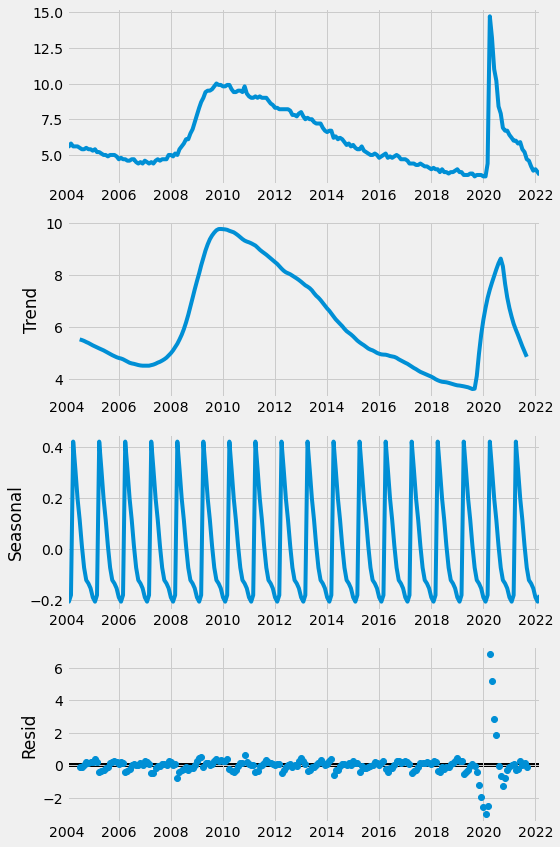

In [7]:
plt.rcParams["figure.figsize"] = (8,12)

fig = result.plot()
plt.show()

In [8]:
unemp_rate

Value
Time             
2004-01-01    5.7
2004-02-01    5.6
2004-03-01    5.8
2004-04-01    5.6
2004-05-01    5.6
...           ...
2021-11-01    4.2
2021-12-01    3.9
2022-01-01    4.0
2022-02-01    3.8
2022-03-01    3.6

[219 rows x 1 columns]

In [14]:
#set figure size
sns.set(rc={'figure.figsize':(15,5)})

In [9]:
gt_jobs_data_top50 = pd.read_csv('gt_jobs_data_top10.csv')
# gt_jobs_data_top50.head()

Text(0, 0.5, 'unemployment rate')

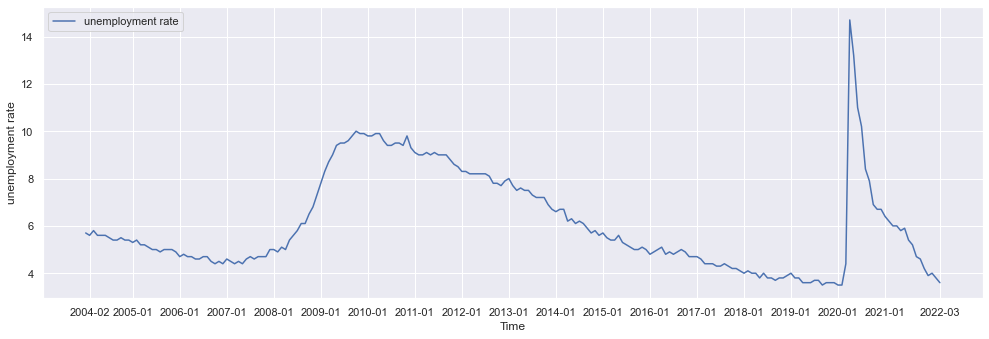

In [33]:
#jobs graph

g4 = sns.lineplot(x=gt_jobs_data_top50['Month'], y=gt_jobs_data_top50['Unemployment_rate'], label = 'unemployment rate')

time_in_year = ['2004-02','2005-01','2006-01','2007-01','2008-01','2009-01','2010-01','2011-01',\
                         '2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01','2021-01','2022-03']

plt.xticks(time_in_year)
plt.xlabel('Time')
plt.ylabel('unemployment rate')

Text(0, 0.5, 'unemployment rate change in percentage')

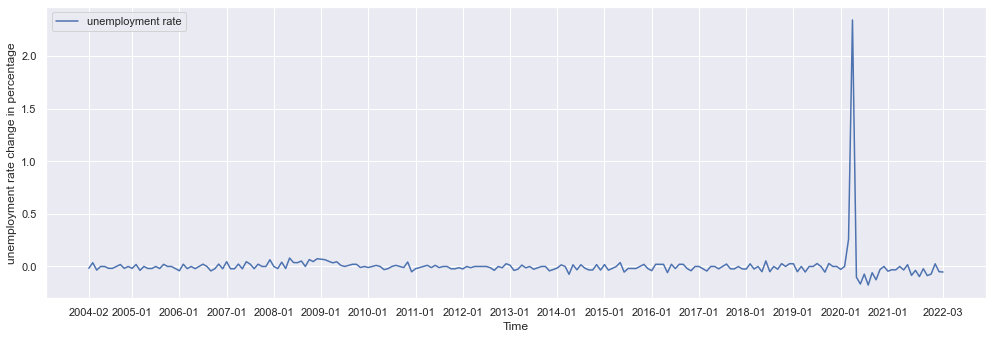

In [34]:
#jobs growth data import and graph
gt_jobs_data_top50_growth = pd.read_csv('gt_jobs_data_top50_growth.csv')
gt_jobs_data_top50_growth.head()
len(gt_jobs_data_top50_growth)

time_in_year = ['2004-02','2005-01','2006-01','2007-01','2008-01','2009-01','2010-01','2011-01',\
                         '2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01','2021-01','2022-03']

g4 = sns.lineplot(x=gt_jobs_data_top50_growth['Month'], y=gt_jobs_data_top50_growth['Unemployment_rate'], label = 'unemployment rate')

plt.xticks(time_in_year)
plt.xlabel('Time')
plt.ylabel('unemployment rate change in percentage')

Text(0, 0.5, 'unemployment rate change in percentage')

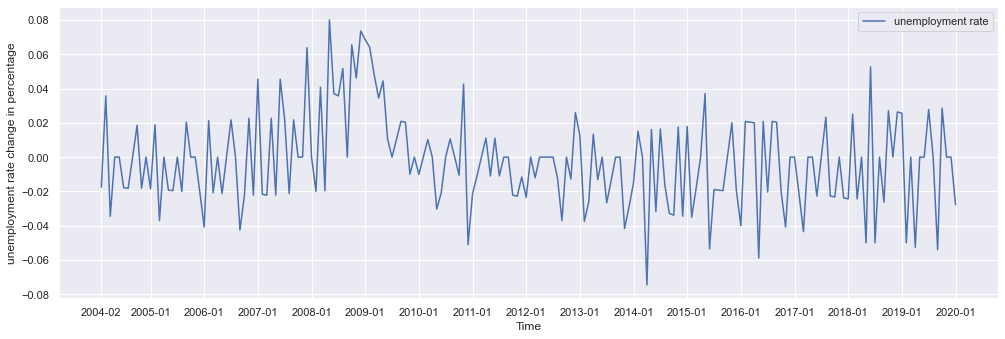

In [29]:
#pre-covid jobs growth data import and graph
gt_jobs_data_top50_growth_precovid = pd.read_csv('gt_jobs_data_top50_growth_pre-covid.csv')
gt_jobs_data_top50_growth_precovid.head()
len(gt_jobs_data_top50_growth_precovid)

g4 = sns.lineplot(x=gt_jobs_data_top50_growth_precovid['Month'], \
                  y=gt_jobs_data_top50_growth_precovid['Unemployment_rate'], label = 'unemployment rate')

time_in_year_precovid = ['2004-02','2005-01','2006-01','2007-01','2008-01','2009-01','2010-01','2011-01',\
                         '2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01']

plt.xticks(time_in_year_precovid)   
plt.xlabel('Time')
plt.ylabel('unemployment rate change in percentage')

In [128]:
#jobs diff data 
gt_unemp_data_top50 = pd.read_csv('gt_unemp_data_top50.csv')
gt_unemp_data_top50_diff = gt_unemp_data_top50
gt_unemp_data_top50_diff['Unemployment_rate'] = gt_unemp_data_top50_diff['Unemployment_rate'].diff()
gt_unemp_data_top50_diff = gt_unemp_data_top50_diff.iloc[1:, :]
gt_unemp_data_top50_diff
gt_unemp_data_top50 = pd.read_csv('gt_unemp_data_top50.csv')

gt_unemp_data_top50_diff.to_csv(r'C:\Users\Dehon\OneDrive\Desktop\Thesis\gt_unemp_data_top50_diff.csv', index=False)

# #jobs diff data import and graph
# gt_unemp_data_top50_diff = pd.read_csv('gt_jobs_data_top50_diff.csv')
# gt_jobs_data_top50_diff.head()
# len(gt_jobs_data_top50_growth)

# time_in_year = ['2004-02','2005-01','2006-01','2007-01','2008-01','2009-01','2010-01','2011-01',\
#                          '2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01','2021-01','2022-03']

# g4 = sns.lineplot(x=gt_jobs_data_top50_diff['Month'], y=gt_jobs_data_top50_diff['Unemployment_rate'], label = 'unemployment rate')

# plt.xticks(time_in_year)
# plt.xlabel('Time')
# plt.ylabel('unemployment rate change in percentage')

In [20]:
pd.date_range(start = "2004-02", end = "2020-01", freq = "M")

DatetimeIndex(['2004-02-29', '2004-03-31', '2004-04-30', '2004-05-31',
               '2004-06-30', '2004-07-31', '2004-08-31', '2004-09-30',
               '2004-10-31', '2004-11-30',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', length=191, freq='M')

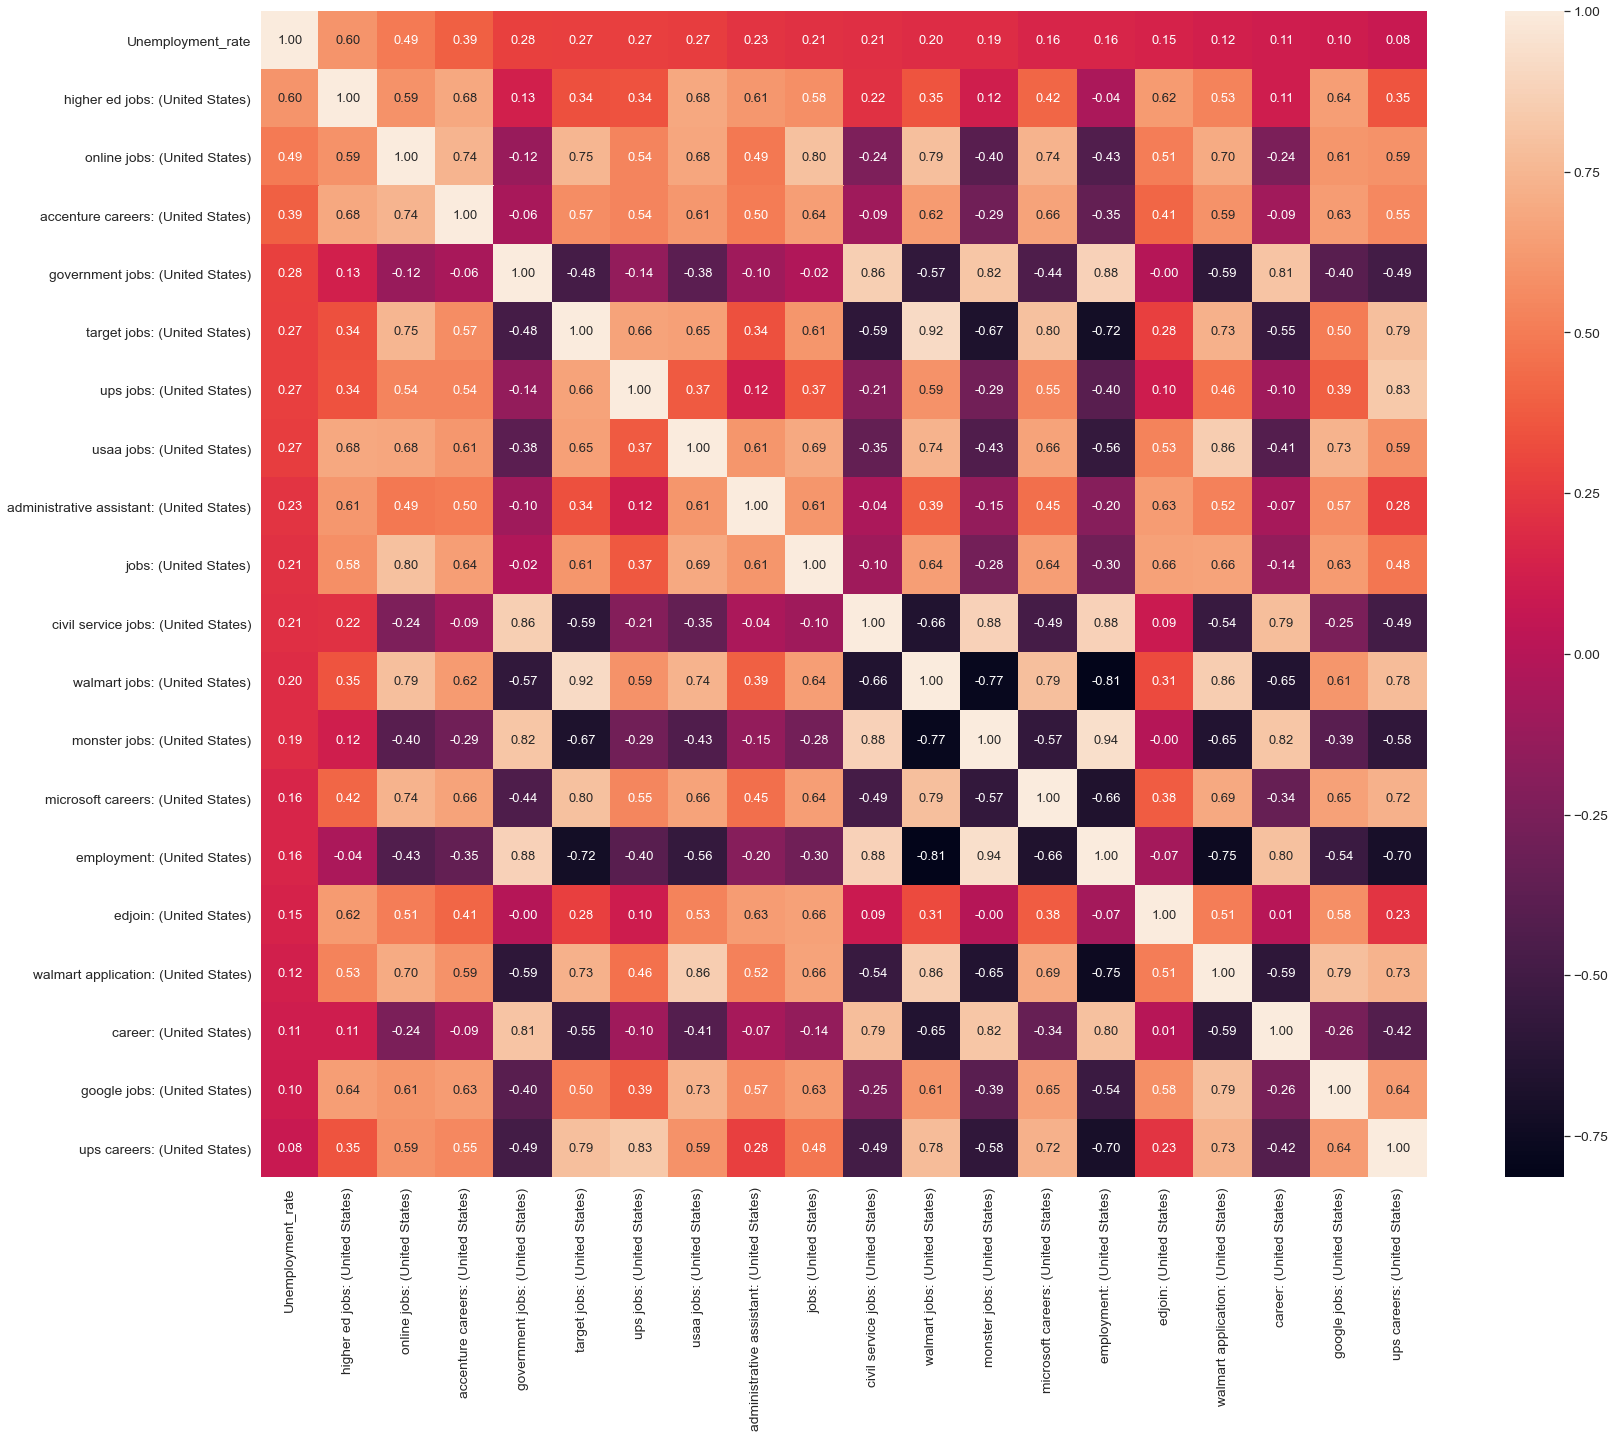

In [10]:
#jobs heatmap
corrmat1 = gt_jobs_data_top10.corr()
k=50
cols = corrmat1.nlargest(k, 'Unemployment_rate')['Unemployment_rate'].index
cm = np.corrcoef(gt_jobs_data_top10[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

In [11]:
X1 = gt_jobs_data_top10.drop(['Month', 'Unemployment_rate'], axis=1)
y1 = gt_jobs_data_top10['Unemployment_rate']

In [12]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 1)

In [13]:
X1_train

indeed jobs: (United States)  jobs near me: (United States)  \
208                          76.0                           86.0   
14                            0.0                            0.0   
217                          93.0                           93.0   
151                          41.0                           19.0   
56                            3.0                            0.5   
..                            ...                            ...   
203                          55.0                           83.0   
137                          42.0                            7.0   
72                            7.0                            0.5   
140                          37.0                            8.0   
37                            1.0                            0.5   

     amazon jobs: (United States)  jobs hiring near me: (United States)  \
208                          54.0                                  77.0   
14                            1.0                                   0.0   
217                          72.0                                  78.0   
151                          16.0                                  15.0   
56                            2.0                                   0.5   
..                            ...                                   ...   
203                          67.0                                  83.0   
137                          13.0                                   8.0   
72                            3.0                                   0.0   
140                          14.0                                   7.0   
37                            1.0                                   0.0   

     usaa jobs: (United States)  work from home jobs: (United States)  \
208                          37                                    49   
14                            9                                     7   
217                          41                                    82   
151                          52                                    28   
56                           29                                    18   
..                          ...                                   ...   
203                          32                                    55   
137                          61                                    25   
72                           40                                    18   
140                          59                                    26   
37                           13                                    11   

     part time jobs near me: (United States)  \
208                                     59.0   
14                                       0.0   
217                                     67.0   
151                                     14.0   
56                                       0.0   
..                                       ...   
203                                     53.0   
137                                      6.0   
72                                       0.5   
140                                      8.0   
37                                       0.0   

     walmart careers: (United States)  handshake: (United States)  \
208                                67                          29   
14                                  3                           9   
217                                78                          52   
151                                70                          24   
56                                 23                          15   
..                                ...                         ...   
203                                72                          25   
137                                65                          17   
72                                 19                          16   
140                                62                          27   
37                                  5                           9   

    

In [14]:
clf_rf1 = RandomForestRegressor()
clf_rf1.fit(X1_train, y1_train)
clf_rf1.score(X1_test, y1_test)

0.7944360634735115

In [15]:
y1_test_yhat = clf_rf1.predict(X1_test)
y1_test_yhat

array([4.402, 4.781, 5.068, 6.691, 4.521, 8.128, 8.391, 4.816, 7.607,
       5.439, 9.108, 3.827, 6.901, 5.148, 8.402, 4.771, 5.83 , 8.609,
       5.716, 7.18 , 6.38 , 8.624, 5.094, 3.958, 9.731, 5.337, 8.552,
       5.842, 6.893, 4.732, 5.232, 9.535, 4.781, 4.701, 6.482, 5.151,
       4.822, 5.397, 4.807, 4.676, 4.387, 4.86 , 5.14 , 7.913, 9.323,
       6.937, 3.834, 4.883, 4.913, 5.231, 5.004, 9.594, 5.503, 6.979,
       7.961, 8.071, 4.864, 7.05 , 4.822, 4.27 , 8.895, 5.747, 3.783,
       8.952, 4.262, 7.385])

In [16]:
# y1_test_array = y1_test['Unemployment_rate'].tolist()
metrics.r2_score(y1_test, y1_test_yhat)

0.7944360634735115

In [17]:
y1_test = y1_test.reset_index()
y1_test

index  Unemployment_rate
0     165                4.2
1      34                4.5
2      35                4.4
3     201                6.9
4     160                4.4
..    ...                ...
61     59                7.3
62    181                3.8
63     88                9.0
64    179                3.9
65    119                6.7

[66 rows x 2 columns]

In [18]:
y1_test = y1_test.drop('index', 1)

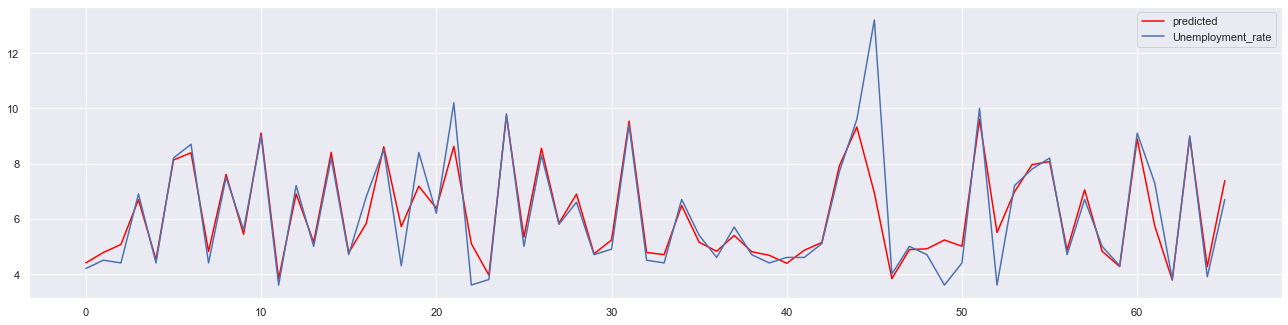

In [44]:
g1 = sns.lineplot(data=y1_test_yhat, color = 'red', label = 'predicted')
g2 = sns.lineplot(data=y1_test)
sns.set(rc = {'figure.figsize':(20,15)})

In [20]:
clf_rf1.feature_importances_

array([0.00632407, 0.00742692, 0.00263519, 0.01053602, 0.01181581,
       0.00538726, 0.00415027, 0.00378019, 0.00567143, 0.00191605,
       0.01539383, 0.03120209, 0.08992223, 0.00135118, 0.00561038,
       0.01622958, 0.00133371, 0.00822123, 0.02034984, 0.00447282,
       0.05688456, 0.00107976, 0.05800606, 0.00845088, 0.00151277,
       0.01469922, 0.00327465, 0.00559034, 0.00214638, 0.00508435,
       0.02519847, 0.00263633, 0.00364408, 0.01125887, 0.0055707 ,
       0.01266499, 0.01822647, 0.00295152, 0.00168265, 0.00518133,
       0.03098982, 0.00850711, 0.00167931, 0.00106529, 0.00257118,
       0.00542436, 0.44466688, 0.00235339, 0.00083949, 0.00242868])

In [21]:
indices = np.argsort(abs(clf_rf1.feature_importances_))[::-1]
for ind in range(X1_train.shape[1]):
    print ("{0} : {1}".format(X1_train.columns[indices[ind]],
                            clf_rf1.feature_importances_[indices[ind]]))

higher ed jobs: (United States) : 0.4446668756627011
online jobs: (United States) : 0.08992223488202902
amazon force: (United States) : 0.058006062181695454
google careers: (United States) : 0.05688456339412918
amazon careers: (United States) : 0.031202089029061984
target jobs: (United States) : 0.03098981781196404
civil service jobs: (United States) : 0.02519846763598762
part time jobs: (United States) : 0.020349839315278288
software engineer: (United States) : 0.018226469903770606
linkedin jobs: (United States) : 0.016229575841243796
government jobs: (United States) : 0.015393832331688957
walmart jobs: (United States) : 0.014699218419077318
part time: (United States) : 0.012664992663927385
usaa jobs: (United States) : 0.011815807344836126
job search: (United States) : 0.011258873604317859
jobs hiring near me: (United States) : 0.010536024433307416
places hiring near me: (United States) : 0.008507113501810118
hiring near me: (United States) : 0.008450880488072644
google jobs: (United 

In [296]:
gt_jobs_data_top50 = pd.read_csv('gt_jobs_data_top10.csv')
gt_jobs_data_top50.head()
len(gt_jobs_data_top50)

219

In [295]:
gt_jobs_data_top50

Month  Unemployment_rate  indeed jobs: (United States)  \
0    2004-01                NaN                           0.0   
1    2004-02               -0.1                           0.0   
2    2004-03                0.2                           0.0   
3    2004-04               -0.2                           0.0   
4    2004-05                0.0                           0.0   
..       ...                ...                           ...   
214  2021-11               -0.4                          83.0   
215  2021-12               -0.3                          78.0   
216  2022-01                0.1                         100.0   
217  2022-02               -0.2                          93.0   
218  2022-03               -0.2                          96.0   

     jobs near me: (United States)  amazon jobs: (United States)  \
0                              0.0                           1.0   
1                              0.0                           0.5   
2                              0.0                           1.0   
3                              0.0                           1.0   
4                              0.0                           1.0   
..                             ...                           ...   
214                           85.0                          78.0   
215                           81.0                          69.0   
216                           97.0                          79.0   
217                           93.0                          72.0   
218                           92.0                          62.0   

     jobs hiring near me: (United States)  usaa jobs: (United States)  \
0                                     0.0                          11   
1                                     0.0                          18   
2                                     0.0                           9   
3                                     0.0                          14   
4                                     0.0                          23   
..                                    ...                         ...   
214                                  75.0                          43   
215                                  71.0                          39   
216                                  84.0                          49   
217                                  78.0                          41   
218                                  77.0                          42   

     work from home jobs: (United States)  \
0                                      10   
1                                       9   
2                                       6   
3                                       6   
4                                       6   
..                                    ...   
214                                    73   
215                                    68   
216                                   100   
217                                    82   
218                                    77   

     part time jobs near me: (United States)  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
..                                       ...   
214                                     58.0   
215                                     52.0   
216                                     73.0   
217                                     67.0   
218                                     65.0   

     walmart careers: (United States)  ...  target jobs: (United States)  \
0                                   4  ...                            14   
1                                   2  ...                            13   
2                                   2  ...                            11   
3                                   1  ...                            14   
4                                 

In [480]:
#jobs data
#Get the unemployment rate growth rate
gt_jobs_data_top50 = pd.read_csv('gt_jobs_data_top10.csv')

gt_jobs_data_top50_growth = gt_jobs_data_top50
gt_jobs_data_top50_growth['Unemployment_rate'] = gt_jobs_data_top50_growth['Unemployment_rate'].pct_change()
gt_jobs_data_top50_growth = gt_jobs_data_top50_growth.iloc[1:, :]
gt_jobs_data_top50_growth
gt_jobs_data_top50 = pd.read_csv('gt_jobs_data_top10.csv')

# gt_jobs_data_top50_growth.to_csv(r'C:\Users\Dehon\OneDrive\Desktop\Thesis\gt_jobs_data_top50_growth.csv', index=False)

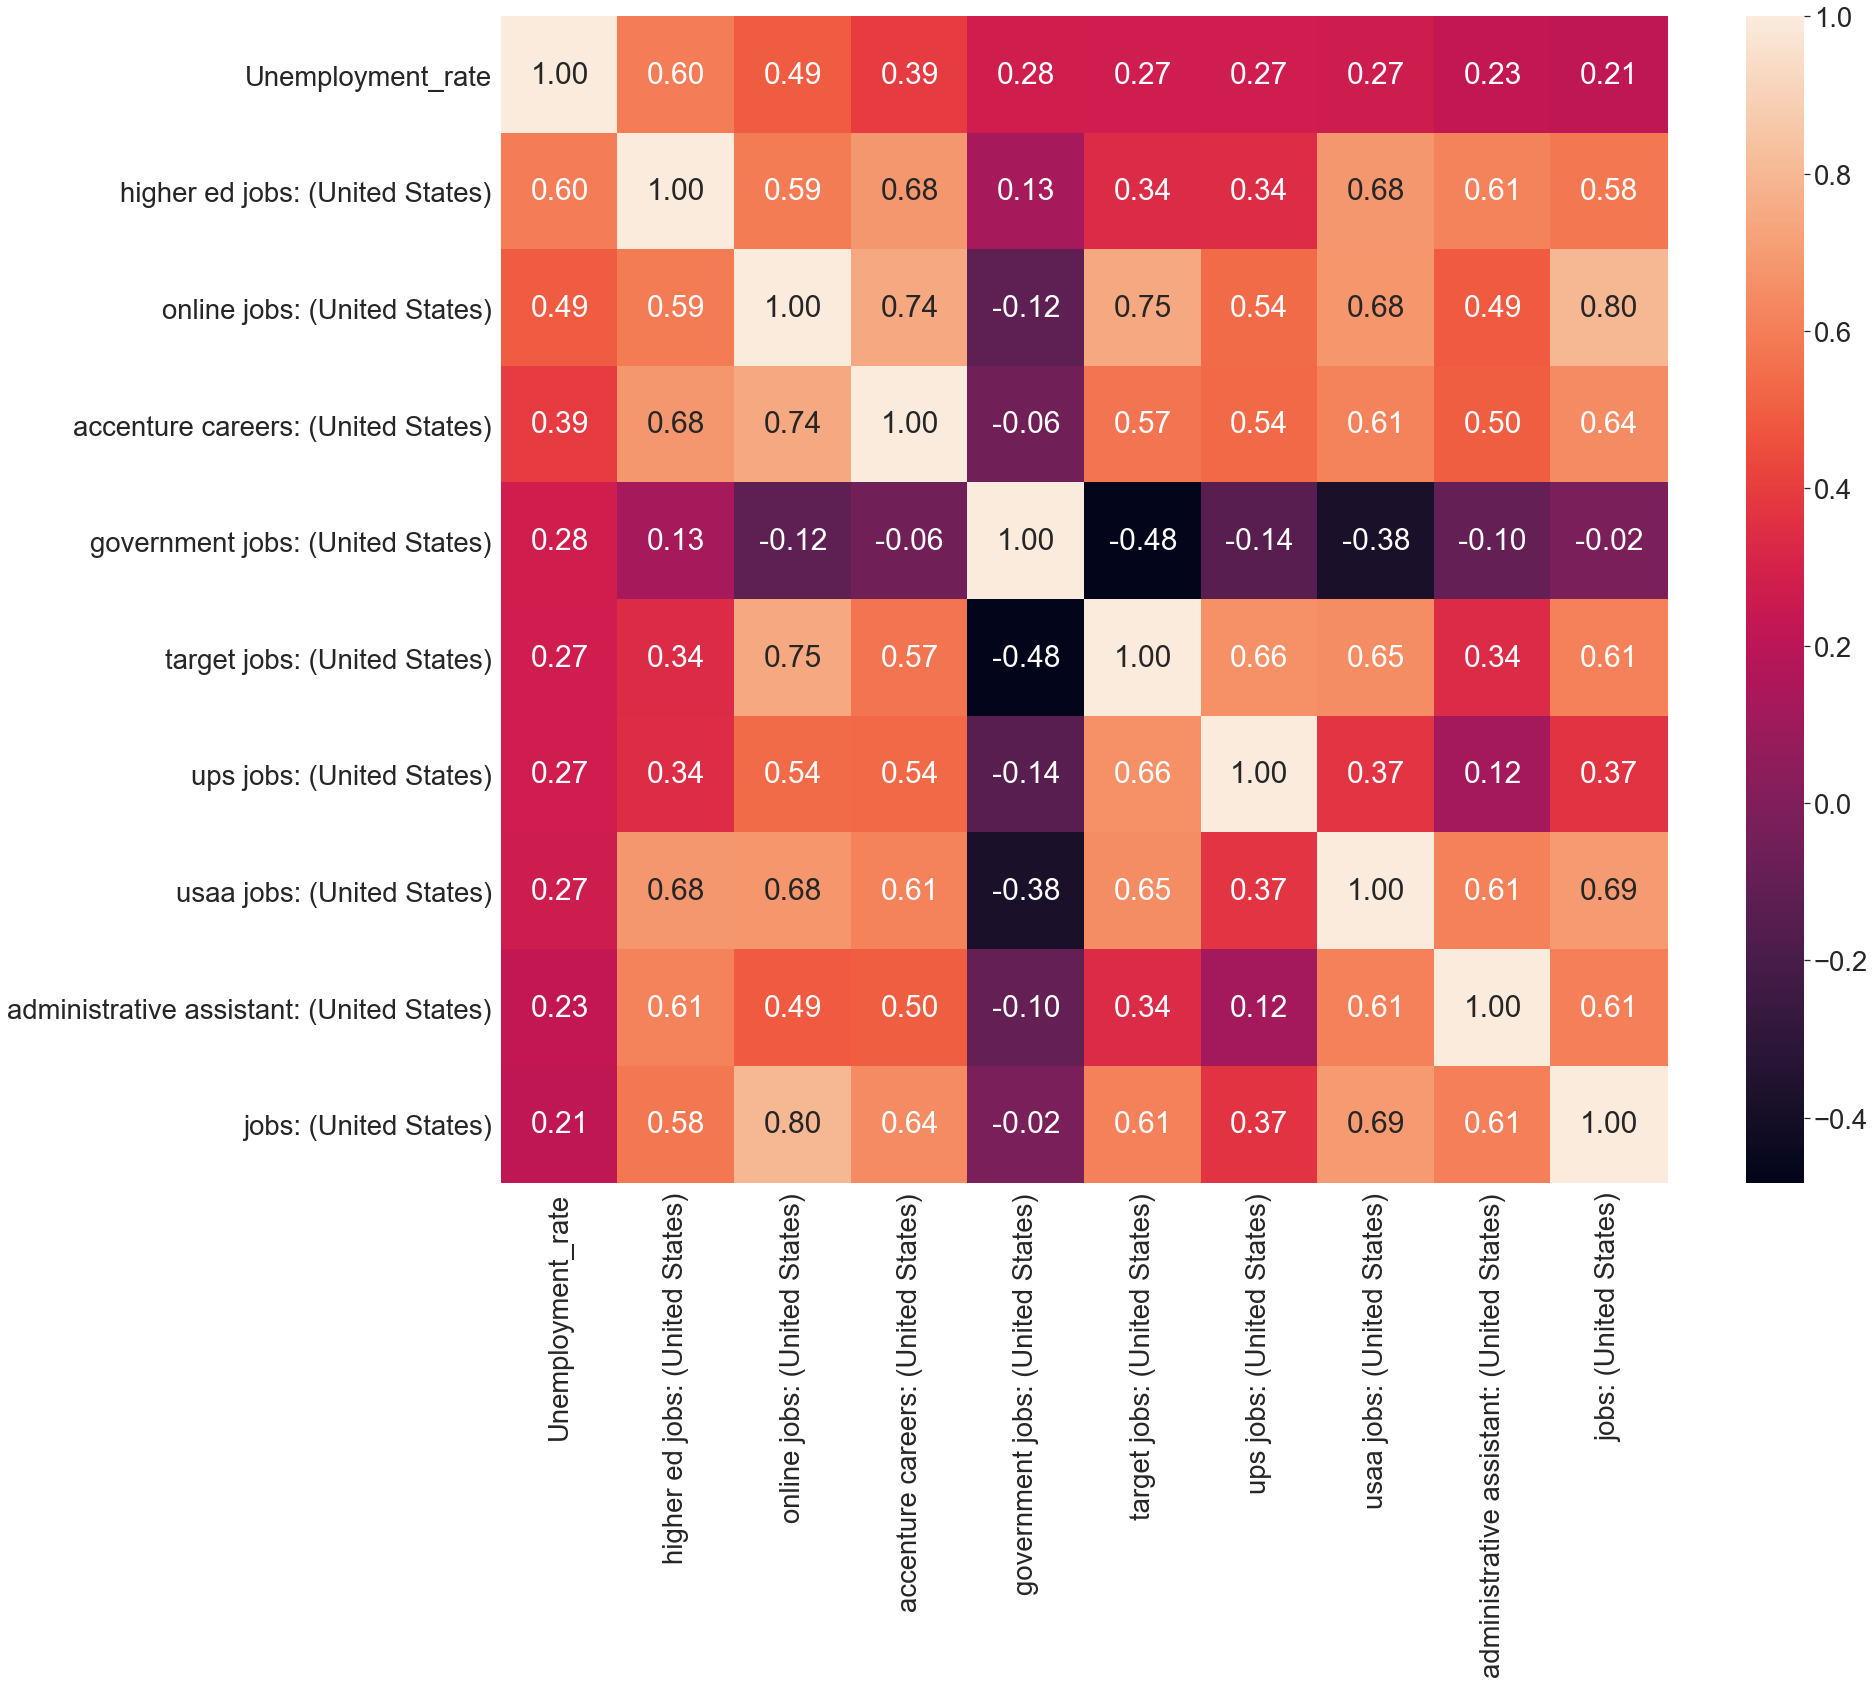

In [691]:
#jobs heatmap
corrmat1 = gt_jobs_data_top50.corr()
k=10
cols = corrmat1.nlargest(k, 'Unemployment_rate')['Unemployment_rate'].index
cm = np.corrcoef(gt_jobs_data_top50[cols].values.T)
sns.set(font_scale=2.5)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 30}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

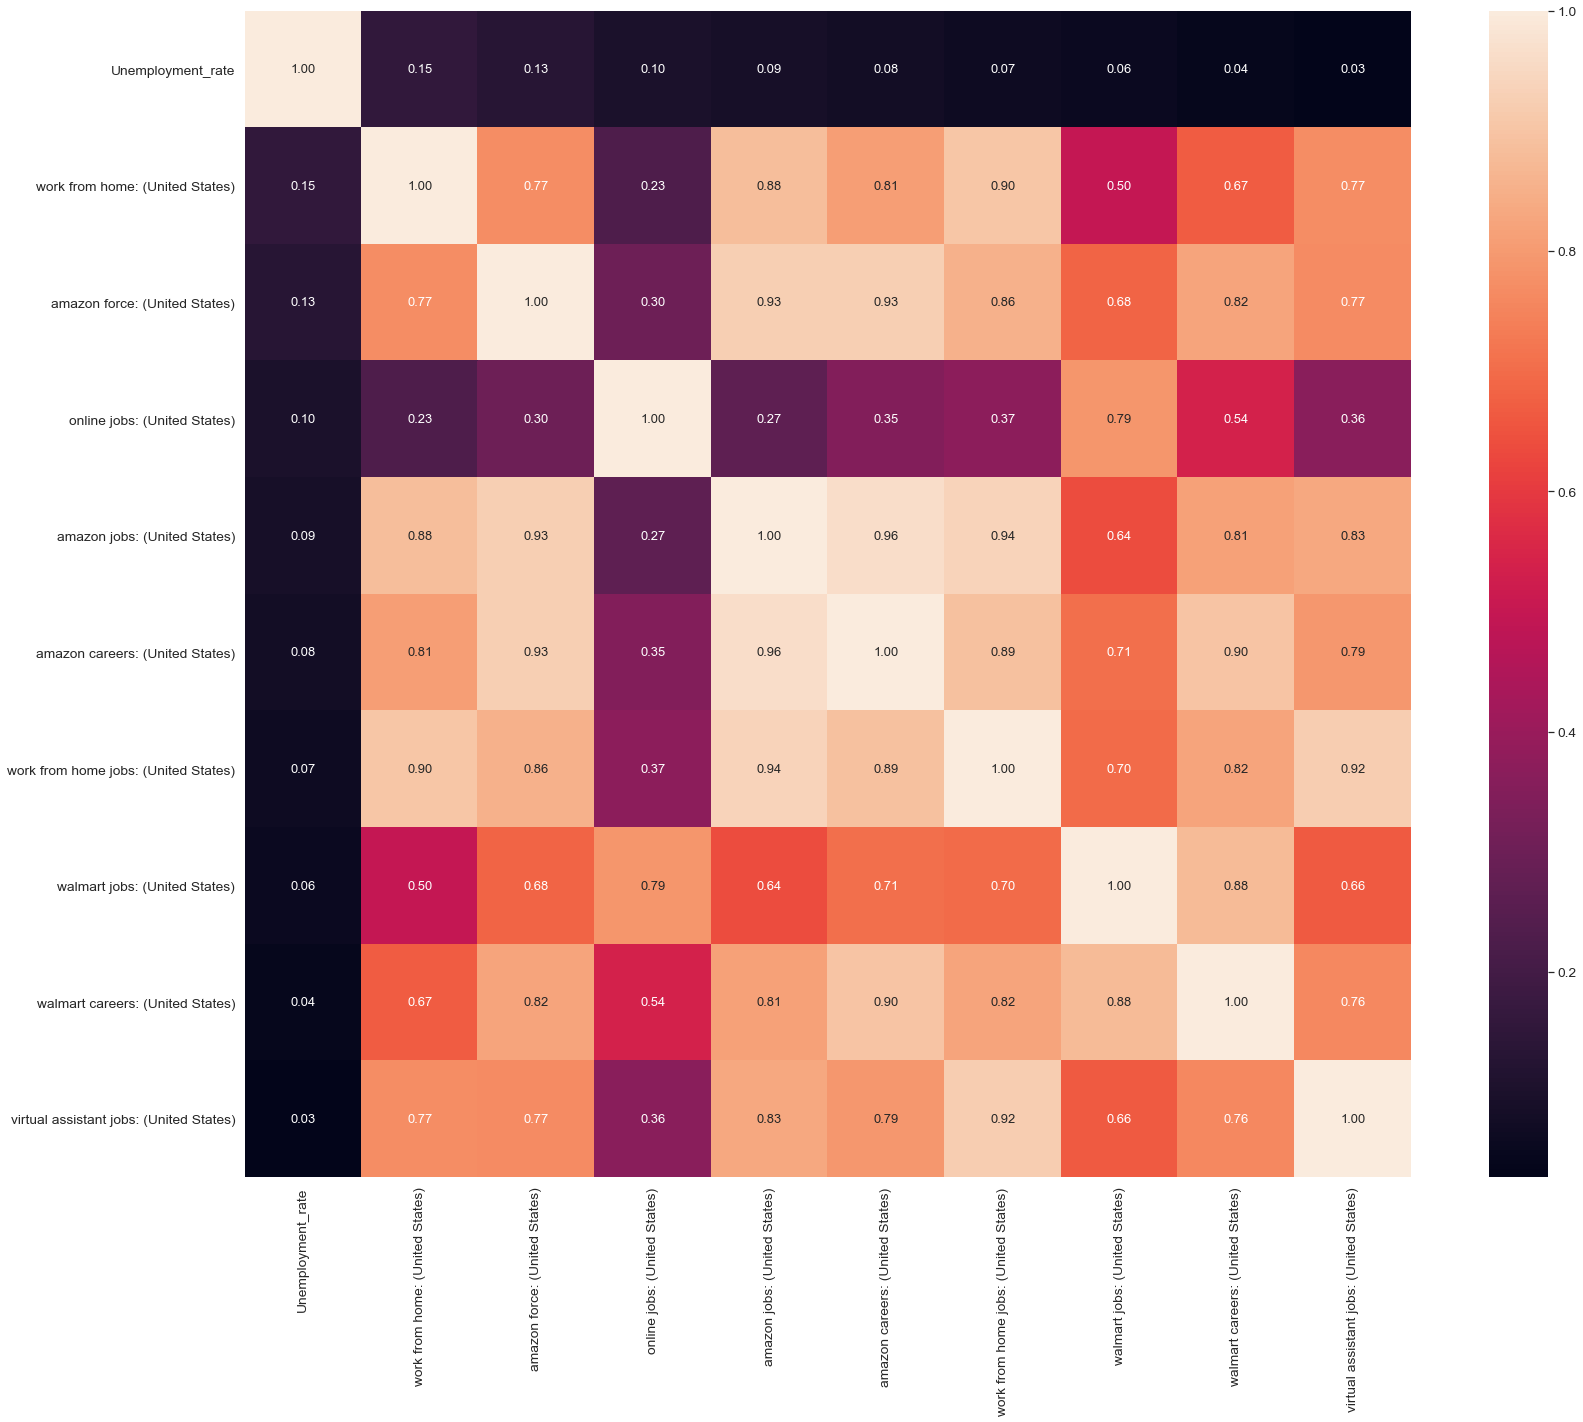

In [653]:
#jobs growth heatmap
corrmat1 = gt_jobs_data_top50_growth.corr()
k=10
cols = corrmat1.nlargest(k, 'Unemployment_rate')['Unemployment_rate'].index
cm = np.corrcoef(gt_jobs_data_top50_growth[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

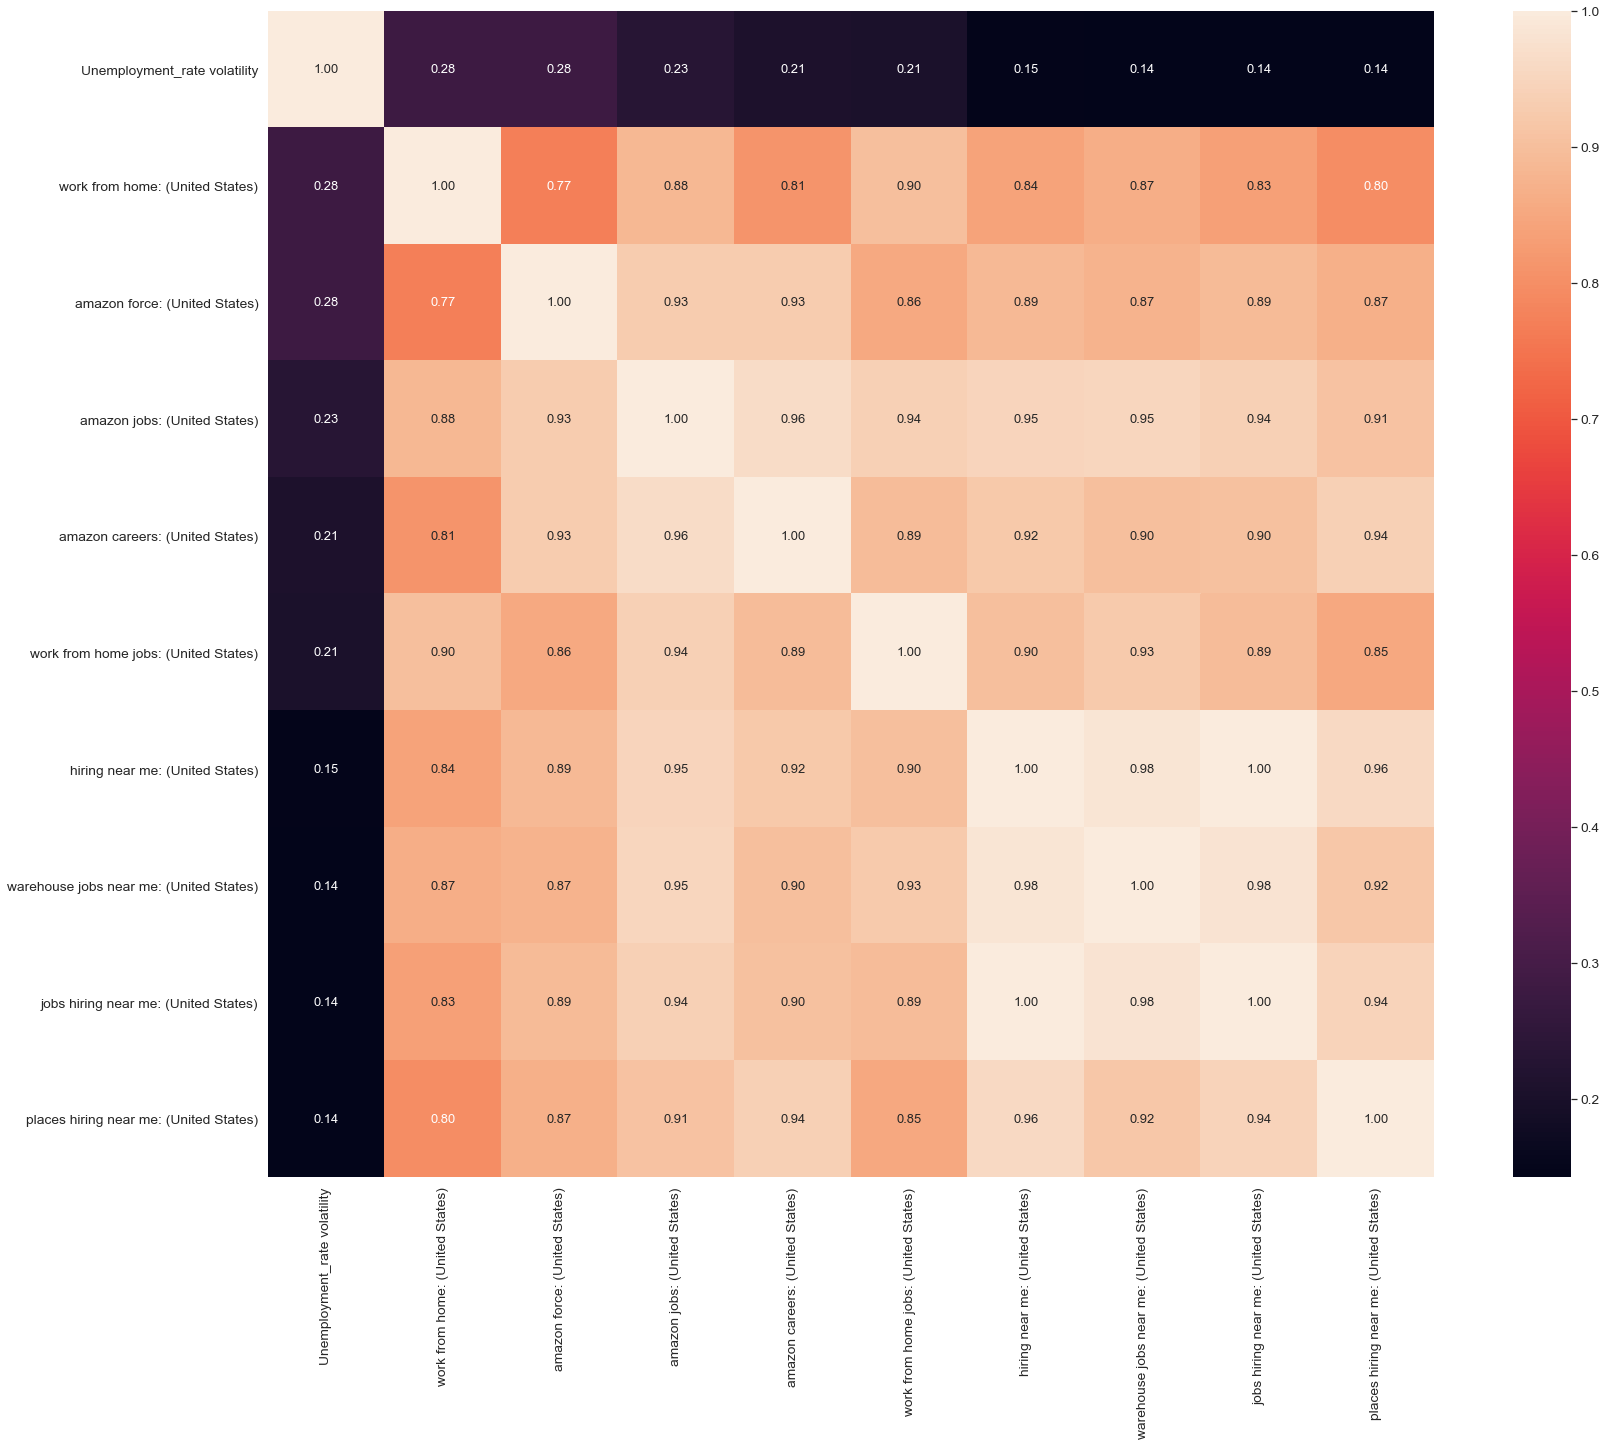

In [665]:
#jobs growth volatility heatmap
corrmat1 = gt_jobs_data_top50_volatility.corr()
k=10
cols = corrmat1.nlargest(k, 'Unemployment_rate volatility')['Unemployment_rate volatility'].index
cm = np.corrcoef(gt_jobs_data_top50_volatility[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

In [657]:
#jobs single feature prediction
gt_jobs_highered = pd.read_csv('gt_jobs_higher ed.csv') 

rolling_win_lst = [1,24,120,180]
month_ahead_lst = [1]
gt_inflation_top50_results = {}
for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_jobs_highered, 'Unemployment_rate', i, j, RandomForestRegressor(),1)
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv
        
gt_inflation_top50_results

(1, 1) 0.8655891402281031
(24, 1) 0.5363226564511494
(120, 1) -0.513366747300118
(180, 1) -0.22804114532182362


{(1, 1): 0.8655891402281031,
 (24, 1): 0.5363226564511494,
 (120, 1): -0.513366747300118,
 (180, 1): -0.22804114532182362}

In [667]:
#jobs volatility single feature prediction
gt_jobs_workfromhome = pd.read_csv('gt_jobs_work from home.csv') 

rolling_win_lst = [1,24,120,180]
month_ahead_lst = [1]
gt_inflation_top50_results = {}
for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_jobs_workfromhome, 'Unemployment_rate volatility', i, j, RandomForestRegressor(),1)
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv
        
gt_inflation_top50_results

(1, 1) -0.7354751518339604
(24, 1) -0.011046878364461943
(120, 1) -0.019967588629690614
(180, 1) -0.05514994055380784


{(1, 1): -0.7354751518339604,
 (24, 1): -0.011046878364461943,
 (120, 1): -0.019967588629690614,
 (180, 1): -0.05514994055380784}

In [616]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
grangercausalitytests(gt_jobs_highered[['Unemployment_rate', 'higher ed jobs: (United States)']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4577  , p=0.0640  , df_denom=209, df_num=3
ssr based chi2 test:   chi2=7.6200  , p=0.0546  , df=3
likelihood ratio test: chi2=7.4886  , p=0.0579  , df=3
parameter F test:         F=2.4577  , p=0.0640  , df_denom=209, df_num=3


{3: ({'ssr_ftest': (2.4576710676687163, 0.06396564862269676, 209.0, 3),
   'ssr_chi2test': (7.619956228944154, 0.054555063670532034, 3),
   'lrtest': (7.488629128040145, 0.05785133923327987, 3),
   'params_ftest': (2.457671067668619, 0.06396564862270512, 209.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

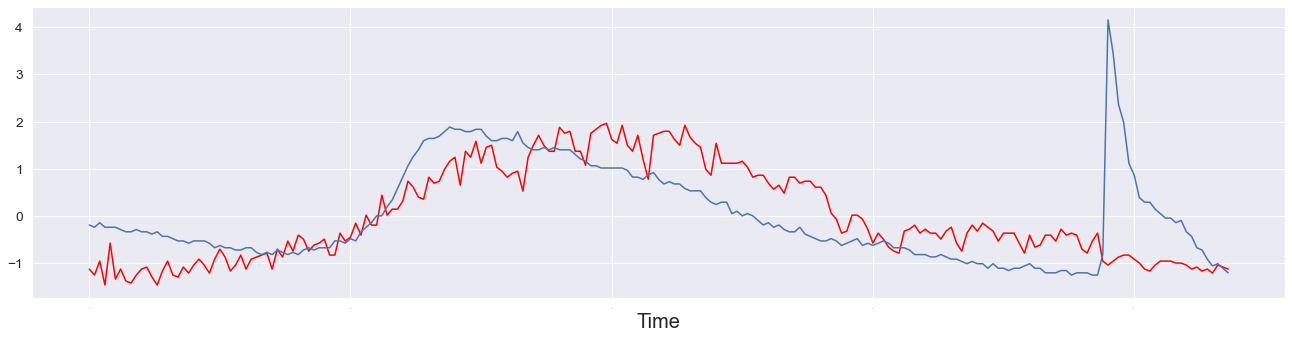

In [696]:
g = sns.lineplot(data=preprocessing.scale(gt_jobs_highered['higher ed jobs: (United States)']), color='red')
g2 = sns.lineplot(data=preprocessing.scale(gt_jobs_highered['Unemployment_rate']) )

plt.xticks(fontsize = 0)
plt.xlabel('Time', fontsize = 20)

In [36]:
#Sliding window prediction function with r2 score as output

def sliding_window_pred(doc_name, target_variable, rolling_window, num_months_ahead, regressor, num_features):
    test_index = num_months_ahead - 1
    pred_lst1 = []
    test_lst1 = []

    for i in doc_name.rolling(rolling_window):
        test_index += 1
        if len(i) == rolling_window and test_index < len(doc_name):
            X = i.loc[:, ~doc_name.columns.isin([target_variable, 'Month'])]
            y = i[target_variable]

            test_X = doc_name.iloc[test_index][~doc_name.columns.isin([target_variable, 'Month'])]
            test_y = doc_name.iloc[test_index][target_variable]

            test_X = np.reshape(test_X.values, (1,num_features))
            test_y = np.reshape(test_y, (1,))
            
            rf = regressor
            rf.fit(X, y)
            
            pred_y = rf.predict(test_X)
#             print(test_y, pred_y)
            pred_lst1.append(pred_y)
            test_lst1.append(test_y)

    score = r2_score(test_lst1,pred_lst1)
    
    return score




In [37]:
#Sliding window prediction function with actual vs prediction list as output

def sliding_window_pred_list(doc_name, target_variable, rolling_window, num_months_ahead):
    test_index = num_months_ahead - 1
    pred_lst1 = []
    test_lst1 = []

    for i in doc_name.rolling(rolling_window):
        test_index += 1
        if len(i) == rolling_window and test_index < len(doc_name):
            X = i.loc[:, ~doc_name.columns.isin([target_variable, 'Month'])]
            y = i[target_variable]

            test_X = doc_name.iloc[test_index][~doc_name.columns.isin([target_variable, 'Month'])]
            test_y = doc_name.iloc[test_index][target_variable]

            test_X = np.reshape(test_X.values, (1,50))
            test_y = np.reshape(test_y, (1,))
            
            rf = RandomForestRegressor()
            rf.fit(X, y)
            
            pred_y = rf.predict(test_X)
#             print(test_y, pred_y)
            pred_lst1.append(pred_y)
            test_lst1.append(test_y)

    return test_lst1, pred_lst1

In [418]:
gt_jobs_data_top50_growth

Month  Unemployment_rate  indeed jobs: (United States)  \
1    2004-02          -0.017544                           0.0   
2    2004-03           0.035714                           0.0   
3    2004-04          -0.034483                           0.0   
4    2004-05           0.000000                           0.0   
5    2004-06           0.000000                           0.0   
..       ...                ...                           ...   
214  2021-11          -0.086957                          83.0   
215  2021-12          -0.071429                          78.0   
216  2022-01           0.025641                         100.0   
217  2022-02          -0.050000                          93.0   
218  2022-03          -0.052632                          96.0   

     jobs near me: (United States)  amazon jobs: (United States)  \
1                              0.0                           0.5   
2                              0.0                           1.0   
3                              0.0                           1.0   
4                              0.0                           1.0   
5                              0.5                           1.0   
..                             ...                           ...   
214                           85.0                          78.0   
215                           81.0                          69.0   
216                           97.0                          79.0   
217                           93.0                          72.0   
218                           92.0                          62.0   

     jobs hiring near me: (United States)  usaa jobs: (United States)  \
1                                     0.0                          18   
2                                     0.0                           9   
3                                     0.0                          14   
4                                     0.0                          23   
5                                     0.0                          20   
..                                    ...                         ...   
214                                  75.0                          43   
215                                  71.0                          39   
216                                  84.0                          49   
217                                  78.0                          41   
218                                  77.0                          42   

     work from home jobs: (United States)  \
1                                       9   
2                                       6   
3                                       6   
4                                       6   
5                                       6   
..                                    ...   
214                                    73   
215                                    68   
216                                   100   
217                                    82   
218                                    77   

     part time jobs near me: (United States)  \
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
5                                        0.0   
..                                       ...   
214                                     58.0   
215                                     52.0   
216                                     73.0   
217                                     67.0   
218                                     65.0   

     walmart careers: (United States)  ...  target jobs: (United States)  \
1                                   2  ...                            13   
2                                   2  ...                            11   
3                                   1  ...                            14   
4                                   1  ...                            12   
5                                 

In [373]:
sliding_window_pred(gt_jobs_data_top50_growth, 'Unemployment_rate', 1, 1)

0.8655891402281031

In [365]:
sliding_window_pred(gt_jobs_data_top50_growth, 12, 1)

-0.0051752673037375185

In [374]:
sliding_window_pred(gt_jobs_data_top50_growth, 'Unemployment_rate' ,12, 1)

0.6993151088742906

In [481]:
#jobs growth models
rolling_win_lst = [1,3,12,24,48,72,120]
month_ahead_lst = [1,3,12]
gt_jobs_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_jobs_data_top50_growth, 'Unemployment_rate', i, j)
        print((i,j), rv)
        gt_jobs_top50_results[(i,j)] = rv


gt_jobs_top50_results

(1, 1) -0.8455383956256435
(1, 3) -1.0644825586687343
(1, 12) -1.0339185596358185
(3, 1) -0.03918803475405541
(3, 3) -0.2745177682614617
(3, 12) -0.28869220488164604
(12, 1) -0.0891354940017528
(12, 3) -0.11578472502147807
(12, 12) -0.17285933985659296
(24, 1) -0.009823853008949168
(24, 3) -0.10505607434404407
(24, 12) -0.1590322209981585
(48, 1) -0.052913605875863245
(48, 3) -0.20125274797802062
(48, 12) -0.31145111603372677
(72, 1) -0.09872229274480593
(72, 3) -0.21218944954036467
(72, 12) -0.31668045512296983
(120, 1) -0.08997420029221126
(120, 3) -0.3208386971029429
(120, 12) -0.3497796760634808


{(1, 1): -0.8455383956256435,
 (1, 3): -1.0644825586687343,
 (1, 12): -1.0339185596358185,
 (3, 1): -0.03918803475405541,
 (3, 3): -0.2745177682614617,
 (3, 12): -0.28869220488164604,
 (12, 1): -0.0891354940017528,
 (12, 3): -0.11578472502147807,
 (12, 12): -0.17285933985659296,
 (24, 1): -0.009823853008949168,
 (24, 3): -0.10505607434404407,
 (24, 12): -0.1590322209981585,
 (48, 1): -0.052913605875863245,
 (48, 3): -0.20125274797802062,
 (48, 12): -0.31145111603372677,
 (72, 1): -0.09872229274480593,
 (72, 3): -0.21218944954036467,
 (72, 12): -0.31668045512296983,
 (120, 1): -0.08997420029221126,
 (120, 3): -0.3208386971029429,
 (120, 12): -0.3497796760634808}

In [46]:
#jobs growth models precovid
rolling_win_lst = [1,12,48,96,120,144,168]
month_ahead_lst = [1,3,12]
gt_jobs_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_jobs_data_top50_growth_precovid, 'Unemployment_rate', i, j, RandomForestRegressor(),50)
        print((i,j), rv)
        gt_jobs_top50_results[(i,j)] = rv


gt_jobs_top50_results

(1, 1) -0.8890846537553845
(1, 3) -0.6815229608560747
(1, 12) -1.0386763319239365
(12, 1) -0.05310465209546855
(12, 3) 0.018168426956420514
(12, 12) -0.23235037806191228
(48, 1) -0.0012404759646715835
(48, 3) 0.027523762002288565
(48, 12) -0.39962323939073596
(96, 1) -0.38085560983704414
(96, 3) -0.17997790602456054
(96, 12) -0.23820938748596543
(120, 1) -0.40636191452509784
(120, 3) -0.14266677121364602
(120, 12) -0.2688069767462371
(144, 1) -0.46297347491333474
(144, 3) -0.15305232477772646
(144, 12) -0.1588042030956609
(168, 1) -0.4417234111948436
(168, 3) -0.18746772483597707
(168, 12) -0.026988829873593634


{(1, 1): -0.8890846537553845,
 (1, 3): -0.6815229608560747,
 (1, 12): -1.0386763319239365,
 (12, 1): -0.05310465209546855,
 (12, 3): 0.018168426956420514,
 (12, 12): -0.23235037806191228,
 (48, 1): -0.0012404759646715835,
 (48, 3): 0.027523762002288565,
 (48, 12): -0.39962323939073596,
 (96, 1): -0.38085560983704414,
 (96, 3): -0.17997790602456054,
 (96, 12): -0.23820938748596543,
 (120, 1): -0.40636191452509784,
 (120, 3): -0.14266677121364602,
 (120, 12): -0.2688069767462371,
 (144, 1): -0.46297347491333474,
 (144, 3): -0.15305232477772646,
 (144, 12): -0.1588042030956609,
 (168, 1): -0.4417234111948436,
 (168, 3): -0.18746772483597707,
 (168, 12): -0.026988829873593634}

In [60]:
#Benchmark:
#Just using last month's value for the prediction

rolling_window = 1
num_months_ahead = 1

test_index = num_months_ahead - 1
pred_lst1 = []
test_lst1 = []

for i in gt_jobs_data_top50.rolling(rolling_window):
    test_index += num_months_ahead
    if len(i) == rolling_window and test_index < len(gt_jobs_data_top50):
        pred_y = gt_jobs_data_top50.iloc[test_index-1]['Unemployment_rate']
        test_y = gt_jobs_data_top50.iloc[test_index]['Unemployment_rate']

#         test_X = np.reshape(test_X.values, (1,50))
#         test_y = np.reshape(test_y, (1,))

        pred_lst1.append(pred_y)
        test_lst1.append(test_y)

r2_score(test_lst1,pred_lst1)

0.8655891402281035

In [668]:
#jobs volatility data and rf models
gt_jobs_data_top50_volatility = pd.read_csv('gt_jobs_data_top50_growth_volatility.csv')

rolling_win_lst = [1,12,48,120,144,168,180]
month_ahead_lst = [1,12]
gt_jobs_data_top50_volatility_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_jobs_data_top50_volatility, 'Unemployment_rate volatility', i, j, RandomForestRegressor(),50)
        print((i,j), rv)
        gt_jobs_data_top50_volatility_results[(i,j)] = rv


gt_jobs_data_top50_volatility_results

(1, 1) -0.7354751518339604
(1, 12) -1.0101686298663184
(12, 1) -0.0002503984477491006
(12, 12) -0.26840873354761396
(48, 1) -0.12213661905148698
(48, 12) -0.3920579444492658
(120, 1) -0.1191519113895283
(120, 12) -0.39268681250087245
(144, 1) -0.08530063791265952
(144, 12) -0.3321862823081012
(168, 1) -0.09169769134678374
(168, 12) -0.2734640714663261
(180, 1) -0.09618780823885476
(180, 12) -0.34279018517960624


{(1, 1): -0.7354751518339604,
 (1, 12): -1.0101686298663184,
 (12, 1): -0.0002503984477491006,
 (12, 12): -0.26840873354761396,
 (48, 1): -0.12213661905148698,
 (48, 12): -0.3920579444492658,
 (120, 1): -0.1191519113895283,
 (120, 12): -0.39268681250087245,
 (144, 1): -0.08530063791265952,
 (144, 12): -0.3321862823081012,
 (168, 1): -0.09169769134678374,
 (168, 12): -0.2734640714663261,
 (180, 1): -0.09618780823885476,
 (180, 12): -0.34279018517960624}

In [77]:
#jobs volatility models precovid
gt_jobs_data_top50_volatility_precovid = pd.read_csv('gt_jobs_data_top50_growth_volatility_pre-covid.csv')


rolling_win_lst = [1,12,48,96,120,144,168]
month_ahead_lst = [1,12]
gt_jobs_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_jobs_data_top50_volatility_precovid, 'Unemployment_rate volatility', i, j, RandomForestRegressor(),50)
        print((i,j), rv)
        gt_jobs_top50_results[(i,j)] = rv


gt_jobs_top50_results

(1, 1) -0.6786483848412288
(1, 12) -1.077963838623662
(12, 1) -0.03335239293043735
(12, 12) -0.44666397436615757
(48, 1) -0.08234236711293308
(48, 12) -0.61214300402414
(96, 1) -0.1788675069710266
(96, 12) -0.3139772081879979
(120, 1) -0.29293300686985835
(120, 12) -0.3037965397000706
(144, 1) -0.2891955189480879
(144, 12) -0.38692638650231737
(168, 1) -0.23581586900395535
(168, 12) -0.2653352338381674


{(1, 1): -0.6786483848412288,
 (1, 12): -1.077963838623662,
 (12, 1): -0.03335239293043735,
 (12, 12): -0.44666397436615757,
 (48, 1): -0.08234236711293308,
 (48, 12): -0.61214300402414,
 (96, 1): -0.1788675069710266,
 (96, 12): -0.3139772081879979,
 (120, 1): -0.29293300686985835,
 (120, 12): -0.3037965397000706,
 (144, 1): -0.2891955189480879,
 (144, 12): -0.38692638650231737,
 (168, 1): -0.23581586900395535,
 (168, 12): -0.2653352338381674}

In [95]:
#jobs diff data and rf models
gt_jobs_data_top50_diff = pd.read_csv('gt_jobs_data_top50_diff.csv')

rolling_win_lst = [1,12,48,72,120,144,168]
month_ahead_lst = [1,12]
gt_jobs_data_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_jobs_data_top50_diff, 'Unemployment_rate', \
                                 i, j, RandomForestRegressor(),50)
        print((i,j), rv)
        gt_jobs_data_top50_results[(i,j)] = rv

gt_jobs_data_top50_results

(1, 1) -0.9457041076773318
(1, 12) -1.0104347502820086
(12, 1) -0.08743845267051165
(12, 12) -0.20267568603240171
(48, 1) -0.0845202985353064
(48, 12) -0.23631922625163004
(72, 1) -0.12356882579386097
(72, 12) -0.16931820340130077
(120, 1) -0.11755202473123316
(120, 12) -0.24676256119312345
(144, 1) -0.22907097301333268
(144, 12) -0.3156791930579528
(168, 1) -0.10206200330357085
(168, 12) -0.2508244251258338


{(1, 1): -0.9457041076773318,
 (1, 12): -1.0104347502820086,
 (12, 1): -0.08743845267051165,
 (12, 12): -0.20267568603240171,
 (48, 1): -0.0845202985353064,
 (48, 12): -0.23631922625163004,
 (72, 1): -0.12356882579386097,
 (72, 12): -0.16931820340130077,
 (120, 1): -0.11755202473123316,
 (120, 12): -0.24676256119312345,
 (144, 1): -0.22907097301333268,
 (144, 12): -0.3156791930579528,
 (168, 1): -0.10206200330357085,
 (168, 12): -0.2508244251258338}

Text(0, 0.5, 'labor force participation rate change')

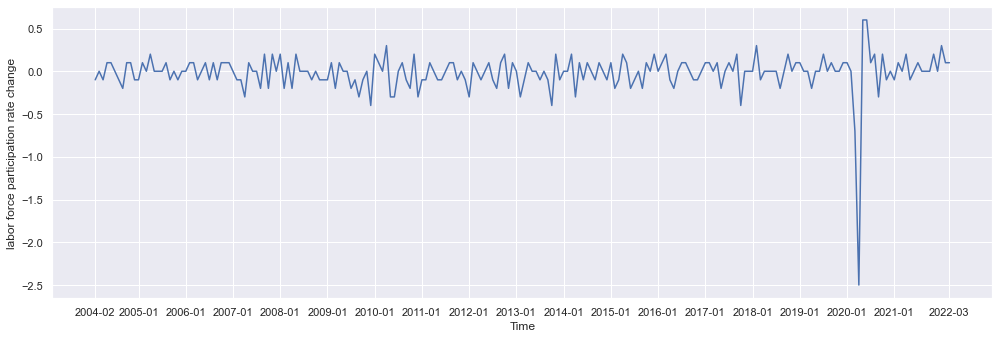

In [109]:
#lfpr data
gt_lfpr_data_top50 = pd.read_csv('gt_lfpr_data_top50.csv')

gt_lfpr_data_top50_diff = gt_lfpr_data_top50
gt_lfpr_data_top50_diff['lfpr'] = gt_lfpr_data_top50_diff['lfpr'].diff()
gt_lfpr_data_top50_diff = gt_lfpr_data_top50_diff.iloc[1:, :]

gt_lfpr_data_top50 = pd.read_csv('gt_lfpr_data_top50.csv')

gt_lfpr_data_top50_diff.to_csv(r'C:\Users\Dehon\OneDrive\Desktop\Thesis\gt_lfpr_data_top50_diff.csv', index=False)

#jobs diff data import and graph
gt_lfpr_data_top50_diff = pd.read_csv('gt_lfpr_data_top50_diff.csv')


time_in_year = ['2004-02','2005-01','2006-01','2007-01','2008-01','2009-01','2010-01','2011-01',\
                         '2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01','2021-01','2022-03']

g4 = sns.lineplot(x=gt_lfpr_data_top50_diff['Month'], y=gt_lfpr_data_top50_diff['lfpr'])

plt.xticks(time_in_year)
plt.xlabel('Time')
plt.ylabel('labor force participation rate change')

Text(0, 0.5, 'labor force participation rate')

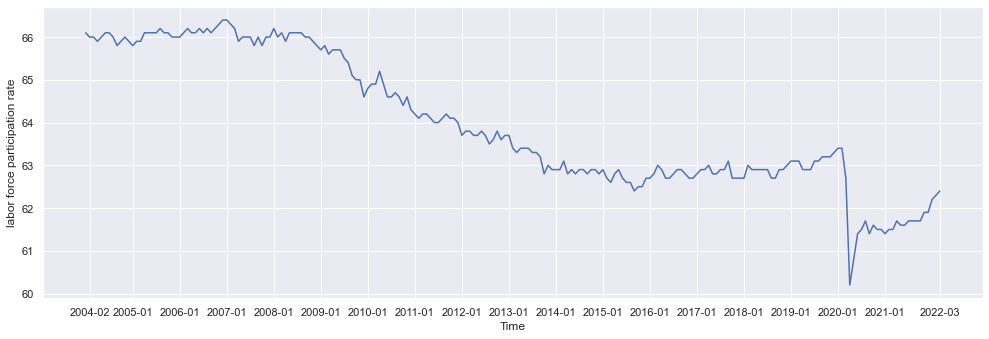

In [110]:
g4 = sns.lineplot(x=gt_lfpr_data_top50['Month'], y=gt_lfpr_data_top50['lfpr'])

plt.xticks(time_in_year)
plt.xlabel('Time')
plt.ylabel('labor force participation rate')

In [80]:
#inflation data
gt_inflation_data_top50 = pd.read_csv('gt_inflation_data_top50.csv')
# gt_inflation_data_top50

# gt_inflation_data_top50_growth = gt_inflation_data_top50
# gt_inflation_data_top50_growth['cpi_rate'] = gt_inflation_data_top50_growth['cpi_rate'].pct_change()
# gt_inflation_data_top50_growth = gt_inflation_data_top50_growth.iloc[1:, :]
# gt_inflation_data_top50 = pd.read_csv('gt_jobs_data_top10.csv')
# gt_inflation_data_top50_growth

# gt_inflation_data_top50_growth.to_csv(r'C:\Users\Dehon\OneDrive\Desktop\Thesis\gt_inflation_data_top50_growth.csv', index=False)

In [90]:
gt_inflation_data_top50

Month  cpi_rate  cpi: (United States)  inflation: (United States)  \
0    2004-01   185.200                    92                          35   
1    2004-02   186.200                    78                          34   
2    2004-03   187.400                    80                          39   
3    2004-04   188.000                    89                          44   
4    2004-05   189.100                    86                          35   
..       ...       ...                   ...                         ...   
214  2021-11   277.948                    50                          76   
215  2021-12   278.802                    51                          66   
216  2022-01   281.148                    55                          71   
217  2022-02   283.716                    75                          81   
218  2022-03   287.504                    61                          81   

     calculating inflation: (United States)  \
0                                       100   
1                                        20   
2                                        25   
3                                        57   
4                                        17   
..                                      ...   
214                                      31   
215                                      17   
216                                      22   
217                                      37   
218                                      26   

     inflation meaning: (United States)  stagflation: (United States)  \
0                                     0                             2   
1                                    15                             8   
2                                     0                            14   
3                                     7                            15   
4                                     0                            31   
..                                  ...                           ...   
214                                  82                            28   
215                                  67                            20   
216                                  76                            14   
217                                  81                            27   
218                                  86                            90   

     inflation rate: (United States)  hyperinflation: (United States)  \
0                                 65                               10   
1                                 50                               21   
2                                 63                                8   
3                                 64                               10   
4                                 46                               16   
..                               ...                              ...   
214                               71                               33   
215                               65                               23   
216                               70                               21   
217                               80                               26   
218                               76                               30   

     consumer price index: (United States)  ...  \
0                                      100  ...   
1                                       81  ...   
2                                       61  ...   
3                                       77  ...   
4                                       73  ...   
..                                     ...  ...   
214                                     14  ...   
215                                     11  ...   
216                                     11  ...   
217                                     14  ...   
218                                     11  ...   

     fed inflation: (United States)  money illusion: (United States)  \
0                                 5                                0   
1                 

In [121]:
#inflation growth data 
gt_cpi_data_top50 = pd.read_csv('gt_cpi_data_top50.csv')
gt_cpi_data_top50_growth = gt_cpi_data_top50
gt_cpi_data_top50_growth['cpi_rate'] = gt_cpi_data_top50_growth['cpi_rate'].pct_change()
gt_cpi_data_top50_growth = gt_cpi_data_top50_growth.iloc[1:, :]

gt_cpi_data_top50 = pd.read_csv('gt_cpi_data_top50.csv')

gt_cpi_data_top50_growth.to_csv(r'C:\Users\Dehon\OneDrive\Desktop\Thesis\gt_cpi_data_top50_growth.csv', index=False)

In [122]:
#inflation growth urban data 
gt_cpi_urban_data_top50 = pd.read_csv('gt_cpi_urban_data_top50.csv')
gt_cpi_urban_data_top50_growth = gt_cpi_urban_data_top50
gt_cpi_urban_data_top50_growth['cpi_rate'] = gt_cpi_urban_data_top50_growth['cpi_rate'].pct_change()
gt_cpi_urban_data_top50_growth = gt_cpi_urban_data_top50_growth.iloc[1:, :]

gt_cpi_urban_data_top50 = pd.read_csv('gt_cpi_urban_data_top50.csv')

gt_cpi_urban_data_top50_growth.to_csv(r'C:\Users\Dehon\OneDrive\Desktop\Thesis\gt_cpi_urban_data_top50_growth.csv', index=False)

In [123]:
#core inflation urban data 
gt_core_cpi_urban_data_top50 = pd.read_csv('gt_core_cpi_urban_data_top50.csv')
gt_core_cpi_urban_data_top50_growth = gt_core_cpi_urban_data_top50
gt_core_cpi_urban_data_top50_growth['cpi_rate'] = gt_core_cpi_urban_data_top50_growth['cpi_rate'].pct_change()
gt_core_cpi_urban_data_top50_growth = gt_core_cpi_urban_data_top50_growth.iloc[1:, :]

gt_core_cpi_urban_data_top50 = pd.read_csv('gt_core_cpi_urban_data_top50.csv')

gt_core_cpi_urban_data_top50_growth.to_csv(r'C:\Users\Dehon\OneDrive\Desktop\Thesis\gt_core_cpi_urban_data_top50_growth.csv', index=False)

Text(0, 0.5, 'CPI change in percentage')

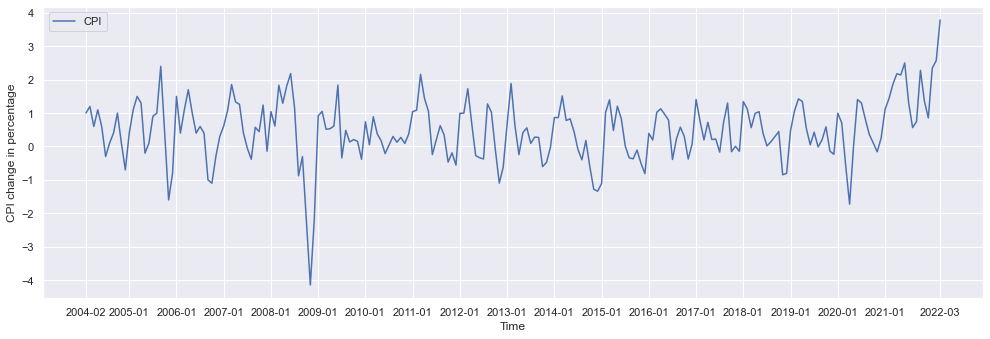

In [93]:
#inflation diff data import and graph
gt_inflation_data_top50_diff = pd.read_csv('gt_inflation_data_top50_diff.csv')
gt_inflation_data_top50_diff.head()

time_in_year = ['2004-02','2005-01','2006-01','2007-01','2008-01','2009-01','2010-01','2011-01',\
                         '2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01','2021-01','2022-03']

g4 = sns.lineplot(x=gt_inflation_data_top50_diff['Month'], y=gt_inflation_data_top50_diff['cpi_rate'], label = 'CPI')

plt.xticks(time_in_year)
plt.xlabel('Time')
plt.ylabel('CPI change in percentage')

Text(0, 0.5, 'CPI growth rate')

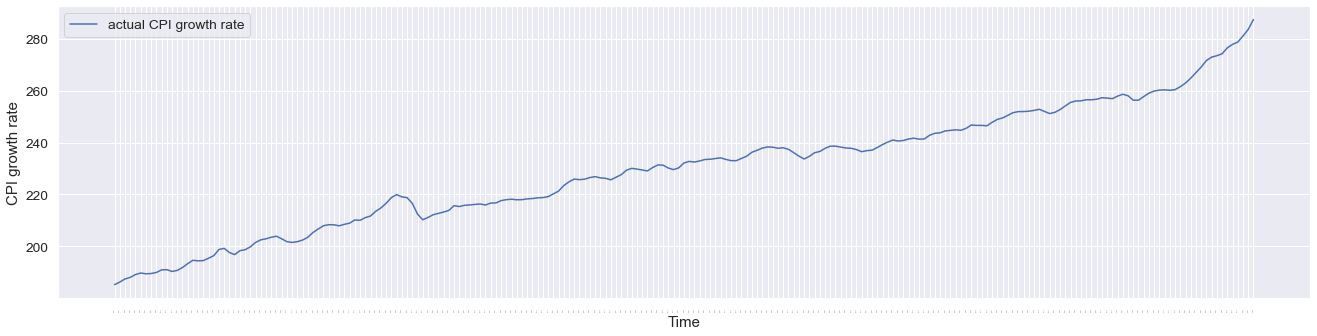

In [680]:
#inflation graph

g4 = sns.lineplot(x=month, y=gt_inflation_data_top50['cpi_rate'], label = 'actual CPI growth rate')

plt.xticks(rotation = 'vertical', fontsize = 0)
plt.xlabel('Time')
plt.ylabel('CPI growth rate')

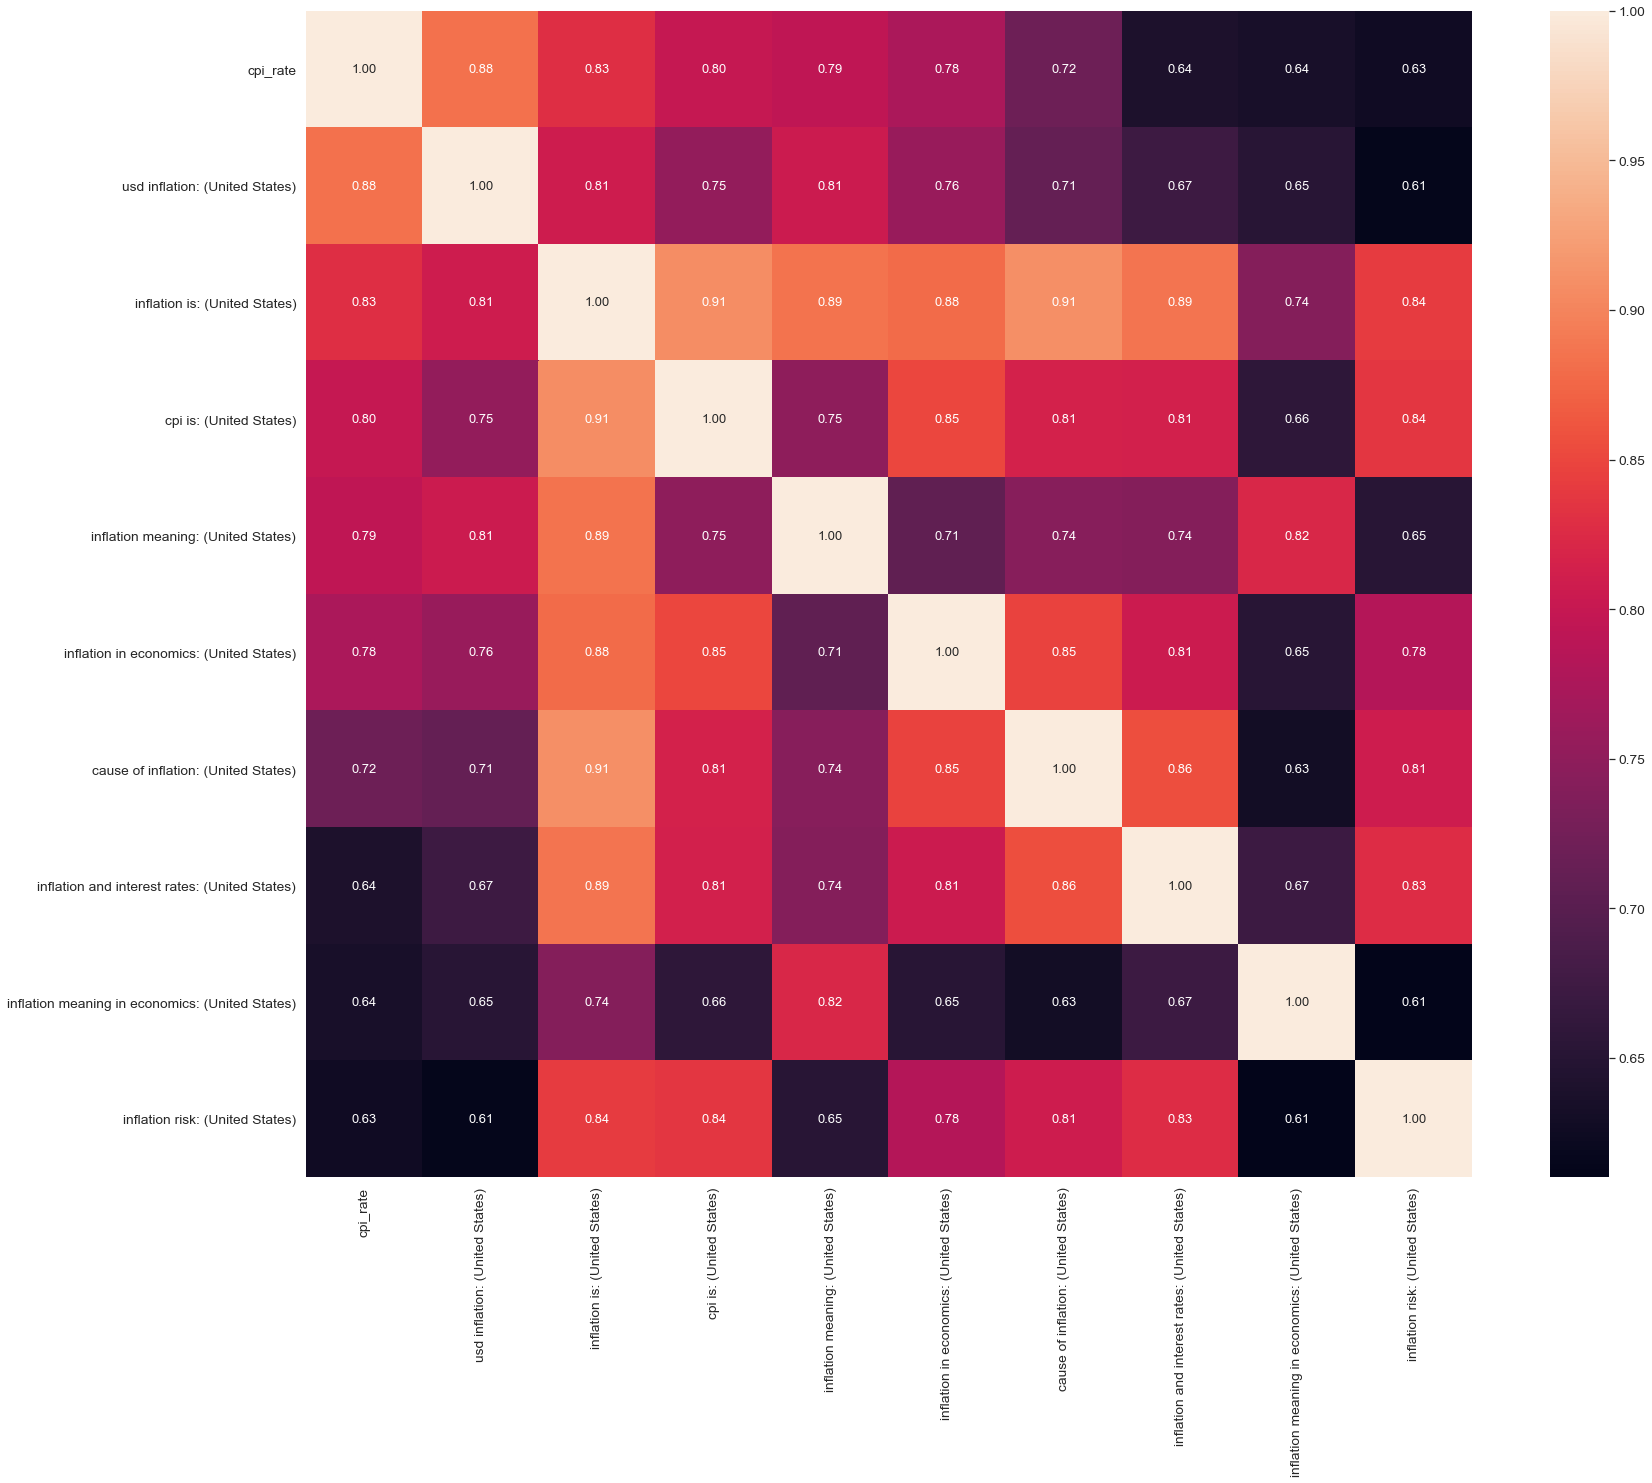

In [609]:
#inflation heatmap
corrmat1 = gt_inflation_data_top50.corr()
k=10
cols = corrmat1.nlargest(k, 'cpi_rate')['cpi_rate'].index
cm = np.corrcoef(gt_inflation_data_top50[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

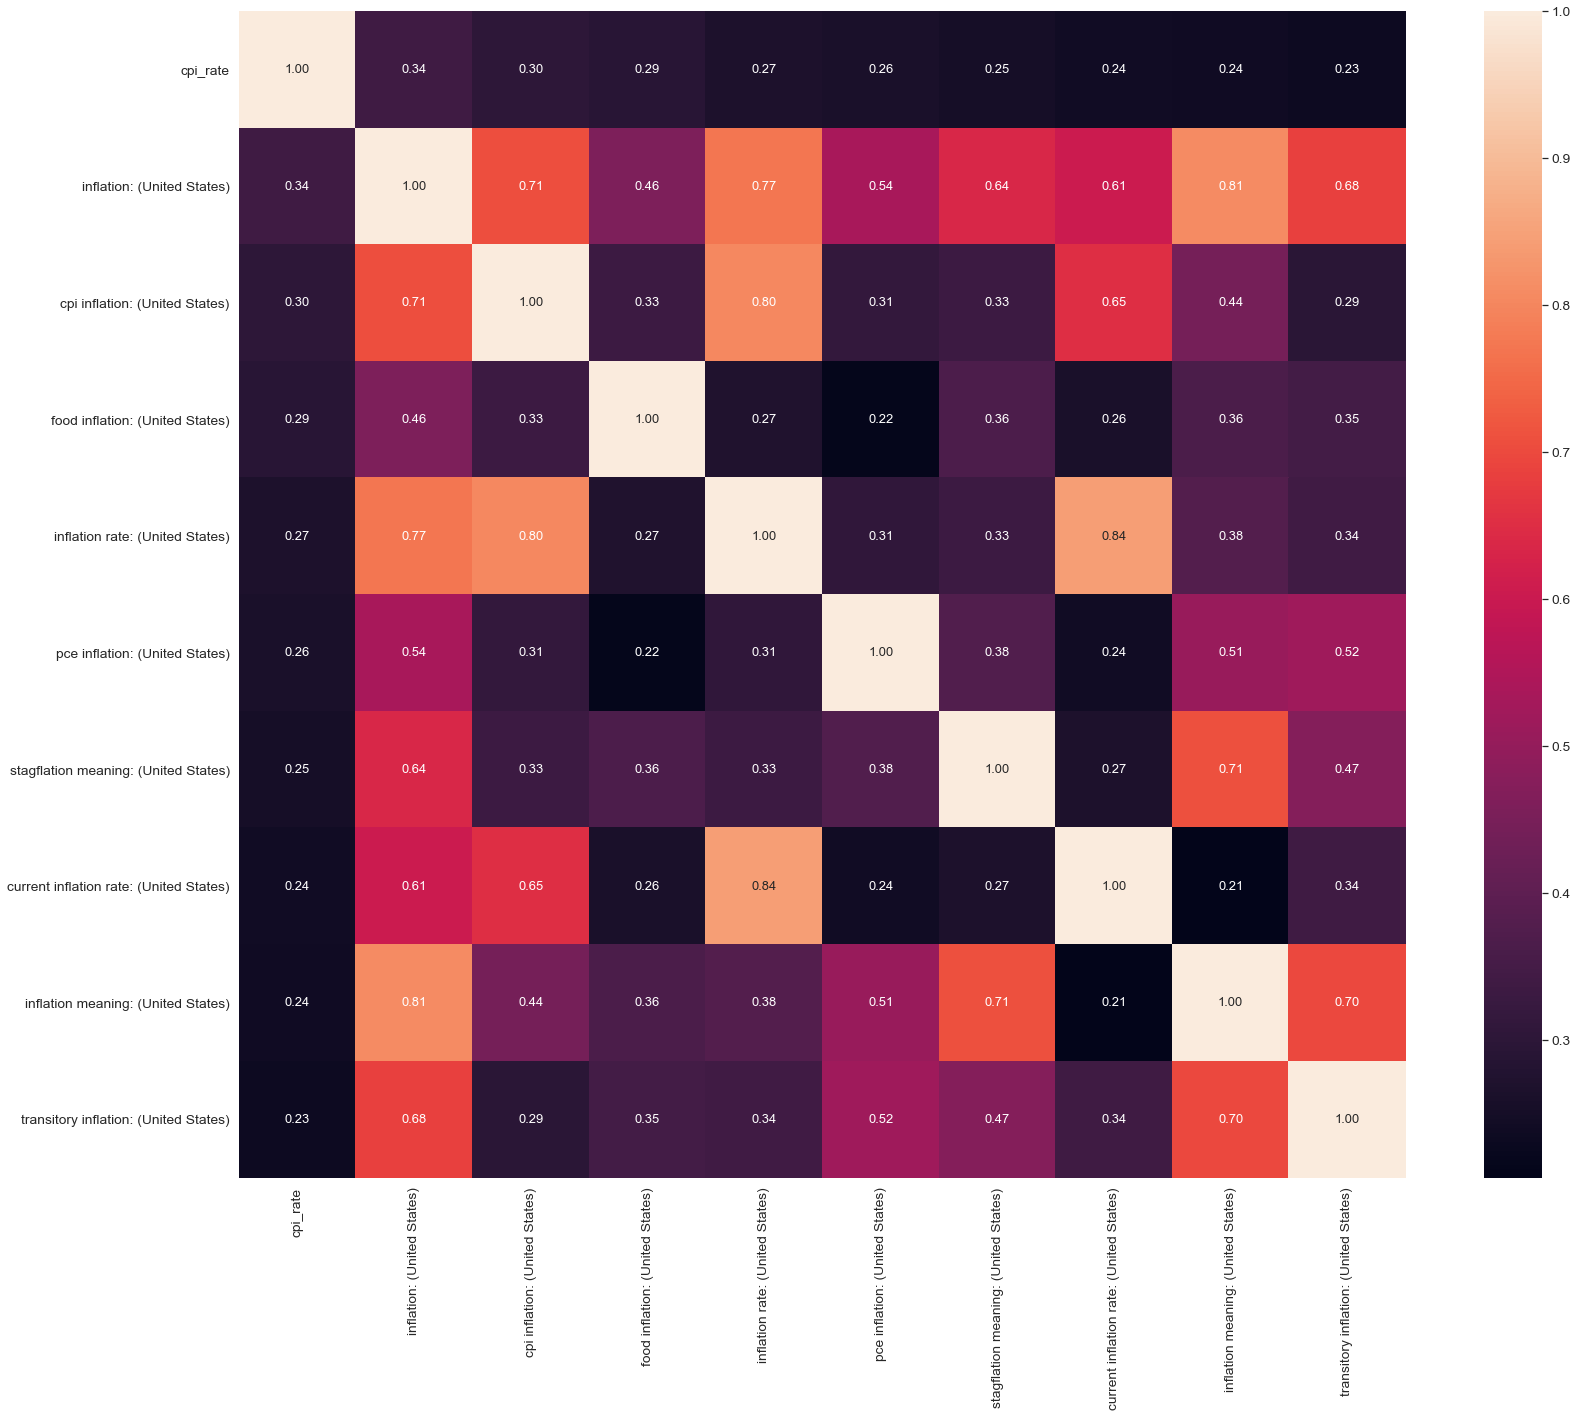

In [617]:
#inflation growth heatmap
corrmat1 = gt_inflation_data_top50_growth.corr()
k=10
cols = corrmat1.nlargest(k, 'cpi_rate')['cpi_rate'].index
cm = np.corrcoef(gt_inflation_data_top50_growth[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

Text(0.5, 0, 'Time')

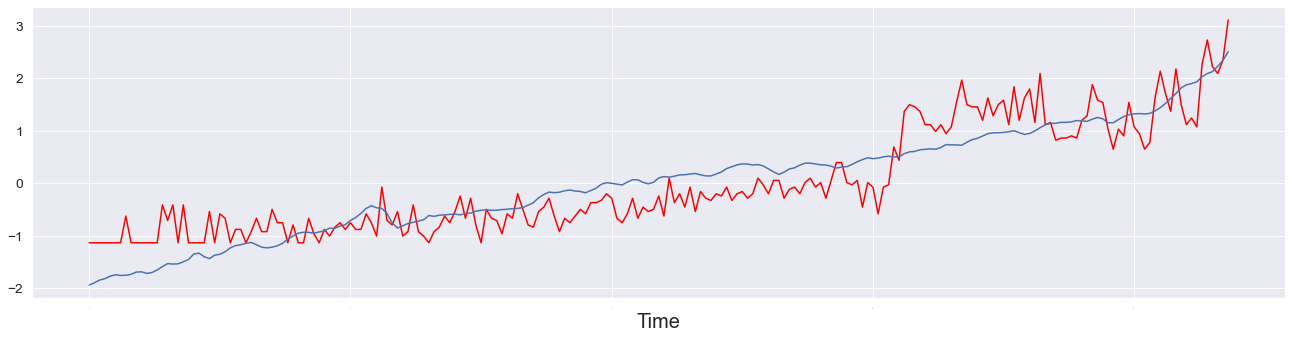

In [699]:
g = sns.lineplot(data=preprocessing.scale(gt_inflation_data_top50['usd inflation: (United States)']), color='red')
g2 = sns.lineplot(data=preprocessing.scale(gt_inflation_data_top50['cpi_rate']) )

plt.xticks(fontsize = 0)
plt.xlabel('Time', fontsize = 20)

#y label has been standardized

In [622]:
#inflation single feature prediction
gt_inflation_inflation = pd.read_csv('gt_inflation_inflation.csv') 

rolling_win_lst = [1,24,120,180]
month_ahead_lst = [1]
gt_inflation_top50_results = {}
for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_inflation_inflation, 'cpi_rate', i, j, RandomForestRegressor(),1)
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv
        
gt_inflation_top50_results

(1, 1) 0.11879048477429166
(24, 1) -0.1510588637377186
(120, 1) -0.006008935241164526
(180, 1) 0.09411320926628808


{(1, 1): 0.11879048477429166,
 (24, 1): -0.1510588637377186,
 (120, 1): -0.006008935241164526,
 (180, 1): 0.09411320926628808}

In [591]:
# gt_inflation_data_top50

In [398]:
sliding_window_pred(gt_inflation_data_top50_growth, 'cpi_rate', 1, 1)

0.11879043419489022

In [399]:
sliding_window_pred(gt_inflation_data_top50_growth, 'cpi_rate', 12, 1)

-0.030008782816501434

In [400]:
sliding_window_pred(gt_inflation_data_top50_growth, 'cpi_rate', 12, 6)

-0.131555360600627

In [401]:
sliding_window_pred(gt_inflation_data_top50_growth, 'cpi_rate', 1, 6)

-1.2454082527737853

In [411]:
sliding_window_pred(gt_inflation_data_top50_growth, 'cpi_rate', 96, 1)

0.2058439203442527

In [412]:
sliding_window_pred(gt_inflation_data_top50_growth, 'cpi_rate', 120, 1)

0.23783327820279132

In [544]:
test_lst, pred_lst = sliding_window_pred_list(gt_inflation_data_top50_growth, 'cpi_rate', 120, 1)

In [554]:
#inflation graph 
test_lst_new = []
for i in test_lst:
    test_lst_new.append(i[0])

pred_lst_new = []
for i in pred_lst:
    pred_lst_new.append(i[0])
    
# pred_lst_new

In [496]:
# pred_lst_new

In [676]:
mmm=[]
for i in gt_inflation_data_top50_growth['Month']:
    mmm.append(i)
# mmm

In [677]:
month = ['2004-01',
    '2004-02',
 '2004-03',
 '2004-04',
 '2004-05',
 '2004-06',
 '2004-07',
 '2004-08',
 '2004-09',
 '2004-10',
 '2004-11',
 '2004-12',
 '2005-01',
 '2005-02',
 '2005-03',
 '2005-04',
 '2005-05',
 '2005-06',
 '2005-07',
 '2005-08',
 '2005-09',
 '2005-10',
 '2005-11',
 '2005-12',
 '2006-01',
 '2006-02',
 '2006-03',
 '2006-04',
 '2006-05',
 '2006-06',
 '2006-07',
 '2006-08',
 '2006-09',
 '2006-10',
 '2006-11',
 '2006-12',
 '2007-01',
 '2007-02',
 '2007-03',
 '2007-04',
 '2007-05',
 '2007-06',
 '2007-07',
 '2007-08',
 '2007-09',
 '2007-10',
 '2007-11',
 '2007-12',
 '2008-01',
 '2008-02',
 '2008-03',
 '2008-04',
 '2008-05',
 '2008-06',
 '2008-07',
 '2008-08',
 '2008-09',
 '2008-10',
 '2008-11',
 '2008-12',
 '2009-01',
 '2009-02',
 '2009-03',
 '2009-04',
 '2009-05',
 '2009-06',
 '2009-07',
 '2009-08',
 '2009-09',
 '2009-10',
 '2009-11',
 '2009-12',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12',
 '2022-01',
 '2022-02',
 '2022-03']

In [580]:
month1 = ['2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12',
 '2022-01',
 '2022-02',
 '2022-03']

In [551]:
print(len(month1))
print(len(test_lst_new))
len(pred_lst_new)

97
97


98

Text(0, 0.5, 'CPI growth rate')

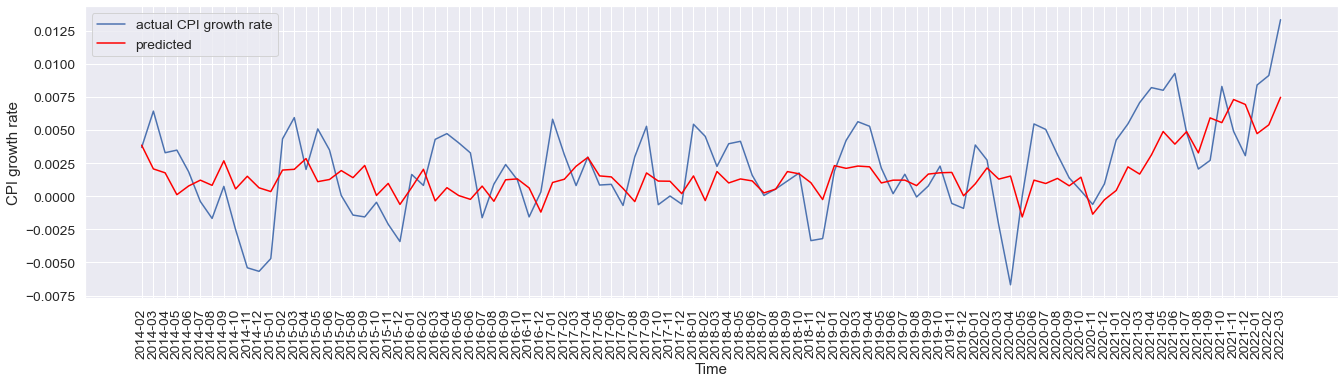

In [650]:
g4 = sns.lineplot(x=month1, y=test_lst_new, label = 'actual CPI growth rate')
g3 = sns.lineplot(x=month1, y=pred_lst_new, color = 'red', label = 'predicted')
plt.xticks(rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('CPI growth rate')

Text(0, 0.5, 'CPI change in percentage')

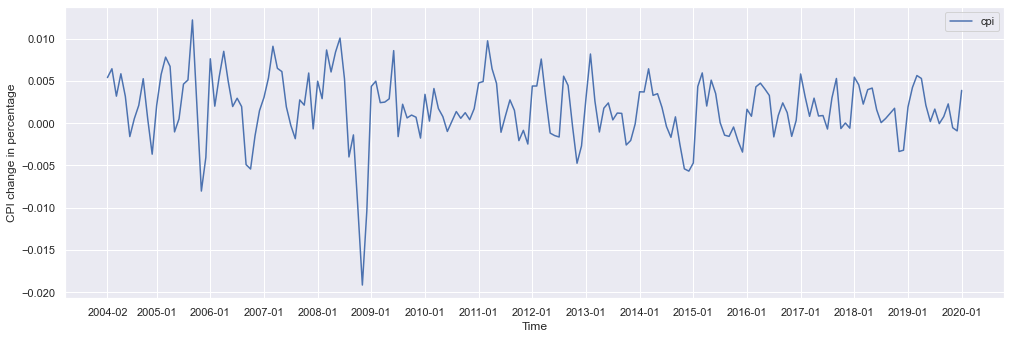

In [42]:
#pre-covid inflation growth data import and graph
gt_inflation_data_top50_growth_precovid = pd.read_csv('gt_inflation_data_top50_growth_pre-covid.csv')
gt_inflation_data_top50_growth_precovid.head()
len(gt_inflation_data_top50_growth_precovid)

g4 = sns.lineplot(x=gt_inflation_data_top50_growth_precovid['Month'], \
                  y=gt_inflation_data_top50_growth_precovid['cpi_rate'], label = 'cpi')

time_in_year_precovid = ['2004-02','2005-01','2006-01','2007-01','2008-01','2009-01','2010-01','2011-01',\
                         '2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01']

plt.xticks(time_in_year_precovid)   
plt.xlabel('Time')
plt.ylabel('CPI change in percentage')

In [479]:
sliding_window_pred(gt_inflation_data_top50_growth, 'cpi_rate', 108, 1)

0.2007213153201125

In [611]:
#inflation models rf

rolling_win_lst = [1,24,120]
month_ahead_lst = [1,12]
gt_inflation_top50_results = {}
for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_inflation_data_top50, 'cpi_rate', i, j, RandomForestRegressor(),50)
        gt_inflation_top50_results[(i,j)] = rv
        
gt_inflation_top50_results

{(1, 1): 0.9979689088315971,
 (1, 12): 0.9111761392641613,
 (24, 1): 0.956596134179001,
 (24, 12): 0.773841242876361,
 (120, 1): 0.8220221828452647,
 (120, 12): 0.27790813554651783}

In [589]:
#inflation growth models rf

rolling_win_lst = [1,3,12,24,48,72,120]
month_ahead_lst = [1,3,12]
gt_inflation_top50_results = {}
for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_inflation_data_top50_growth, 'cpi_rate', i, j, RandomForestRegressor())
        gt_inflation_top50_results[(i,j)] = rv
        
gt_inflation_top50_results

{(1, 1): 0.11879043419489022,
 (1, 3): -1.0721240617390326,
 (1, 12): -0.3836585508671666,
 (3, 1): -0.17245495843022107,
 (3, 3): -0.7898891010807405,
 (3, 12): -0.23657110538935555,
 (12, 1): 0.014000922221153234,
 (12, 3): -0.21076931674564037,
 (12, 12): -0.2061492888398333,
 (24, 1): -0.006739645557673812,
 (24, 3): -0.22407034267631087,
 (24, 12): -0.0991775898307945,
 (48, 1): 0.049235727601911417,
 (48, 3): -0.10777316334056919,
 (48, 12): -0.04952052845830912,
 (72, 1): 0.11157550963637908,
 (72, 3): 0.04540477468395954,
 (72, 12): 0.05194280294763198,
 (120, 1): 0.22812486362495354,
 (120, 3): 0.17016890827498832,
 (120, 12): 0.04758157237058991}

In [586]:
#inflation growth models rf 2

rolling_win_lst = [120, 144, 168, 180, 192]
month_ahead_lst = [1]
gt_inflation_top50_results = {}
for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_inflation_data_top50_growth, 'cpi_rate', i, j, RandomForestRegressor())
        gt_inflation_top50_results[(i,j)] = rv
        
gt_inflation_top50_results

{(120, 1): 0.24018075412299833,
 (144, 1): 0.2406677726255746,
 (168, 1): 0.242711562084843,
 (180, 1): 0.10366943714451271,
 (192, 1): 0.1681031706072933}

In [45]:
#inflation growth models precovid
rolling_win_lst = [1,12,48,96,120,144,168]
month_ahead_lst = [1,3,12]
gt_inflation_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_inflation_data_top50_growth_precovid, 'cpi_rate', i, j, RandomForestRegressor(),50)
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv


gt_inflation_top50_results

(1, 1) 0.03102673849967552
(1, 3) -1.2466539819678748
(1, 12) -0.38192205100781407
(12, 1) -0.06404507793054903
(12, 3) -0.25184989743473407
(12, 12) -0.059961026968536446
(48, 1) -0.06073166541147379
(48, 3) -0.24001820932468854
(48, 12) -0.05397885138252945
(96, 1) 0.08153272908593612
(96, 3) -0.006981637631415349
(96, 12) 0.09399580745459735
(120, 1) 0.06704859533477214
(120, 3) -0.0657847550690307
(120, 12) -0.06495730424871504
(144, 1) -0.16147992476747075
(144, 3) -0.07600788906119127
(144, 12) 0.004791480281061911
(168, 1) 0.019175799758997303
(168, 3) 0.2158462244244037
(168, 12) 0.1595675510498692


{}

In [460]:
#inflation volatility data and rf models
gt_inflation_data_top50_volatility = pd.read_csv('gt_inflation_data_top50_growth_volatility.csv')

rolling_win_lst = [1,3,12,24,48,72,120]
month_ahead_lst = [1,3,12]
gt_inflation_top50_volatility_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_inflation_data_top50_volatility, 'cpi_rate volatility', i, j)
        print((i,j), rv)
        gt_inflation_top50_volatility_results[(i,j)] = rv


gt_inflation_top50_volatility_results

(1, 1) -0.04992785189569715
(1, 3) -0.7992780489916695
(1, 12) -0.5299748635897348
(3, 1) -0.09605657042116311
(3, 3) -0.4290913838056276
(3, 12) -0.2506852135370605
(12, 1) 0.05693410490107631
(12, 3) -0.028735097352579952
(12, 12) -0.2052244201666713
(24, 1) 0.04404754217050366
(24, 3) -0.033600362405316275
(24, 12) -0.08040530564086512
(48, 1) 0.11934719422258899
(48, 3) 0.006732912762016929
(48, 12) -0.18310370458106617
(72, 1) 0.02509447400027176
(72, 3) -0.08375715130297601
(72, 12) -0.016485776199401503
(120, 1) 0.24475764735657335
(120, 3) 0.21294469434653884
(120, 12) 0.2170810417323682


{(1, 1): -0.04992785189569715,
 (1, 3): -0.7992780489916695,
 (1, 12): -0.5299748635897348,
 (3, 1): -0.09605657042116311,
 (3, 3): -0.4290913838056276,
 (3, 12): -0.2506852135370605,
 (12, 1): 0.05693410490107631,
 (12, 3): -0.028735097352579952,
 (12, 12): -0.2052244201666713,
 (24, 1): 0.04404754217050366,
 (24, 3): -0.033600362405316275,
 (24, 12): -0.08040530564086512,
 (48, 1): 0.11934719422258899,
 (48, 3): 0.006732912762016929,
 (48, 12): -0.18310370458106617,
 (72, 1): 0.02509447400027176,
 (72, 3): -0.08375715130297601,
 (72, 12): -0.016485776199401503,
 (120, 1): 0.24475764735657335,
 (120, 3): 0.21294469434653884,
 (120, 12): 0.2170810417323682}

In [588]:
#inflation volatility data and rf models 2
gt_inflation_data_top50_volatility = pd.read_csv('gt_inflation_data_top50_growth_volatility.csv')

rolling_win_lst = [120, 144, 168, 180, 192]
month_ahead_lst = [1]
gt_inflation_top50_volatility_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_inflation_data_top50_volatility, 'cpi_rate volatility', i, j, RandomForestRegressor())
        print((i,j), rv)
        gt_inflation_top50_volatility_results[(i,j)] = rv


gt_inflation_top50_volatility_results

(120, 1) 0.24494841739378626
(144, 1) 0.29850215541582525
(168, 1) 0.4242048672324825
(180, 1) 0.3654743240165742
(192, 1) 0.2877203148761541


{(120, 1): 0.24494841739378626,
 (144, 1): 0.29850215541582525,
 (168, 1): 0.4242048672324825,
 (180, 1): 0.3654743240165742,
 (192, 1): 0.2877203148761541}

In [51]:
gt_inflation_data_top50_growth_volatility_precovid = pd.read_csv('gt_inflation_data_top50_growth_volatility_pre-covid.csv')

#inflation volatility models precovid
rolling_win_lst = [1,12,48,96,120,144,168]
month_ahead_lst = [1,12]
gt_inflation_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_inflation_data_top50_growth_volatility_precovid, 'cpi_rate volatility', i, j, RandomForestRegressor(),50)
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv


gt_inflation_top50_results

(1, 1) -0.13460866251584624
(1, 12) -0.6632521418791659
(12, 1) -0.013125592953221465
(12, 12) -0.22050220776358365
(48, 1) -0.003811703514422282
(48, 12) -0.6017633084689311
(96, 1) -0.09299457852490622
(96, 12) -0.1854278275340746
(120, 1) -0.0138953773753423
(120, 12) -0.11339544901687915
(144, 1) -0.027114799004874124
(144, 12) -0.04982653132327752
(168, 1) 0.0943234957248903
(168, 12) 0.12157986658638631


{(1, 1): -0.13460866251584624,
 (1, 12): -0.6632521418791659,
 (12, 1): -0.013125592953221465,
 (12, 12): -0.22050220776358365,
 (48, 1): -0.003811703514422282,
 (48, 12): -0.6017633084689311,
 (96, 1): -0.09299457852490622,
 (96, 12): -0.1854278275340746,
 (120, 1): -0.0138953773753423,
 (120, 12): -0.11339544901687915,
 (144, 1): -0.027114799004874124,
 (144, 12): -0.04982653132327752,
 (168, 1): 0.0943234957248903,
 (168, 12): 0.12157986658638631}

In [100]:
gt_inflation_data_top50_diff = pd.read_csv('gt_inflation_data_top50_diff.csv')

#inflation diff models
rolling_win_lst = [1,12,48,96,120,144,168,180,192]
month_ahead_lst = [1,12]
gt_inflation_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_inflation_data_top50_diff, 'cpi_rate', i, j, RandomForestRegressor(),50)
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv


gt_inflation_top50_results

(1, 1) 0.17370739740125718
(1, 12) -0.32182161126082054
(12, 1) 0.04082945250717551
(12, 12) -0.21139386184352582
(48, 1) 0.09026614287438561
(48, 12) -0.007785275519791357
(96, 1) 0.2565799275778058
(96, 12) 0.03783496679777021
(120, 1) 0.287252507649315
(120, 12) 0.05813990034749361
(144, 1) 0.3078487967541236
(144, 12) -0.05266265141552795
(168, 1) 0.25865988410389606
(168, 12) -0.6124411235389939
(180, 1) 0.2248213300841294
(180, 12) -0.66810848081998
(192, 1) 0.17871802366704526
(192, 12) -3.487881806175446


{(1, 1): 0.17370739740125718,
 (1, 12): -0.32182161126082054,
 (12, 1): 0.04082945250717551,
 (12, 12): -0.21139386184352582,
 (48, 1): 0.09026614287438561,
 (48, 12): -0.007785275519791357,
 (96, 1): 0.2565799275778058,
 (96, 12): 0.03783496679777021,
 (120, 1): 0.287252507649315,
 (120, 12): 0.05813990034749361,
 (144, 1): 0.3078487967541236,
 (144, 12): -0.05266265141552795,
 (168, 1): 0.25865988410389606,
 (168, 12): -0.6124411235389939,
 (180, 1): 0.2248213300841294,
 (180, 12): -0.66810848081998,
 (192, 1): 0.17871802366704526,
 (192, 12): -3.487881806175446}

In [107]:
#inflation diff volatility models

gt_inflation_data_top50_diff_volatility = pd.read_csv('gt_inflation_data_top50_diff_volatility.csv')

rolling_win_lst = [1,12,48,96,120,144,168,180,192]
month_ahead_lst = [1]
gt_inflation_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_inflation_data_top50_diff_volatility, 'cpi_rate', i, j, RandomForestRegressor(),50)
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv


gt_inflation_top50_results

(1, 1) 0.020331967370346926
(12, 1) 0.10284795610179265
(48, 1) 0.14882021795570266
(96, 1) 0.2587758738614073
(120, 1) 0.3263703255212068
(144, 1) 0.36349406559510034
(168, 1) 0.4569565028499135
(180, 1) 0.4185391652114162
(192, 1) 0.28670355788187196


{(1, 1): 0.020331967370346926,
 (12, 1): 0.10284795610179265,
 (48, 1): 0.14882021795570266,
 (96, 1): 0.2587758738614073,
 (120, 1): 0.3263703255212068,
 (144, 1): 0.36349406559510034,
 (168, 1): 0.4569565028499135,
 (180, 1): 0.4185391652114162,
 (192, 1): 0.28670355788187196}

In [644]:
test_lst2, pred_lst2 = sliding_window_pred_list(gt_inflation_data_top50_volatility, 'cpi_rate volatility', 168, 1)

In [645]:
test_lst_new2 = []
for i in test_lst2:
    test_lst_new2.append(i[0])

pred_lst_new2 = []
for i in pred_lst2:
    pred_lst_new2.append(i[0])
    
# test_lst_new2

In [647]:
month2 = ['2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12',
 '2022-01',
 '2022-02',
 '2022-03']

Text(0, 0.5, 'CPI growth rate volatility')

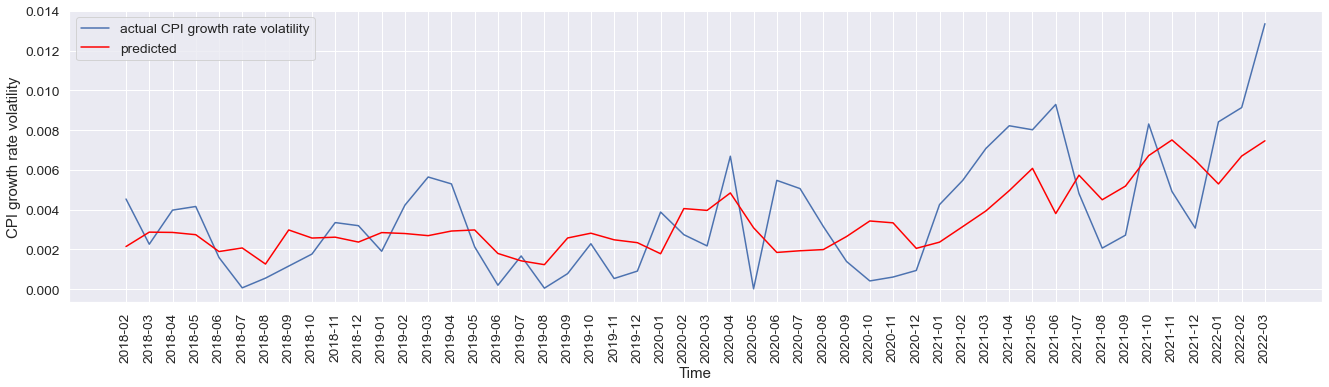

In [651]:
#inflation volatility graph
g4 = sns.lineplot(x=month2, y=test_lst_new2, label = 'actual CPI growth rate volatility')
g3 = sns.lineplot(x=month2, y=pred_lst_new2, color = 'red', label = 'predicted')
plt.xticks(rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('CPI growth rate volatility')

In [568]:
#inflation models gb 
rolling_win_lst = [1,3,12,24,48,72,120]
month_ahead_lst = [1,3,12]
gt_inflation_top50_results = {}
for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_inflation_data_top50_growth, 'cpi_rate', i, j, GradientBoostingRegressor())
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv
        
gt_inflation_top50_results

(1, 1) 0.11879043419488988
(1, 3) -1.0721240617390335
(1, 12) -0.38365855086716727
(3, 1) -0.23614284703123012
(3, 3) -0.7881671063037667
(3, 12) -0.30651454442264736
(12, 1) -0.32117978852959883
(12, 3) -0.6191064188687059
(12, 12) -0.47451987999029654
(24, 1) -0.21988281580254854
(24, 3) -0.5645321374067622
(24, 12) -0.2704511440447859
(48, 1) -0.13159654837695212
(48, 3) -0.17794715324587584
(48, 12) 0.022128688082733605
(72, 1) 0.08781842389651284
(72, 3) -0.08612616924794403
(72, 12) 0.05789329572000379
(120, 1) 0.1884344749294048
(120, 3) 0.1339672975177857
(120, 12) 0.05184246620925703


{(1, 1): 0.11879043419488988,
 (1, 3): -1.0721240617390335,
 (1, 12): -0.38365855086716727,
 (3, 1): -0.23614284703123012,
 (3, 3): -0.7881671063037667,
 (3, 12): -0.30651454442264736,
 (12, 1): -0.32117978852959883,
 (12, 3): -0.6191064188687059,
 (12, 12): -0.47451987999029654,
 (24, 1): -0.21988281580254854,
 (24, 3): -0.5645321374067622,
 (24, 12): -0.2704511440447859,
 (48, 1): -0.13159654837695212,
 (48, 3): -0.17794715324587584,
 (48, 12): 0.022128688082733605,
 (72, 1): 0.08781842389651284,
 (72, 3): -0.08612616924794403,
 (72, 12): 0.05789329572000379,
 (120, 1): 0.1884344749294048,
 (120, 3): 0.1339672975177857,
 (120, 12): 0.05184246620925703}

In [583]:
#inflation models gb 2
rolling_win_lst = [120,144,168]
month_ahead_lst = [1]
gt_inflation_top50_results = {}
for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_inflation_data_top50_growth, 'cpi_rate', i, j, GradientBoostingRegressor())
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv
        
gt_inflation_top50_results

(120, 1) 0.18884023818120144
(144, 1) 0.23752041455026962
(168, 1) 0.11964577927798992


{(120, 1): 0.18884023818120144,
 (144, 1): 0.23752041455026962,
 (168, 1): 0.11964577927798992}

In [587]:
#inflation models en 
rolling_win_lst = [120,144,168]
month_ahead_lst = [1]
gt_inflation_top50_results = {}
for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_inflation_data_top50_growth, 'cpi_rate', i, j, ElasticNet())
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv
        
gt_inflation_top50_results

(120, 1) -0.027215709779835118
(144, 1) -0.08173494286784089
(168, 1) -0.1364456537887253


{(120, 1): -0.027215709779835118,
 (144, 1): -0.08173494286784089,
 (168, 1): -0.1364456537887253}

In [636]:
#inflation models en 2
rolling_win_lst = [1,24,72]
month_ahead_lst = [1]
gt_inflation_top50_results = {}
for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_inflation_data_top50_growth, 'cpi_rate', i, j, ElasticNet(),50)
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv
        
gt_inflation_top50_results

(1, 1) 0.11879043419488988
(24, 1) 0.006228505737556622
(72, 1) 0.025148090831444092


{(1, 1): 0.11879043419488988,
 (24, 1): 0.006228505737556622,
 (72, 1): 0.025148090831444092}

In [129]:
#GDP data
gt_gdp_data_top50 = pd.read_csv('gt_gdp_data_top50.csv')
gt_gdp_data_top50

gt_gdp_data_top50_growth = gt_gdp_data_top50
gt_gdp_data_top50_growth['gdp (in trillion)'] = gt_gdp_data_top50_growth['gdp (in trillion)'].pct_change()
gt_gdp_data_top50_growth = gt_gdp_data_top50_growth.iloc[1:, :]
gt_gdp_data_top50 = pd.read_csv('gt_gdp_data_top50.csv')
gt_gdp_data_top50_growth

gt_gdp_data_top50_growth.to_csv(r'C:\Users\Dehon\OneDrive\Desktop\Thesis\gt_gdp_data_top50_growth.csv', index=False)

Text(0, 0.5, 'gdp (in trillion)')

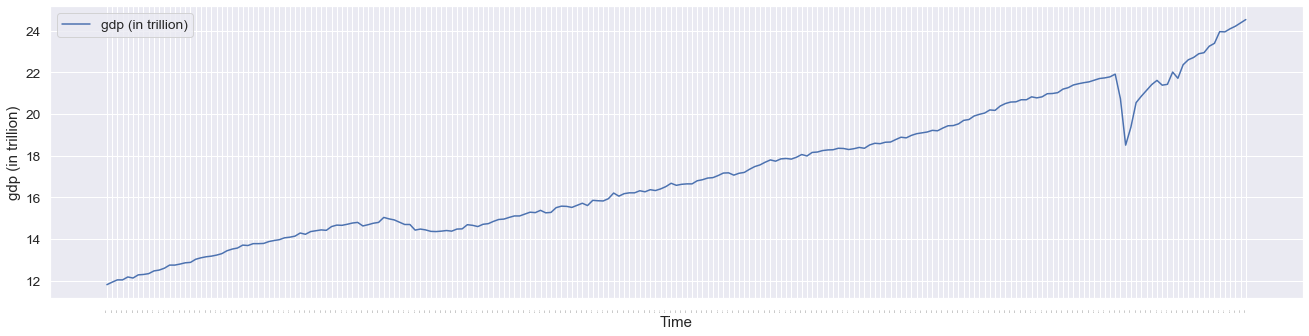

In [683]:
#gdp graph

g4 = sns.lineplot(x=month, y=gt_gdp_data_top50['gdp (in trillion)'], label = 'gdp (in trillion)')

plt.xticks(rotation = 'vertical', fontsize = 0)
plt.xlabel('Time')
plt.ylabel('gdp (in trillion)')

Text(0, 0.5, 'GDP change')

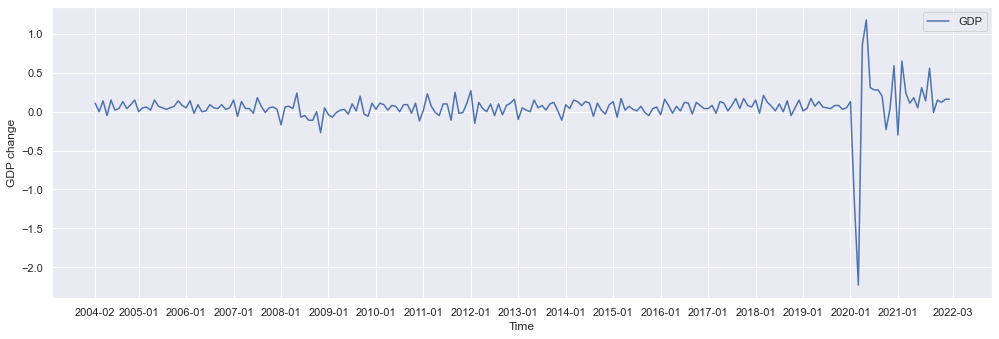

In [115]:
#gdp diff data 
gt_gdp_data_top50_diff = gt_gdp_data_top50
gt_gdp_data_top50_diff['gdp (in trillion)'] = gt_gdp_data_top50_diff['gdp (in trillion)'].diff()
gt_gdp_data_top50_diff = gt_gdp_data_top50_diff.iloc[1:, :]

gt_gdp_data_top50 = pd.read_csv('gt_gdp_data_top50.csv')

gt_gdp_data_top50_diff.to_csv(r'C:\Users\Dehon\OneDrive\Desktop\Thesis\gt_gdp_data_top50_diff.csv', index=False)

#jobs diff data import and graph
gt_gdp_data_top50_diff = pd.read_csv('gt_gdp_data_top50_diff.csv')


time_in_year = ['2004-02','2005-01','2006-01','2007-01','2008-01','2009-01','2010-01','2011-01',\
                         '2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01','2021-01','2022-03']

g4 = sns.lineplot(x=gt_jobs_data_top50_diff['Month'], y=gt_gdp_data_top50_diff['gdp (in trillion)'], label = 'GDP')

plt.xticks(time_in_year)
plt.xlabel('Time')
plt.ylabel('GDP change')

In [125]:
#gdp per capita growth data 
gt_gdp_percapita_data_top50 = pd.read_csv('gt_gdp_percapita_data_top50.csv')

gt_gdp_percapita_data_top50_growth = gt_gdp_percapita_data_top50
gt_gdp_percapita_data_top50_growth['gdp'] = gt_gdp_percapita_data_top50_growth['gdp'].pct_change()
gt_gdp_percapita_data_top50_growth = gt_gdp_data_top50_diff.iloc[1:, :]

gt_gdp_percapita_data_top50 = pd.read_csv('gt_gdp_percapita_data_top50.csv')

gt_gdp_percapita_data_top50_growth.to_csv(r'C:\Users\Dehon\OneDrive\Desktop\Thesis\gt_gdp_percapita_data_top50_growth.csv', index=False)


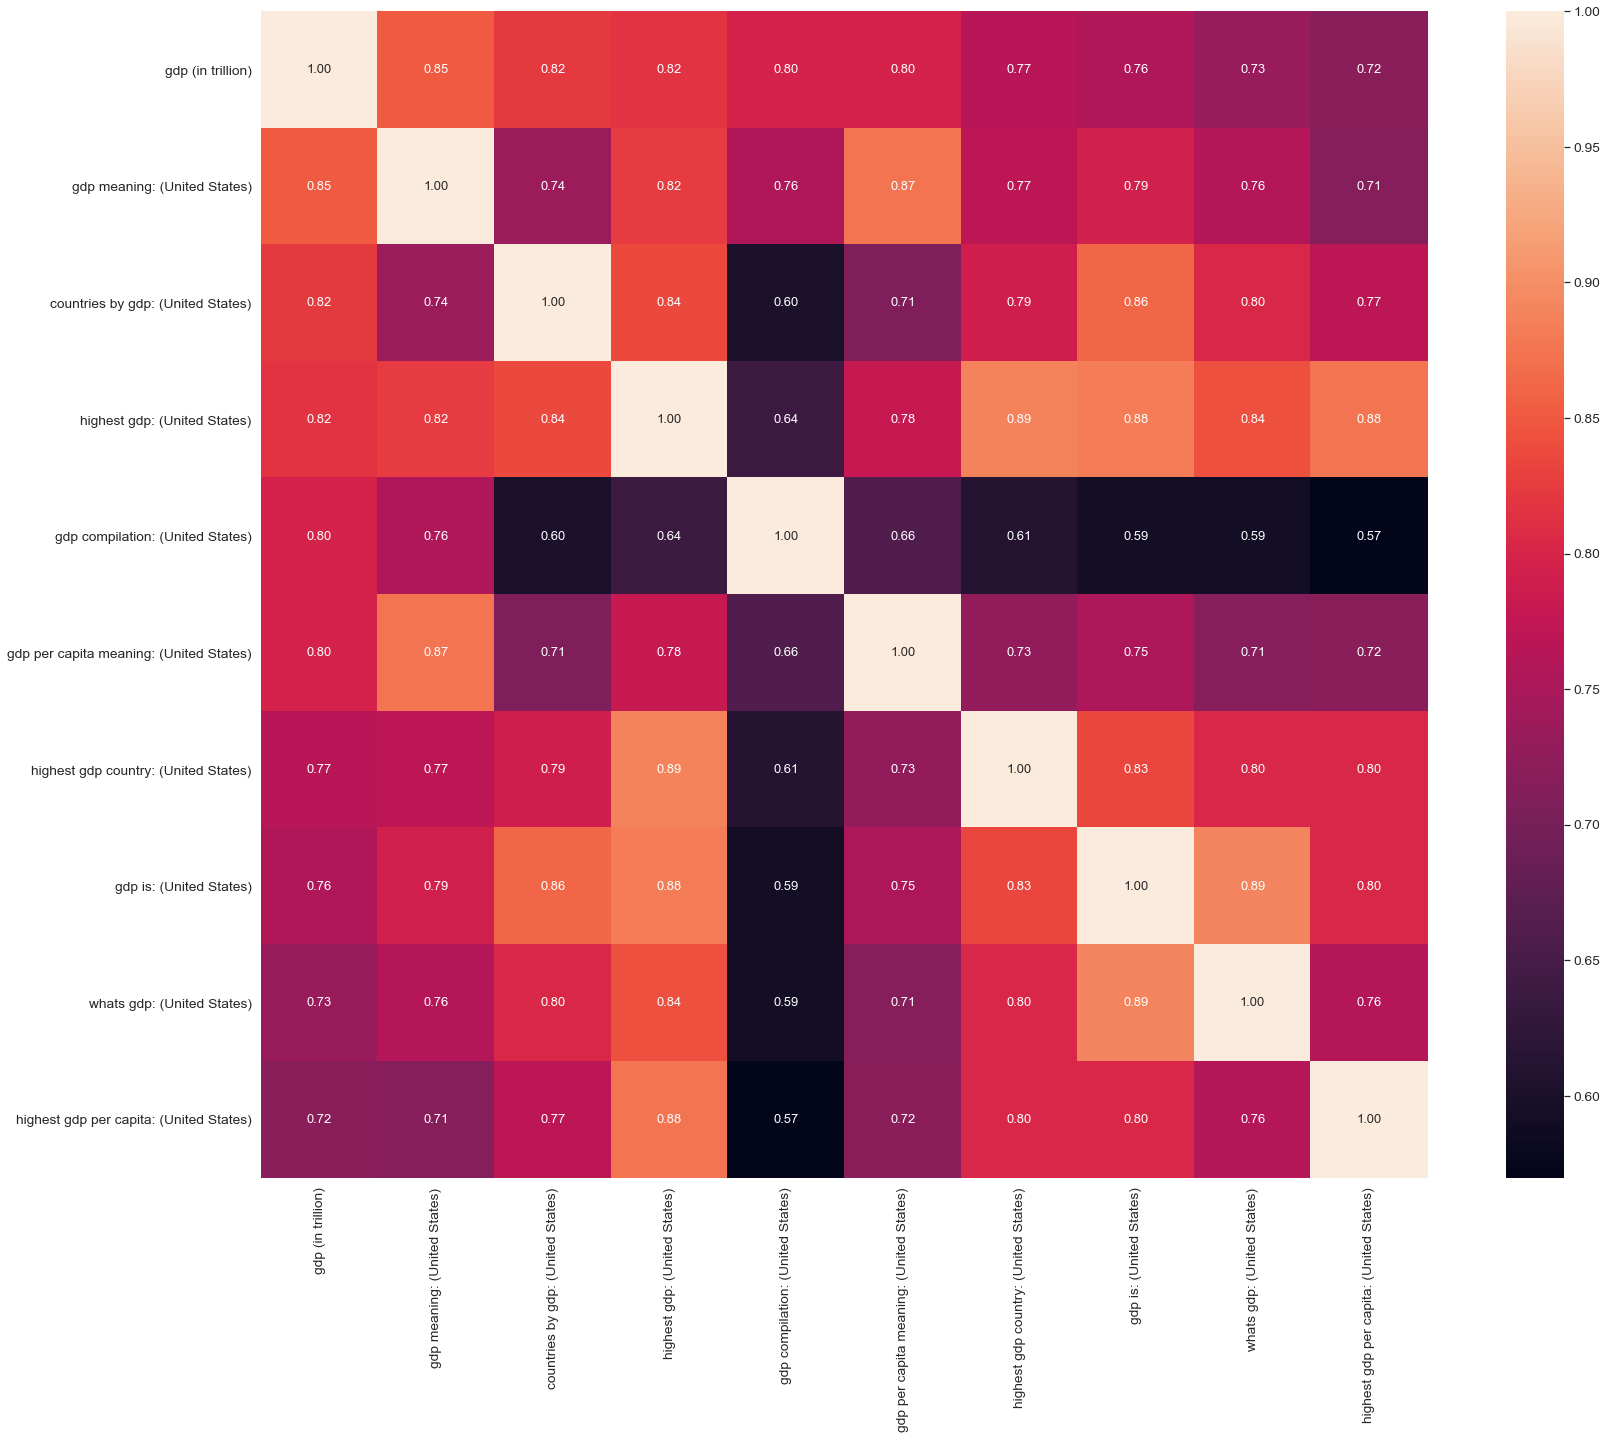

In [655]:
#gdp heatmap
corrmat1 = gt_gdp_data_top50.corr()
k=10
cols = corrmat1.nlargest(k, 'gdp (in trillion)')['gdp (in trillion)'].index
cm = np.corrcoef(gt_gdp_data_top50[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

In [670]:
#gdp single feature prediction
gt_gdp_gdpmeaning = pd.read_csv('gt_gdp_gdpmeaning.csv')

rolling_win_lst = [1,24,120,180]
month_ahead_lst = [1]
gt_inflation_top50_results = {}
for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_gdp_gdpmeaning, 'gdp (in trillion)', i, j, RandomForestRegressor(),1)
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv
        
gt_inflation_top50_results

(1, 1) 0.9943954628673832
(24, 1) 0.9052903308970318
(120, 1) 0.34365600450342026
(180, 1) -0.6831206803189291


{(1, 1): 0.9943954628673832,
 (24, 1): 0.9052903308970318,
 (120, 1): 0.34365600450342026,
 (180, 1): -0.6831206803189291}

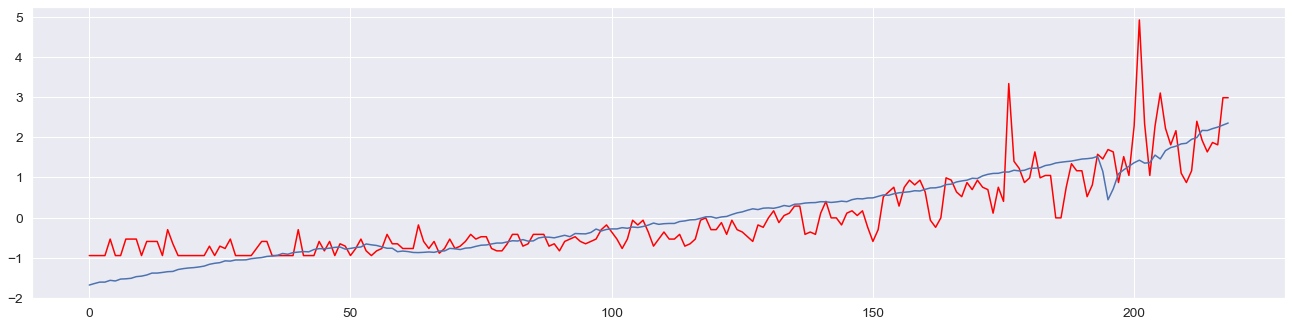

In [671]:
g = sns.lineplot(data=preprocessing.scale(gt_gdp_gdpmeaning['gdp meaning: (United States)']), color='red')
g2 = sns.lineplot(data=preprocessing.scale(gt_gdp_gdpmeaning['gdp (in trillion)']) )

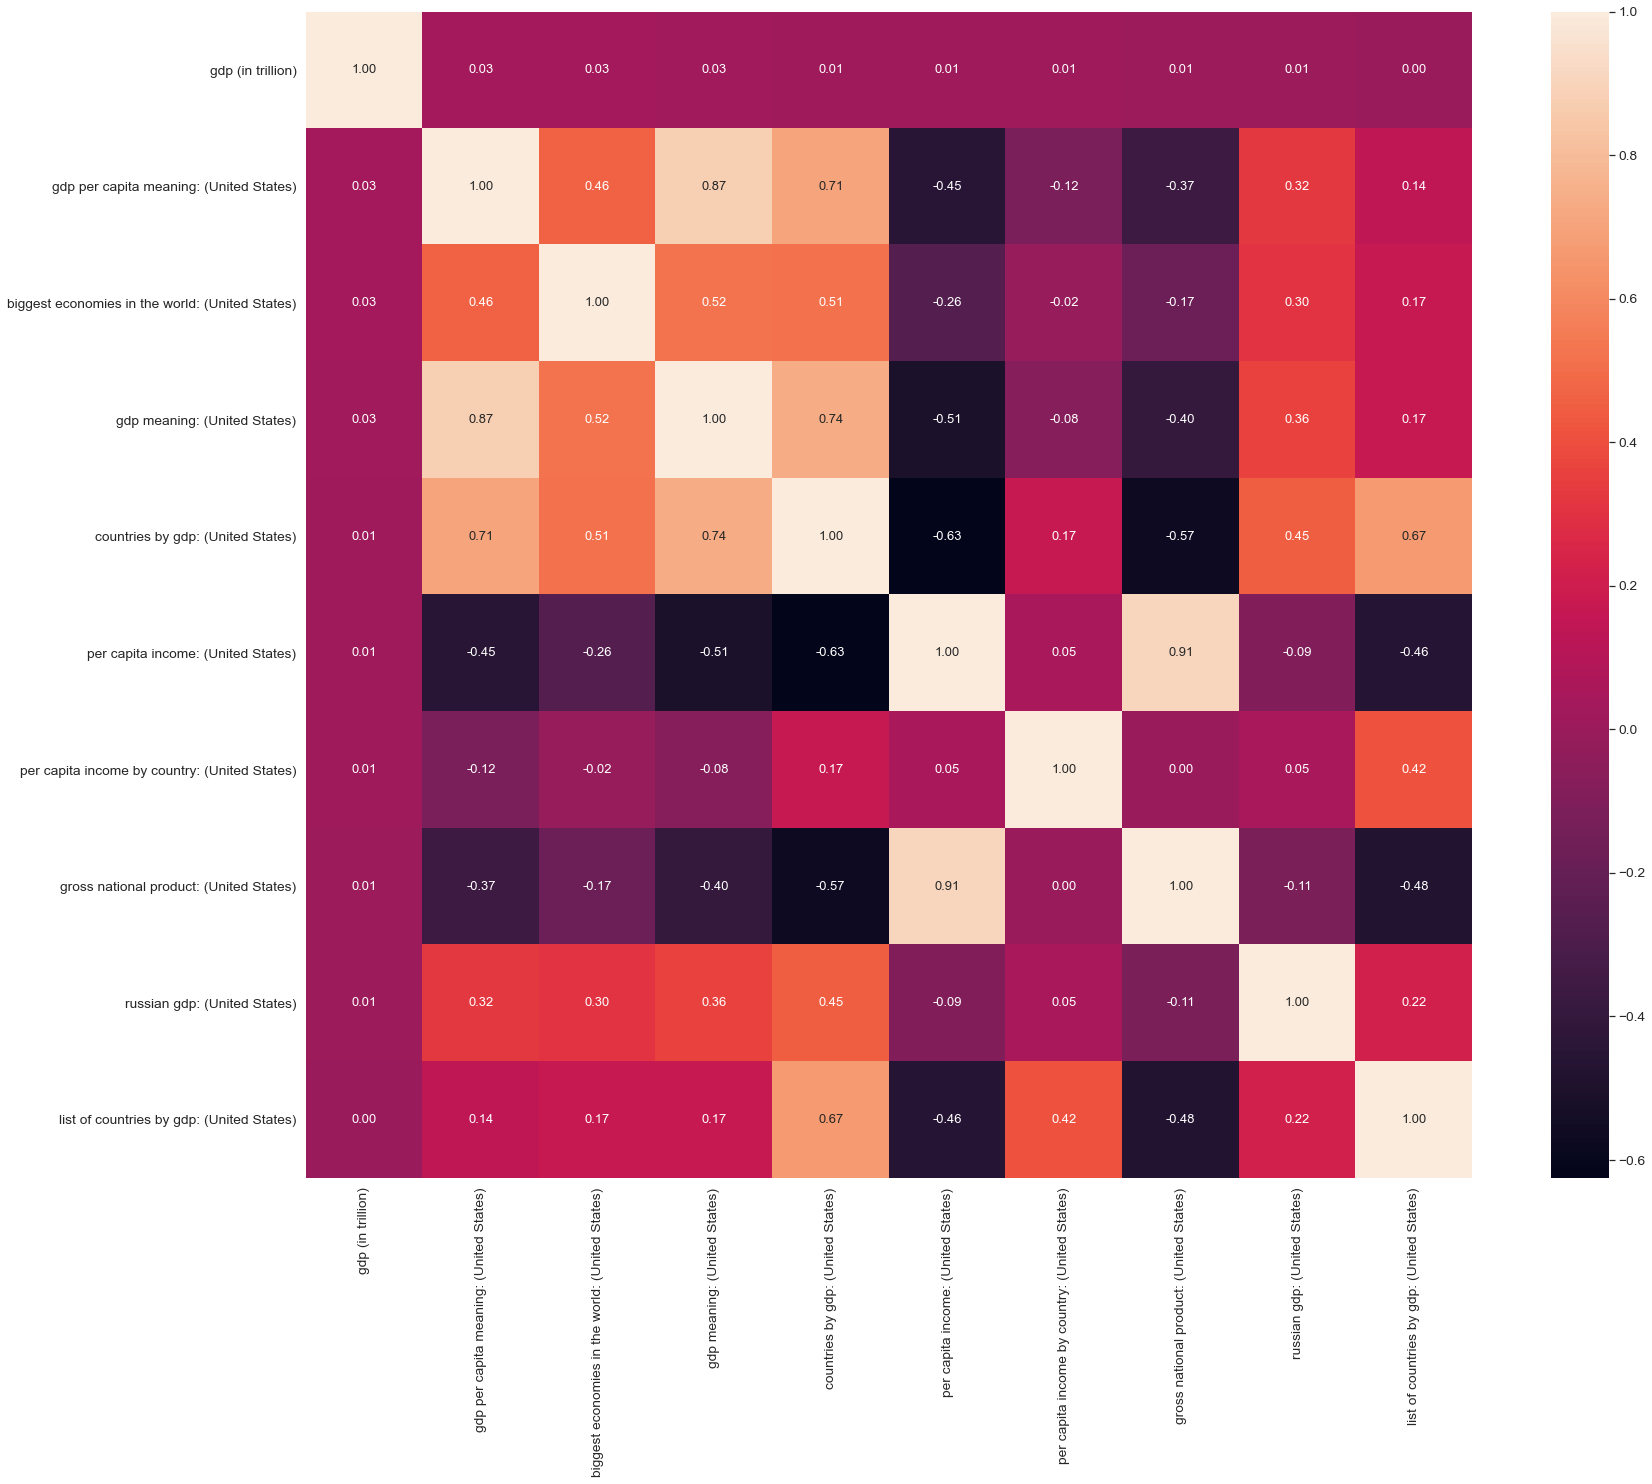

In [656]:
#gdp growth heatmap
corrmat1 = gt_gdp_data_top50_growth.corr()
k=10
cols = corrmat1.nlargest(k, 'gdp (in trillion)')['gdp (in trillion)'].index
cm = np.corrcoef(gt_gdp_data_top50_growth[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

In [405]:
sliding_window_pred(gt_gdp_data_top50_growth, 'gdp (in trillion)', 1, 1)

-0.7742099154842879

In [406]:
sliding_window_pred(gt_gdp_data_top50_growth, 'gdp (in trillion)', 12, 1)

0.04541399129758561

In [407]:
sliding_window_pred(gt_gdp_data_top50_growth, 'gdp (in trillion)', 48, 1)

-0.003948912633665369

In [ ]:
sliding_window_pred(gt_gdp_data_top50_growth, 'gdp (in trillion)', 48, 6)

In [417]:
sliding_window_pred(gt_gdp_data_top50_growth, 'gdp (in trillion)', 120, 1)

-0.08266082185457879

In [ ]:
sliding_window_pred(gt_gdp_data_top50, 'gdp (in trillion)', 12, 6)

In [701]:
#GDP growth models rf
rolling_win_lst = [1,12,48,120,144,180]
month_ahead_lst = [1,12]
gt_gdp_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_gdp_data_top50_growth, 'gdp (in trillion)', i, j, RandomForestRegressor(),50)
        print((i,j), rv)
        gt_gdp_top50_results[(i,j)] = rv


gt_gdp_top50_results

(1, 1) -0.7742099154842879
(1, 12) -1.186135545966204
(12, 1) 0.02027799044664269
(12, 12) -0.2242411563528126
(48, 1) -0.009846684977407039
(48, 12) -0.17061636731987861
(120, 1) -0.036196412825456825
(120, 12) -0.13978402867173667
(144, 1) -0.11376354908603914
(144, 12) -0.1740257329334669
(180, 1) -0.04010425197342138
(180, 12) -0.21932602992840367


{(1, 1): -0.7742099154842879,
 (1, 12): -1.186135545966204,
 (12, 1): 0.02027799044664269,
 (12, 12): -0.2242411563528126,
 (48, 1): -0.009846684977407039,
 (48, 12): -0.17061636731987861,
 (120, 1): -0.036196412825456825,
 (120, 12): -0.13978402867173667,
 (144, 1): -0.11376354908603914,
 (144, 12): -0.1740257329334669,
 (180, 1): -0.04010425197342138,
 (180, 12): -0.21932602992840367}

In [55]:
gt_gdp_data_top50_growth_precovid = pd.read_csv('gt_gdp_data_top50_growth_pre-covid.csv')

#gdp growth models precovid
rolling_win_lst = [1,12,48,96,120,144,168]
month_ahead_lst = [1,12]
gt_inflation_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_gdp_data_top50_growth_precovid, \
                                 'gdp growth', i, j, RandomForestRegressor(),50)
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv


gt_inflation_top50_results

(1, 1) -1.3660600737425872
(1, 12) -1.3977340999602181
(12, 1) -0.26242590511960606
(12, 12) -0.39395963701120706
(48, 1) -0.3370639858656488
(48, 12) -0.4644124740603872
(96, 1) -0.460897901887098
(96, 12) -1.0878483966902661
(120, 1) -0.5052247481132894
(120, 12) -0.4171115490573427
(144, 1) -0.3335680535080061
(144, 12) -0.5330236979283494
(168, 1) -0.3830474927934904
(168, 12) -0.6275930070353946


{(1, 1): -1.3660600737425872,
 (1, 12): -1.3977340999602181,
 (12, 1): -0.26242590511960606,
 (12, 12): -0.39395963701120706,
 (48, 1): -0.3370639858656488,
 (48, 12): -0.4644124740603872,
 (96, 1): -0.460897901887098,
 (96, 12): -1.0878483966902661,
 (120, 1): -0.5052247481132894,
 (120, 12): -0.4171115490573427,
 (144, 1): -0.3335680535080061,
 (144, 12): -0.5330236979283494,
 (168, 1): -0.3830474927934904,
 (168, 12): -0.6275930070353946}

In [62]:
#Benchmark:
#Just using last month's value for the prediction

rolling_window = 1
num_months_ahead = 1

test_index = num_months_ahead - 1
pred_lst1 = []
test_lst1 = []

for i in gt_gdp_data_top50_growth_precovid.rolling(rolling_window):
    test_index += num_months_ahead
    if len(i) == rolling_window and test_index < len(gt_gdp_data_top50_growth_precovid):
        pred_y = gt_gdp_data_top50_growth_precovid.iloc[test_index-1]['gdp growth']
        test_y = gt_gdp_data_top50_growth_precovid.iloc[test_index]['gdp growth']

#         test_X = np.reshape(test_X.values, (1,50))
#         test_y = np.reshape(test_y, (1,))

        pred_lst1.append(pred_y)
        test_lst1.append(test_y)

r2_score(test_lst1,pred_lst1)

-1.3660600737425872

In [633]:
#GDP growth models gb
rolling_win_lst = [1,12,48,120,144,180]
month_ahead_lst = [1,12]
gt_gdp_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_gdp_data_top50_growth, 'gdp (in trillion)', i, j, GradientBoostingRegressor(),50)
        print((i,j), rv)
        gt_gdp_top50_results[(i,j)] = rv


gt_gdp_top50_results

(1, 1) -0.7742099154842865
(1, 12) -1.1861355459662044
(12, 1) -0.23183084286967692
(12, 12) -0.46086282784853805
(48, 1) -0.1731002571797886
(48, 12) -0.3437818489713236
(120, 1) -0.04299835433951449
(120, 12) -0.28933675996408637
(144, 1) -0.1395453592546576
(144, 12) -0.44385531219097873
(180, 1) -0.13350590563018816
(180, 12) -0.4825093926284081


{(1, 1): -0.7742099154842865,
 (1, 12): -1.1861355459662044,
 (12, 1): -0.23183084286967692,
 (12, 12): -0.46086282784853805,
 (48, 1): -0.1731002571797886,
 (48, 12): -0.3437818489713236,
 (120, 1): -0.04299835433951449,
 (120, 12): -0.28933675996408637,
 (144, 1): -0.1395453592546576,
 (144, 12): -0.44385531219097873,
 (180, 1): -0.13350590563018816,
 (180, 12): -0.4825093926284081}

In [451]:
#GDP volatility data
gt_gdp_data_top50_volatility = pd.read_csv('gt_gdp_data_top50_volatility.csv')

In [456]:
#GDP volatility data models
rolling_win_lst = [1,3,12,24,48,72,120]
month_ahead_lst = [1,3,12]
gt_gdp_top50_volatility_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_gdp_data_top50_volatility, 'gdp (in trillion) volatility', i, j)
        print((i,j), rv)
        gt_gdp_top50_volatility_results[(i,j)] = rv


gt_gdp_top50_volatility_results

(1, 1) 0.09381872639309685
(1, 3) -0.620980463798094
(1, 12) -0.8285206532665399
(3, 1) 0.16351906338735345
(3, 3) -0.48546241690804903
(3, 12) -0.5734201275758966
(12, 1) 0.09435949083306472
(12, 3) -0.3098019778445842
(12, 12) -0.5153757137588202
(24, 1) -0.0850264784945074
(24, 3) -0.41076732247726566
(24, 12) -0.42213367532535484
(48, 1) -0.13854100366471345
(48, 3) -0.39457653036834306
(48, 12) -0.40213225711125267
(72, 1) -0.11332782715201173
(72, 3) -0.419343130210591
(72, 12) -0.4169296529732949
(120, 1) -0.04265253183436246
(120, 3) -0.24925245610988234
(120, 12) -0.22753547787533734


{(1, 1): 0.09381872639309685,
 (1, 3): -0.620980463798094,
 (1, 12): -0.8285206532665399,
 (3, 1): 0.16351906338735345,
 (3, 3): -0.48546241690804903,
 (3, 12): -0.5734201275758966,
 (12, 1): 0.09435949083306472,
 (12, 3): -0.3098019778445842,
 (12, 12): -0.5153757137588202,
 (24, 1): -0.0850264784945074,
 (24, 3): -0.41076732247726566,
 (24, 12): -0.42213367532535484,
 (48, 1): -0.13854100366471345,
 (48, 3): -0.39457653036834306,
 (48, 12): -0.40213225711125267,
 (72, 1): -0.11332782715201173,
 (72, 3): -0.419343130210591,
 (72, 12): -0.4169296529732949,
 (120, 1): -0.04265253183436246,
 (120, 3): -0.24925245610988234,
 (120, 12): -0.22753547787533734}

In [64]:
gt_gdp_data_top50_volatility_precovid = pd.read_csv('gt_gdp_data_top50_volatility_pre-covid.csv')

#gdp volatility models precovid
rolling_win_lst = [1,12,48,96,120,144,168]
month_ahead_lst = [1,12]
gt_inflation_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_gdp_data_top50_volatility_precovid, \
                                 'gdp (in trillion) volatility', i, j, RandomForestRegressor(),50)
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv


gt_inflation_top50_results

(1, 1) -1.3129502750984625
(1, 12) -1.0683560945085238
(12, 1) -0.2560805380156166
(12, 12) -0.25200485822959173
(48, 1) -0.20582371470550487
(48, 12) -0.34739510091771275
(96, 1) -0.2533202896874853
(96, 12) -1.0813394212907808
(120, 1) -0.4791334856537981
(120, 12) -0.6167120547815657
(144, 1) -0.3040189066882486
(144, 12) -0.2816174340574953
(168, 1) -0.40245819525460647
(168, 12) -0.9270079451462725


{(1, 1): -1.3129502750984625,
 (1, 12): -1.0683560945085238,
 (12, 1): -0.2560805380156166,
 (12, 12): -0.25200485822959173,
 (48, 1): -0.20582371470550487,
 (48, 12): -0.34739510091771275,
 (96, 1): -0.2533202896874853,
 (96, 12): -1.0813394212907808,
 (120, 1): -0.4791334856537981,
 (120, 12): -0.6167120547815657,
 (144, 1): -0.3040189066882486,
 (144, 12): -0.2816174340574953,
 (168, 1): -0.40245819525460647,
 (168, 12): -0.9270079451462725}

In [65]:
#GDP volatility models gb
rolling_win_lst = [1,12,48,120,144,180]
month_ahead_lst = [1,12]
gt_gdp_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_gdp_data_top50_volatility, 'gdp (in trillion) volatility', i, j, GradientBoostingRegressor(),50)
        print((i,j), rv)
        gt_gdp_top50_results[(i,j)] = rv


gt_gdp_top50_results

NameError: name 'gt_gdp_data_top50_volatility' is not defined

In [686]:
#stock data 
gt_stock_data_top50 = pd.read_csv('gt_stock_data_top50.csv')
# gt_stock_data_top50

# gt_stock_data_top50_growth = gt_stock_data_top50
# gt_stock_data_top50_growth['sp500 return in percentage'] = gt_stock_data_top50_growth['sp500 return in percentage'].pct_change()
# gt_stock_data_top50_growth = gt_stock_data_top50_growth.iloc[1:, :]
# gt_stock_data_top50 = pd.read_csv('gt_stock_data_top50.csv')
# gt_stock_data_top50_growth

Text(0, 0.5, 'gdp (in trillion)')

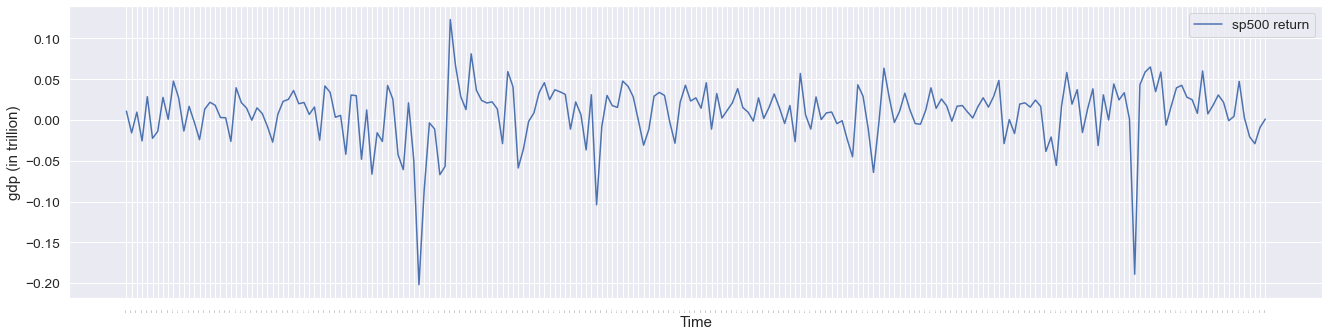

In [687]:
#stock graph

g4 = sns.lineplot(x=month, y=gt_stock_data_top50['sp500 return'], label = 'sp500 return')

plt.xticks(rotation = 'vertical', fontsize = 0)
plt.xlabel('Time')
plt.ylabel('gdp (in trillion)')

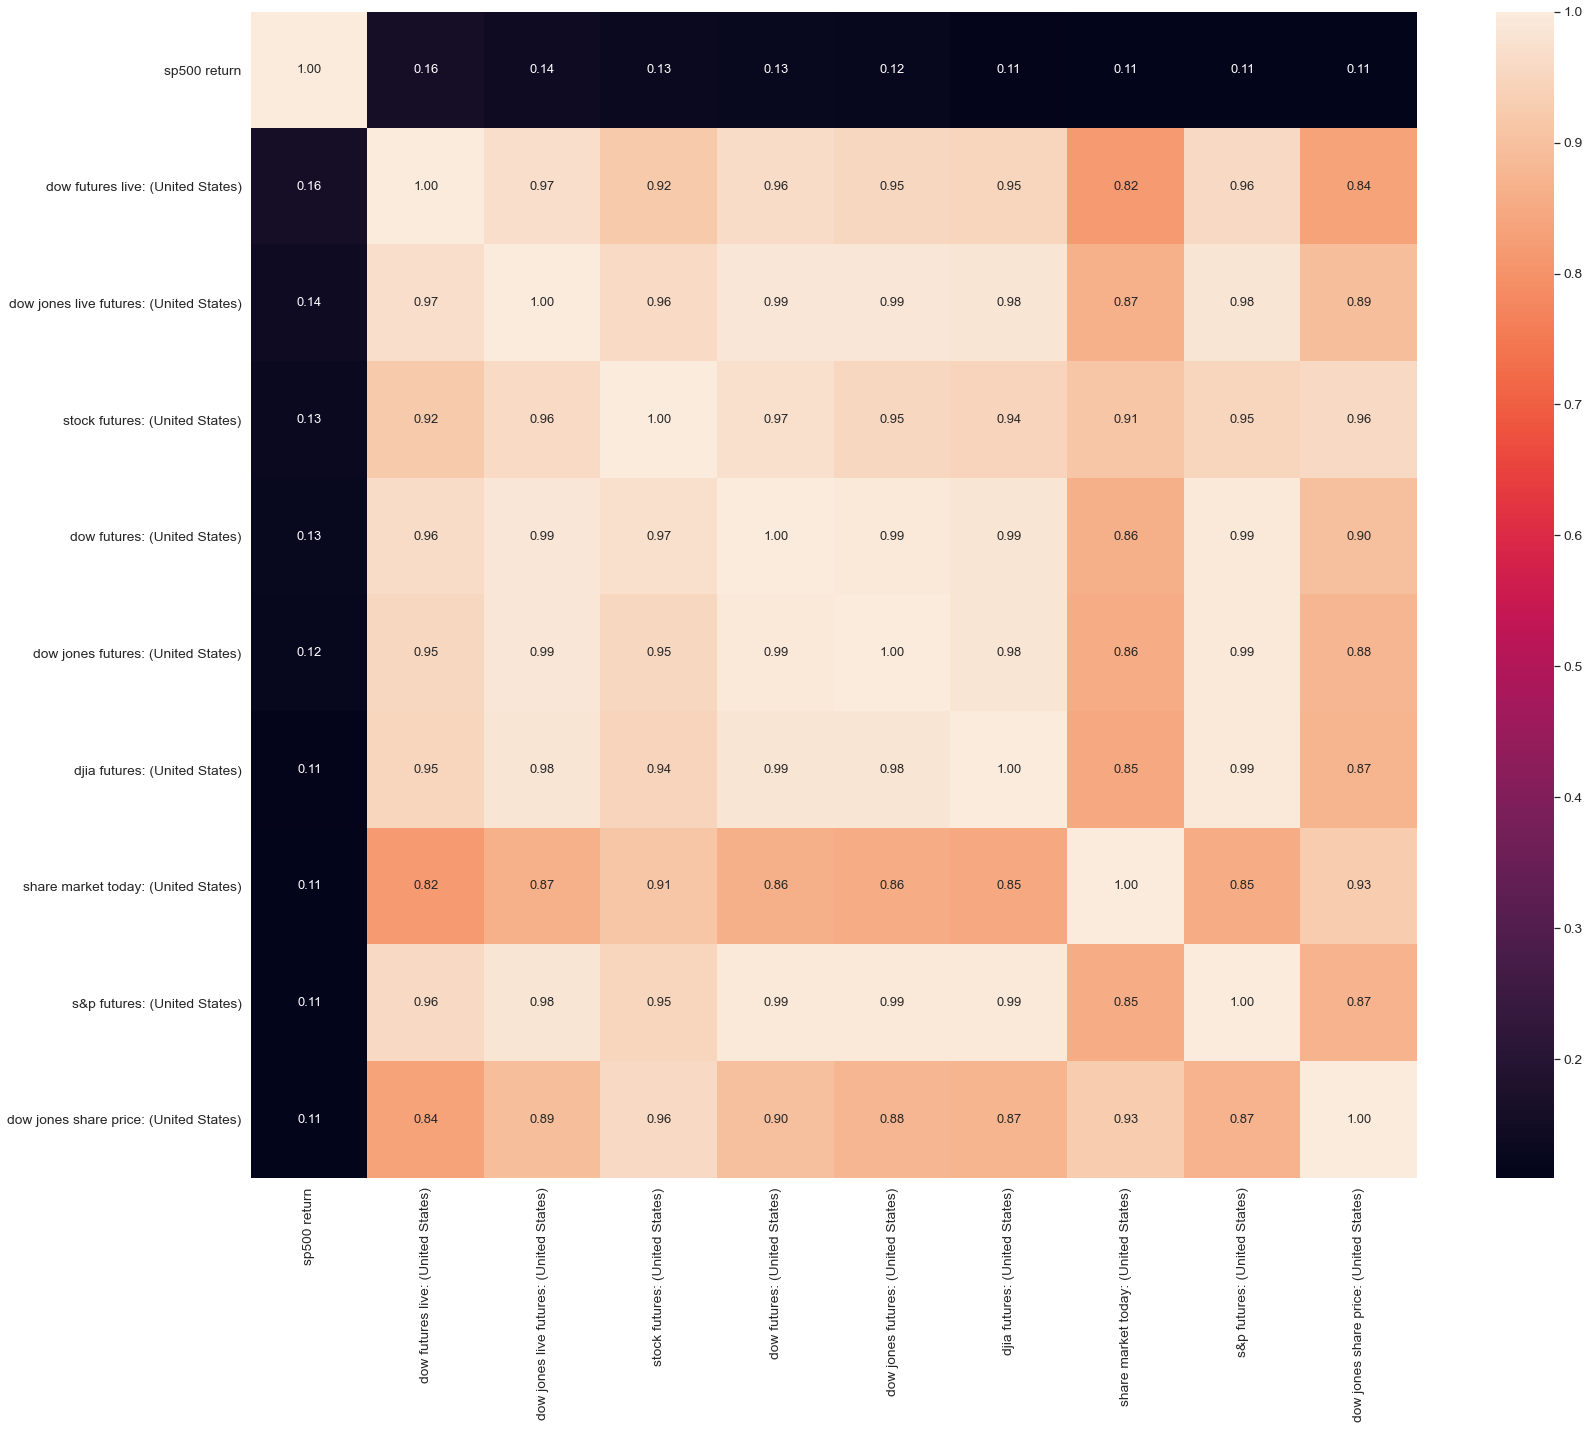

In [684]:
#stock heatmap
corrmat1 = gt_stock_data_top50.corr()
k=10
cols = corrmat1.nlargest(k, 'sp500 return')['sp500 return'].index
cm = np.corrcoef(gt_stock_data_top50[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

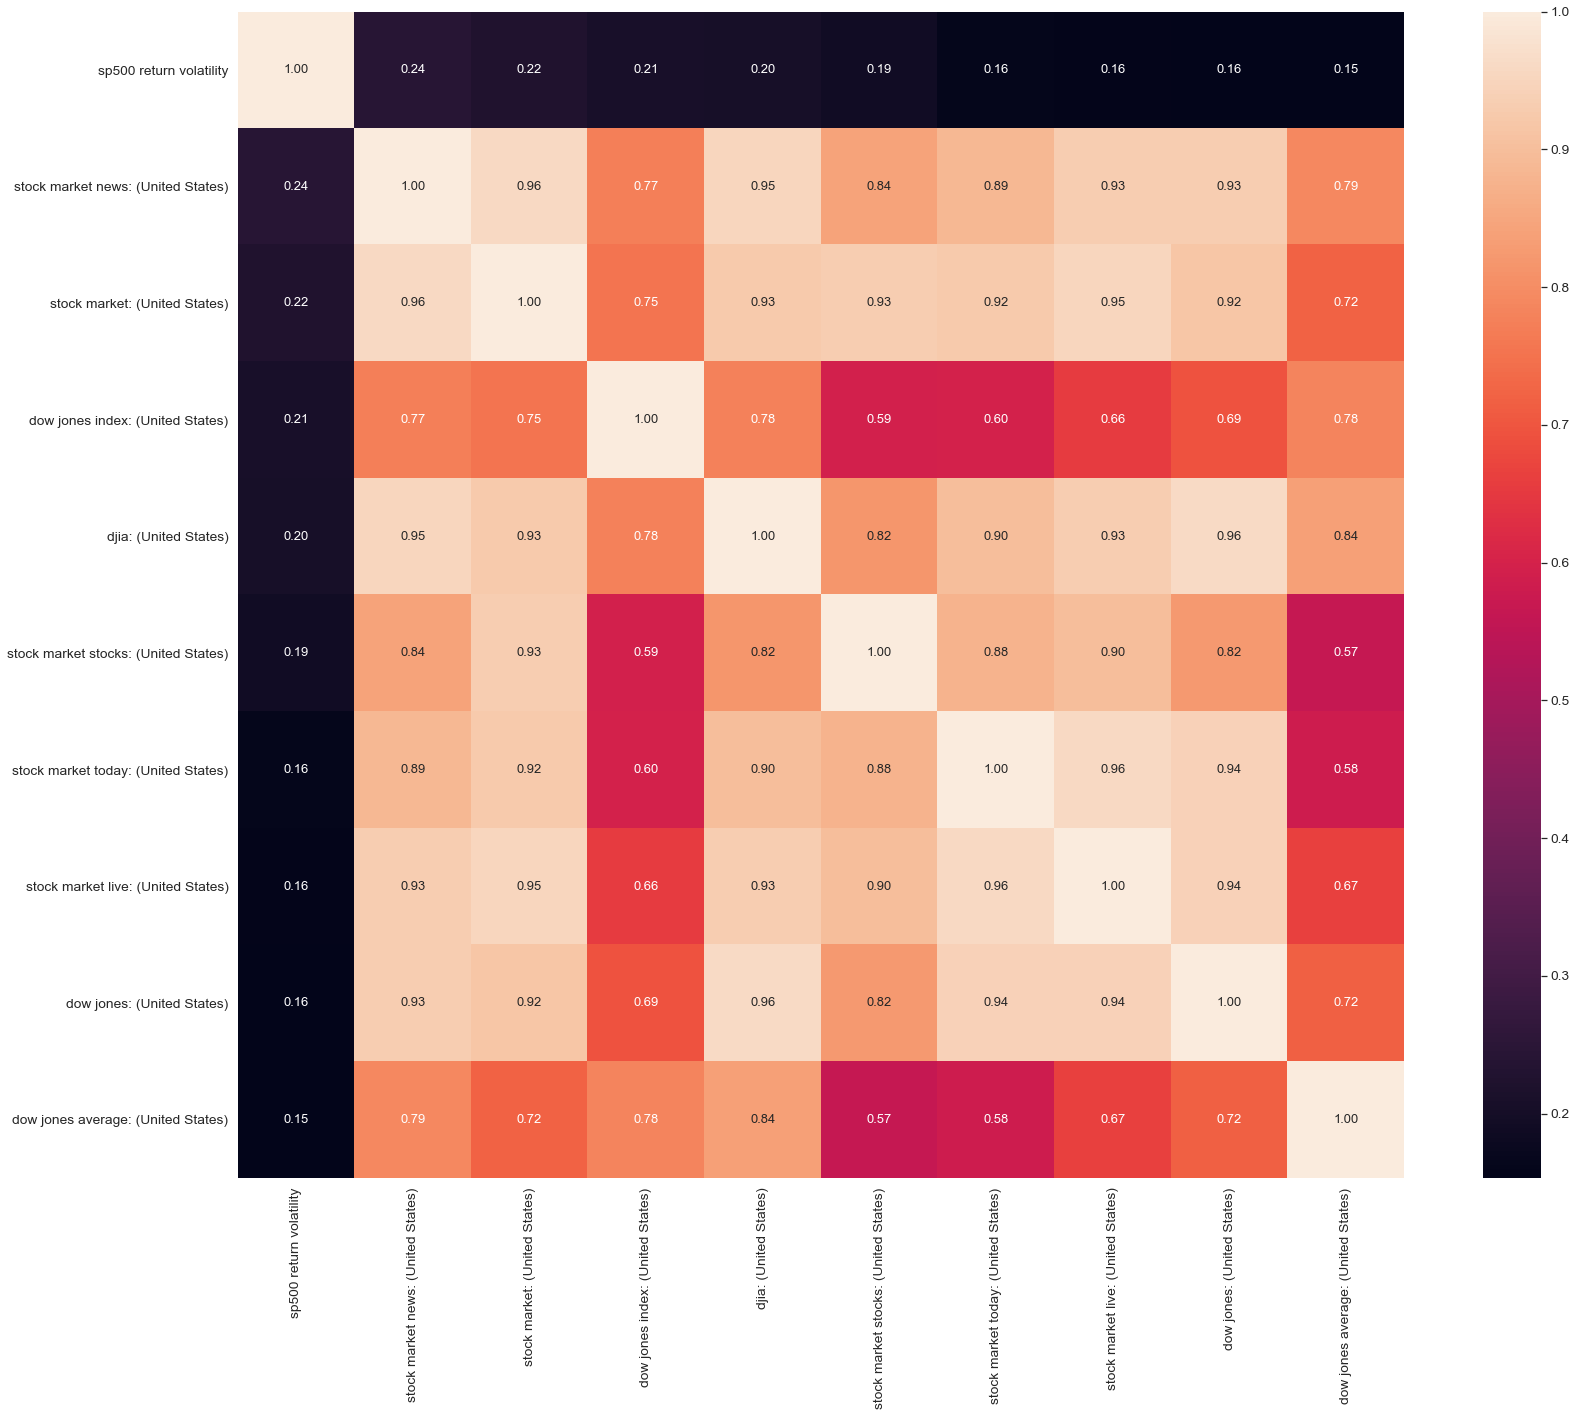

In [685]:
#stock volatility heatmap
corrmat1 = gt_stock_data_top50_volatility.corr()
k=10
cols = corrmat1.nlargest(k, 'sp500 return volatility')['sp500 return volatility'].index
cm = np.corrcoef(gt_stock_data_top50_volatility[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

In [439]:
sliding_window_pred(gt_stock_data_top50, 'sp500 return', 1, 1)

-0.5910036722504384

In [442]:
#stock models rf
rolling_win_lst = [1,3,12,24,48,72,120]
month_ahead_lst = [1,3,12]
gt_stock_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_stock_data_top50, 'sp500 return', i, j)
        print((i,j), rv)
        gt_stock_top50_results[(i,j)] = rv


gt_stock_top50_results

(1, 1) -0.5910036722504384
(1, 3) -0.9474343426548537
(1, 12) -0.9990917759990074
(3, 1) -0.5102302138656265
(3, 3) -0.48574346346919905
(3, 12) -0.7154536623646597
(12, 1) -0.33154766133140234
(12, 3) -0.5140592153355423
(12, 12) -0.3563369490365722
(24, 1) -0.4235595539301684
(24, 3) -0.46308539271038884
(24, 12) -0.41035610720322224
(48, 1) -0.4053402290525887
(48, 3) -0.5113747920383698
(48, 12) -0.5995053714867102
(72, 1) -0.6817434683597459
(72, 3) -0.8299601210249645
(72, 12) -0.6785506300006621
(120, 1) -0.8712039750926523
(120, 3) -0.8936860820027002
(120, 12) -0.6411680269927647


{(1, 1): -0.5910036722504384,
 (1, 3): -0.9474343426548537,
 (1, 12): -0.9990917759990074,
 (3, 1): -0.5102302138656265,
 (3, 3): -0.48574346346919905,
 (3, 12): -0.7154536623646597,
 (12, 1): -0.33154766133140234,
 (12, 3): -0.5140592153355423,
 (12, 12): -0.3563369490365722,
 (24, 1): -0.4235595539301684,
 (24, 3): -0.46308539271038884,
 (24, 12): -0.41035610720322224,
 (48, 1): -0.4053402290525887,
 (48, 3): -0.5113747920383698,
 (48, 12): -0.5995053714867102,
 (72, 1): -0.6817434683597459,
 (72, 3): -0.8299601210249645,
 (72, 12): -0.6785506300006621,
 (120, 1): -0.8712039750926523,
 (120, 3): -0.8936860820027002,
 (120, 12): -0.6411680269927647}

In [68]:
gt_stock_data_top50_precovid = pd.read_csv('gt_stock_data_top50_pre-covid.csv')

#gdp models precovid
rolling_win_lst = [1,12,48,96,120,144,168]
month_ahead_lst = [1,12]
gt_stock_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_stock_data_top50_precovid, \
                                 'sp500 return', i, j, RandomForestRegressor(),50)
        print((i,j), rv)
        gt_inflation_top50_results[(i,j)] = rv


gt_stock_top50_results

(1, 1) -0.5301207869377109
(1, 12) -1.0049224727567863
(12, 1) -0.19224153708101066
(12, 12) -0.23496136665325995
(48, 1) -0.25945751872927447
(48, 12) -0.3848112939891588
(96, 1) -0.4178791290302535
(96, 12) -0.7527787423323815
(120, 1) -0.521030785432071
(120, 12) -0.37564387585630277
(144, 1) -0.8274778329773811
(144, 12) -0.8927775559500535
(168, 1) -0.9979832795215722
(168, 12) -0.7606294837544549


{}

In [631]:
#stock models gb 
rolling_win_lst = [1,12,48,120,144,180]
month_ahead_lst = [1,12]
gt_stock_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_stock_data_top50, 'sp500 return', i, j, GradientBoostingRegressor(),50)
        print((i,j), rv)
        gt_stock_top50_results[(i,j)] = rv


gt_stock_top50_results

(1, 1) -0.5910036722504386
(1, 12) -0.9990917759990079
(12, 1) -0.7652178985782443
(12, 12) -0.7505591290019213
(48, 1) -0.8190511165226824
(48, 12) -1.2132063040403231
(120, 1) -1.1563352373577098
(120, 12) -1.3948996819427277
(144, 1) -1.2044936761924916
(144, 12) -0.5225659951573622
(180, 1) -1.6340638752628918
(180, 12) -0.7216282658676771


{(1, 1): -0.5910036722504386,
 (1, 12): -0.9990917759990079,
 (12, 1): -0.7652178985782443,
 (12, 12): -0.7505591290019213,
 (48, 1): -0.8190511165226824,
 (48, 12): -1.2132063040403231,
 (120, 1): -1.1563352373577098,
 (120, 12): -1.3948996819427277,
 (144, 1): -1.2044936761924916,
 (144, 12): -0.5225659951573622,
 (180, 1): -1.6340638752628918,
 (180, 12): -0.7216282658676771}

In [444]:
#stock volatility data
gt_stock_data_top50_volatility = pd.read_csv('gt_stock_data_top50_volatility.csv')
gt_stock_data_top50_volatility



Month  sp500 return volatility  stock: (United States)  \
0    200401                   0.0109                      16   
1    200402                   0.0157                      15   
2    200403                   0.0097                      12   
3    200404                   0.0256                      14   
4    200405                   0.0286                      11   
5    200406                   0.0224                      11   
6    200407                   0.0139                      12   
7    200408                   0.0278                      12   
8    200409                   0.0010                      12   
9    200410                   0.0477                      13   
10   200411                   0.0273                      14   
11   200412                   0.0135                      14   
12   200501                   0.0168                      15   
13   200502                   0.0026                      15   
14   200503                   0.0241                      14   
15   200504                   0.0134                      13   
16   200505                   0.0218                      13   
17   200506                   0.0181                      13   
18   200507                   0.0031                      13   
19   200508                   0.0028                      13   
20   200509                   0.0262                      13   
21   200510                   0.0396                      14   
22   200511                   0.0214                      16   
23   200512                   0.0147                      15   
24   200601                   0.0002                      18   
25   200602                   0.0149                      17   
26   200603                   0.0080                      16   
27   200604                   0.0079                      15   
28   200605                   0.0271                      14   
29   200606                   0.0072                      12   
30   200607                   0.0229                      12   
31   200608                   0.0253                      12   
32   200609                   0.0362                      12   
33   200610                   0.0200                      14   
34   200611                   0.0215                      13   
35   200612                   0.0069                      13   
36   200701                   0.0160                      15   
37   200702                   0.0247                      15   
38   200703                   0.0418                      14   
39   200704                   0.0339                      14   
40   200705                   0.0034                      13   
41   200706                   0.0057                      12   
42   200707                   0.0420                      14   
43   200708                   0.0307                      14   
44   200709                   0.0299                      12   
45   200710                   0.0481                      14   
46   200711                   0.0124                      15   
47   200712                   0.0664                      13   
48   200801                   0.0156                      16   
49   200802                   0.0263                      14   
50   200803                   0.0424                      15   
51   200804                   0.0256                      14   
52   200805                   0.0425                      13   
53   200806                   0.0608                      13   
54   200807                   0.0211                      14   
55   200808                   0.0485                      11   
56   200809                   0.2019                      20   
57   200810                   0.0861                      28   
58   200811                   0.0035                      20   
59   200812                   0.0110                      17   
60   200901                   0.0670                      16   
61   200902                   0.0569  

In [446]:
#stock volatility models rf

rolling_win_lst = [1,3,12,24,48,72,120]
month_ahead_lst = [1,3,12]
gt_stock_top50_volatility_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_stock_data_top50_volatility, 'sp500 return volatility', i, j)
        print((i,j), rv)
        gt_stock_top50_volatility_results[(i,j)] = rv


gt_stock_top50_volatility_results

(1, 1) -0.6648295529694523
(1, 3) -0.8571782093349534
(1, 12) -0.9947799153776002
(3, 1) -0.53190793935656
(3, 3) -0.28307907976043034
(3, 12) -0.5620741328966787
(12, 1) -0.36311318535972137
(12, 3) -0.3644785457292059
(12, 12) -0.2631438376148767
(24, 1) -0.45369588257820004
(24, 3) -0.36340397646811784
(24, 12) -0.26385624795804086
(48, 1) -0.4604959899553205
(48, 3) -0.40198856391999627
(48, 12) -0.4270538895199105
(72, 1) -0.6097156002191411
(72, 3) -0.669013132520345
(72, 12) -0.6305399483223793
(120, 1) -0.8322880959971588
(120, 3) -1.0502344653989617
(120, 12) -1.1025242661851808


{(1, 1): -0.6648295529694523,
 (1, 3): -0.8571782093349534,
 (1, 12): -0.9947799153776002,
 (3, 1): -0.53190793935656,
 (3, 3): -0.28307907976043034,
 (3, 12): -0.5620741328966787,
 (12, 1): -0.36311318535972137,
 (12, 3): -0.3644785457292059,
 (12, 12): -0.2631438376148767,
 (24, 1): -0.45369588257820004,
 (24, 3): -0.36340397646811784,
 (24, 12): -0.26385624795804086,
 (48, 1): -0.4604959899553205,
 (48, 3): -0.40198856391999627,
 (48, 12): -0.4270538895199105,
 (72, 1): -0.6097156002191411,
 (72, 3): -0.669013132520345,
 (72, 12): -0.6305399483223793,
 (120, 1): -0.8322880959971588,
 (120, 3): -1.0502344653989617,
 (120, 12): -1.1025242661851808}

In [69]:
gt_stock_data_top50_volatility_precovid = pd.read_csv('gt_stock_data_top50_volatility_pre-covid.csv')

#stock volatility models precovid
rolling_win_lst = [1,12,48,96,120,144,168]
month_ahead_lst = [1,12]
gt_stock_top50_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_stock_data_top50_volatility_precovid, \
                                 'sp500 return volatility', i, j, RandomForestRegressor(),50)
        print((i,j), rv)
        gt_stock_top50_results[(i,j)] = rv


gt_stock_top50_results

(1, 1) -0.5393553462150993
(1, 12) -0.9115555553436832
(12, 1) -0.1105381510869956
(12, 12) -0.21272582993343403
(48, 1) -0.19499558179036303
(48, 12) -0.2640423200032822
(96, 1) -0.5231773819707817
(96, 12) -1.7810000150498588
(120, 1) -1.4546167998904105
(120, 12) -2.5763600433771123
(144, 1) -1.8153539042970843
(144, 12) -3.3641679273192473
(168, 1) -2.145220537392095
(168, 12) -0.45817327337184466


{(1, 1): -0.5393553462150993,
 (1, 12): -0.9115555553436832,
 (12, 1): -0.1105381510869956,
 (12, 12): -0.21272582993343403,
 (48, 1): -0.19499558179036303,
 (48, 12): -0.2640423200032822,
 (96, 1): -0.5231773819707817,
 (96, 12): -1.7810000150498588,
 (120, 1): -1.4546167998904105,
 (120, 12): -2.5763600433771123,
 (144, 1): -1.8153539042970843,
 (144, 12): -3.3641679273192473,
 (168, 1): -2.145220537392095,
 (168, 12): -0.45817327337184466}

In [632]:
#stock volatility models gb

rolling_win_lst = [1,12,48,120,144,180]
month_ahead_lst = [1,12]
gt_stock_top50_volatility_results = {}

for i in rolling_win_lst: 
    for j in month_ahead_lst:
        rv = sliding_window_pred(gt_stock_data_top50_volatility, 'sp500 return volatility', i, j, GradientBoostingRegressor(),50)
        print((i,j), rv)
        gt_stock_top50_volatility_results[(i,j)] = rv


gt_stock_top50_volatility_results

(1, 1) -0.6648295529694532
(1, 12) -0.994779915377602
(12, 1) -0.9878852681530141
(12, 12) -0.7941052023644986
(48, 1) -0.9765362875949732
(48, 12) -0.9279457546084036
(120, 1) -1.5402046540949041
(120, 12) -1.5477797109045834
(144, 1) -1.601199395140391
(144, 12) -1.5100452888403684
(180, 1) -1.0907172016899267
(180, 12) -1.3077046230855118


{(1, 1): -0.6648295529694532,
 (1, 12): -0.994779915377602,
 (12, 1): -0.9878852681530141,
 (12, 12): -0.7941052023644986,
 (48, 1): -0.9765362875949732,
 (48, 12): -0.9279457546084036,
 (120, 1): -1.5402046540949041,
 (120, 12): -1.5477797109045834,
 (144, 1): -1.601199395140391,
 (144, 12): -1.5100452888403684,
 (180, 1): -1.0907172016899267,
 (180, 12): -1.3077046230855118}

In [49]:
#Split data based on time 
ts1_train = gt_jobs_data_top10.loc[0:152]
ts1_test = gt_jobs_data_top10.loc[153:]
ts1_test
ts1_X1_train = ts1_train.drop(['Month', 'Unemployment_rate'], axis=1)
ts1_y1_train = ts1_train['Unemployment_rate']
ts1_X1_test = ts1_test.drop(['Month', 'Unemployment_rate'], axis=1)
ts1_y1_test = ts1_test['Unemployment_rate']

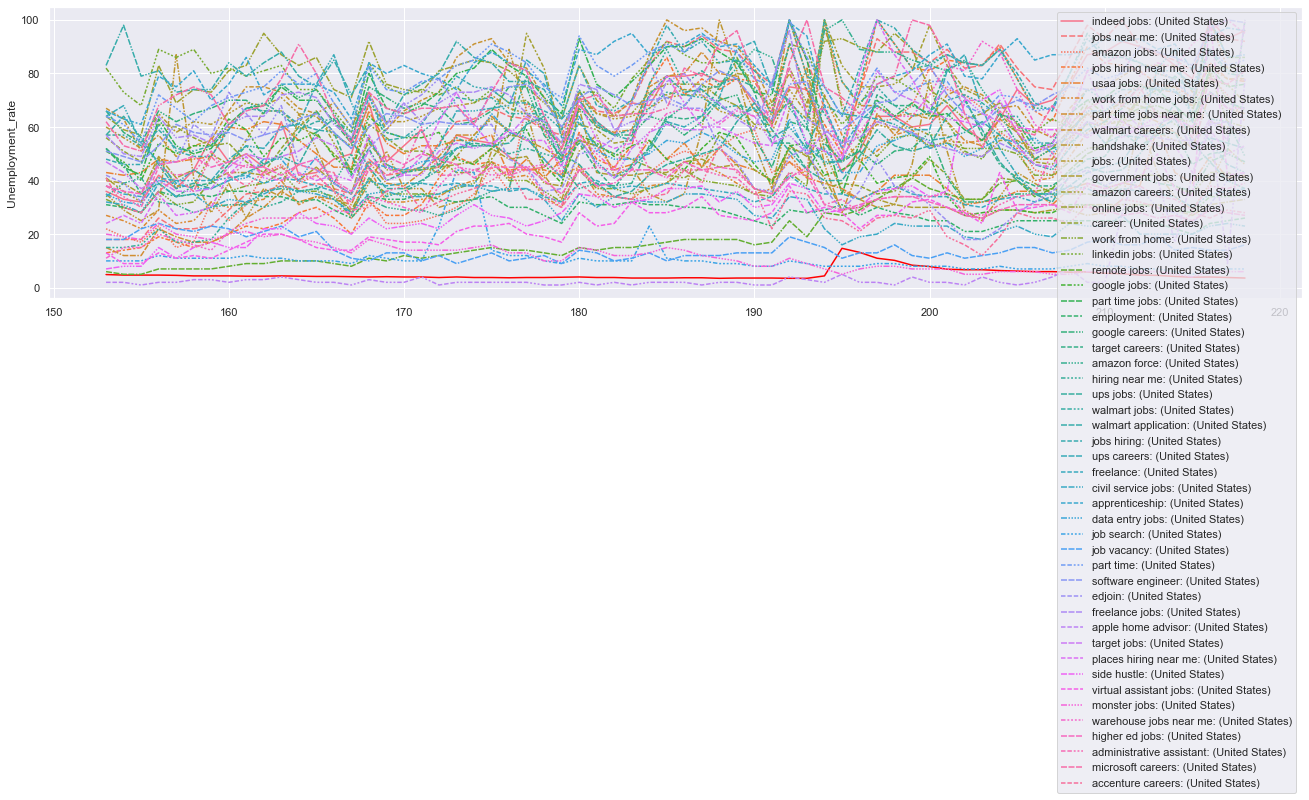

In [24]:
g3 = sns.lineplot(data=ts1_y1_test, color = 'red')
g4 = sns.lineplot(data=ts1_X1_test)

In [25]:
clf_rf2 = RandomForestRegressor()
clf_rf2.fit(ts1_X1_train, ts1_y1_train)
clf_rf2.score(ts1_X1_test, ts1_y1_test)

0.027060882011501253

In [26]:
clf_rf2.feature_importances_

array([7.30391836e-03, 1.74473855e-02, 7.45837295e-04, 1.82702416e-02,
       5.40850467e-04, 1.54611000e-03, 5.04289726e-03, 5.90382419e-04,
       2.86145637e-03, 4.21635114e-04, 1.60279403e-02, 1.01351477e-01,
       1.33023648e-01, 4.32465535e-03, 3.40425928e-03, 3.27751059e-02,
       5.01706564e-04, 1.33109809e-02, 6.06591308e-04, 3.51356438e-03,
       2.86889580e-02, 1.23677369e-03, 7.17510734e-04, 1.20881950e-02,
       7.60182078e-03, 1.38890440e-03, 5.13147327e-04, 5.89879899e-03,
       2.22864051e-03, 3.83529832e-03, 6.36507885e-04, 1.10600919e-03,
       3.50422619e-03, 9.19380156e-04, 4.29562424e-03, 2.49435346e-03,
       6.23860734e-03, 2.25493409e-03, 2.48350896e-03, 5.74682497e-03,
       1.37295942e-03, 1.44517401e-03, 2.62808286e-03, 1.34417833e-03,
       3.67962953e-03, 2.83926964e-03, 5.14762254e-01, 4.00646469e-03,
       1.66974603e-03, 8.76357369e-03])

In [27]:
ts1_y1_train

0      5.7
1      5.6
2      5.8
3      5.6
4      5.6
      ... 
148    4.8
149    4.9
150    4.8
151    4.9
152    5.0
Name: Unemployment_rate, Length: 153, dtype: float64

In [28]:
ts1_y1_test = ts1_y1_test.reset_index()

In [29]:
ts1_y1_train = ts1_y1_train.reset_index()

In [81]:
# ts1_train['Month']
type(month)

pandas.core.series.Series

In [93]:
month1 = ts1_test['Month']
month1

153    2016-10
154    2016-11
155    2016-12
156    2017-01
157    2017-02
        ...   
214    2021-11
215    2021-12
216    2022-01
217    2022-02
218    2022-03
Name: Month, Length: 66, dtype: object

In [113]:
# len(ts1_train['Month'])
# len(ts1_y1_test_yhat)
month = ts1_test['Month']
month.values
# month = month.reset_index()
# # type(month)
# # month.drop('index', 1)
# # month = month.reset_index()
# month = month.drop('index',1)
# month = month.squeeze()
# month

array(['2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
       '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03',
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
       '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
       '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
       '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03'],
      dtype=object)

In [105]:
ts1_train['Month']
type(ts1_y1_test_yhat)
type(month)
len(month)

66

In [499]:
ts1_y1_test_yhat_pd

predicted    month
0       5.017  2016-10
1       5.085  2016-11
2       5.326  2016-12
3       5.532  2017-01
4       4.927  2017-02
5       4.955  2017-03
6       4.942  2017-04
7       5.652  2017-05
8       5.692  2017-06
9       5.665  2017-07
10      5.572  2017-08
11      5.553  2017-09
12      5.695  2017-10
13      5.133  2017-11
14      5.303  2017-12
15      5.624  2018-01
16      5.313  2018-02
17      4.968  2018-03
18      5.007  2018-04
19      5.870  2018-05
20      5.908  2018-06
21      5.850  2018-07
22      5.955  2018-08
23      5.780  2018-09
24      5.127  2018-10
25      5.353  2018-11
26      5.207  2018-12
27      5.856  2019-01
28      4.888  2019-02
29      4.884  2019-03
30      5.205  2019-04
31      5.371  2019-05
32      5.521  2019-06
33      5.606  2019-07
34      5.520  2019-08
35      5.077  2019-09
36      5.113  2019-10
37      5.538  2019-11
38      5.383  2019-12
39      5.821  2020-01
40      4.952  2020-02
41      5.784  2020-03
42      5.769  2020-04
43      5.857  2020-05
44      5.898  2020-06
45      5.833  2020-07
46      5.820  2020-08
47      5.360  2020-09
48      5.380  2020-10
49      5.563  2020-11
50      5.422  2020-12
51      5.235  2021-01
52      5.261  2021-02
53      5.181  2021-03
54      5.155  2021-04
55      5.228  2021-05
56      5.240  2021-06
57      5.241  2021-07
58      5.233  2021-08
59      5.276  2021-09
60      5.367  2021-10
61      5.555  2021-11
62      5.318  2021-12
63      5.739  2022-01
64      5.242  2022-02
65      5.251  2022-03

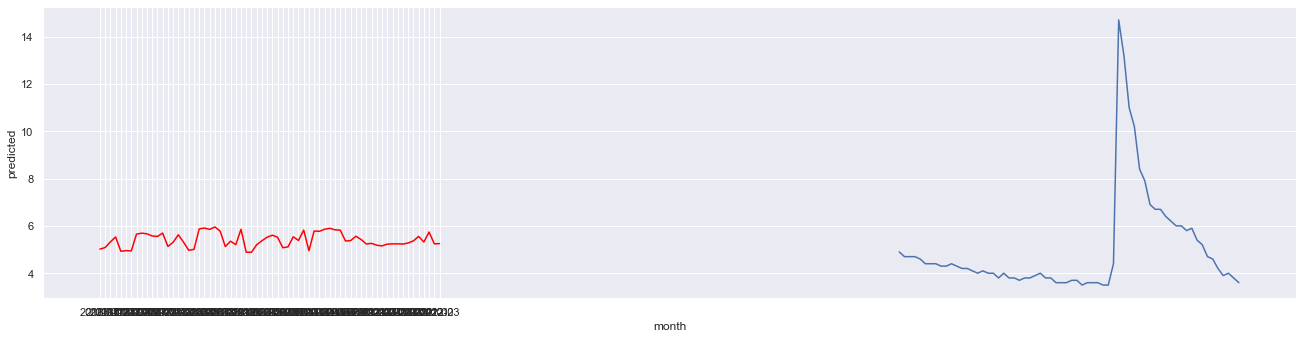

In [125]:
ts1_y1_test_yhat = clf_rf2.predict(ts1_X1_test)
ts1_y1_test_yhat_pd = pd.DataFrame(ts1_y1_test_yhat, columns = ['predicted'])
ts1_y1_test_yhat_pd['month'] = month.values
ts1_y1_test_yhat_pd
# ts1_y1_test = ts1_y1_test.drop('index', 1)
# ts1_y1_train = ts1_y1_train.drop('index', 1)
g3 = sns.lineplot(data=ts1_y1_test_yhat_pd, x="month", y="predicted", color = 'red')
g4 = sns.lineplot(data=ts1_y1_test)
# sns.set(rc = {'figure.figsize':(20,5)})

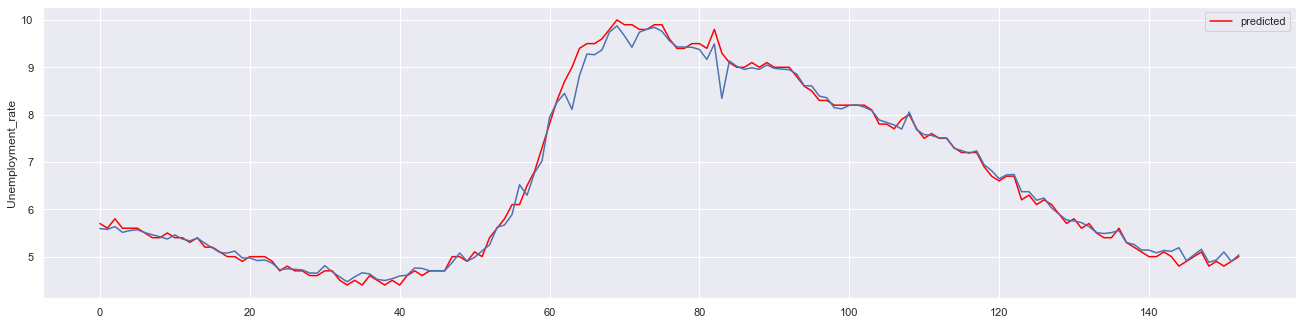

In [50]:
ts1_y1_train_yhat = clf_rf2.predict(ts1_X1_train)
g5 = sns.lineplot(data=ts1_y1_train, color = 'red', label = 'predicted')
g6 = sns.lineplot(data=ts1_y1_train_yhat)
sns.set(rc = {'figure.figsize':(20,5)})

In [31]:
#Split data based on time 2
ts1_train = gt_jobs_data_top10.loc[0:136]
ts1_test = gt_jobs_data_top10.loc[137:194]
ts1_test
ts1_X1_train = ts1_train.drop(['Month', 'Unemployment_rate'], axis=1)
ts1_y1_train = ts1_train['Unemployment_rate']
ts1_X1_test = ts1_test.drop(['Month', 'Unemployment_rate'], axis=1)
ts1_y1_test = ts1_test['Unemployment_rate']

In [32]:
clf_rf3 = RandomForestRegressor()
clf_rf3.fit(ts1_X1_train, ts1_y1_train)
clf_rf3.score(ts1_X1_test, ts1_y1_test)

-13.708682519119579

In [33]:
clf_rf3.score(ts1_X1_train, ts1_y1_train)

0.9936152768666229

In [34]:
ts1_X1_test

indeed jobs: (United States)  jobs near me: (United States)  \
137                          42.0                            7.0   
138                          38.0                            7.0   
139                          57.0                            8.0   
140                          37.0                            8.0   
141                          35.0                            7.0   
142                          33.0                            7.0   
143                          31.0                            7.0   
144                          37.0                           13.0   
145                          35.0                           12.0   
146                          38.0                           12.0   
147                          34.0                           14.0   
148                          39.0                           17.0   
149                          42.0                           19.0   
150                          43.0                           18.0   
151                          41.0                           19.0   
152                          39.0                           19.0   
153                          36.0                           18.0   
154                          33.0                           18.0   
155                          32.0                           18.0   
156                          42.0                           26.0   
157                          37.0                           22.0   
158                          44.0                           22.0   
159                          56.0                           23.0   
160                          47.0                           29.0   
161                          50.0                           35.0   
162                          45.0                           36.0   
163                          62.0                           38.0   
164                          42.0                           37.0   
165                          43.0                           39.0   
166                          48.0                           37.0   
167                          50.0                           35.0   
168                          69.0                           48.0   
169                          47.0                           42.0   
170                          53.0                           43.0   
171                          59.0                           45.0   
172                          45.0                           54.0   
173                          57.0                           62.0   
174                          55.0                           63.0   
175                          54.0                           67.0   
176                          49.0                           64.0   
177                          44.0                           63.0   
178                          45.0                           59.0   
179                          52.0                           57.0   
180                          68.0                           73.0   
181                          62.0                           66.0   
182                          57.0                           65.0   
183                          69.0                           69.0   
184                          68.0                           83.0   
185                          79.0                           92.0   
186                          79.0                           90.0   
187                          80.0                           94.0   
188                          77.0                           89.0   
189                          78.0                           88.0   
190                          69.0                           81.0   
191                          61.0                           76.0   
192                          75.0                          100.0   
193                          74.0                           85.0   
194                          58.0                           6

In [35]:
ts1_y1_test_yhat = clf_rf3.predict(ts1_X1_test)
ts1_y1_test_yhat

array([5.936, 6.03 , 5.907, 6.059, 5.804, 5.812, 6.217, 6.26 , 6.053,
       5.718, 6.127, 6.247, 6.297, 6.278, 6.115, 5.931, 6.031, 5.995,
       6.229, 6.291, 6.13 , 6.212, 6.225, 6.219, 6.359, 6.374, 6.274,
       6.413, 6.331, 6.395, 6.59 , 6.414, 6.242, 6.391, 6.334, 6.5  ,
       6.41 , 6.485, 6.473, 6.399, 6.336, 6.404, 6.476, 6.531, 6.413,
       6.103, 6.34 , 6.318, 6.307, 6.402, 6.32 , 6.276, 6.245, 6.429,
       6.493, 6.484, 6.314, 6.724])

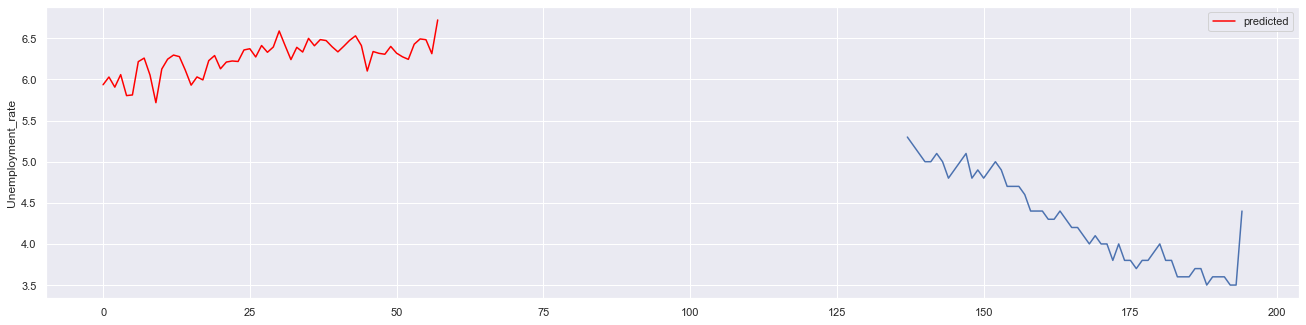

In [36]:
# ts1_y1_test = ts1_y1_test.drop('index', 1)
# ts1_y1_test = ts1_y1_test.reset_index()
# ts1_y1_test_yhat = ts1_y1_test_yhat.reset_index()
g3 = sns.lineplot(data=ts1_y1_test_yhat, color = 'red', label = 'predicted')
g4 = sns.lineplot(data=ts1_y1_test)
sns.set(rc = {'figure.figsize':(20,5)})

In [37]:
ts1_y1_test_yhat = clf_rf2.predict(ts1_X1_test)
ts1_y1_test_yhat

array([5.295, 5.259, 5.14 , 5.138, 5.081, 5.131, 5.112, 5.19 , 4.913,
       5.037, 5.157, 4.88 , 4.93 , 5.098, 4.899, 5.037, 5.017, 5.085,
       5.326, 5.532, 4.927, 4.955, 4.942, 5.652, 5.692, 5.665, 5.572,
       5.553, 5.695, 5.133, 5.303, 5.624, 5.313, 4.968, 5.007, 5.87 ,
       5.908, 5.85 , 5.955, 5.78 , 5.127, 5.353, 5.207, 5.856, 4.888,
       4.884, 5.205, 5.371, 5.521, 5.606, 5.52 , 5.077, 5.113, 5.538,
       5.383, 5.821, 4.952, 5.784])

In [38]:
#Regularization, ridge regression, use grid search to find optimal hyperparameters
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {
    'alpha':(0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5, 1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,35,40,
            45,50,55,70,100)
}
ridge_regressor = GridSearchCV(ridge,parameters,cv=5)
ridge_regressor.fit(ts1_X1_train, ts1_y1_train)

print(ridge_regressor.best_params_)
best_ridge_model = ridge_regressor.best_estimator_

{'alpha': 8}


In [39]:
ridge_regressor.score(ts1_X1_test, ts1_y1_test)

-9.247266636018368

In [40]:
ridge_regressor.score(ts1_X1_train, ts1_y1_train)

0.9771293384341085

In [41]:
ridge_regressor.predict(ts1_X1_test)

array([5.71120231, 5.81901851, 5.44392784, 4.75534177, 4.97731919,
       4.98043284, 5.28115289, 5.57596276, 4.90438186, 5.21267105,
       5.61023681, 5.03428616, 4.6901488 , 4.72520069, 5.39674669,
       4.71616001, 3.83568529, 3.77167247, 4.41623461, 4.25949608,
       5.96344275, 4.63061349, 2.56300624, 2.9486993 , 2.40132825,
       2.48467799, 1.63842207, 2.36658233, 2.89975605, 2.80656395,
       3.68054668, 4.17392689, 4.07483234, 3.73569489, 4.05608977,
       3.93923553, 3.67534033, 3.46815618, 4.24574394, 4.58979854,
       0.56503638, 1.10790267, 3.77155228, 5.20431743, 3.76249616,
       3.76762526, 4.67525781, 5.06581072, 5.87955895, 5.37846853,
       7.54606594, 7.01187116, 7.06867296, 5.70524601, 5.5100943 ,
       8.79390227, 7.91921163, 0.20564793])

In [42]:
#Regularization, ridge regression, use grid search to find optimal hyperparameters
from sklearn.model_selection import GridSearchCV

elasticnet = ElasticNet()
parameters = {
    'alpha':(0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5, 1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,35,40,
            45,50,55,70,100)
}
elasticnet_regressor = GridSearchCV(elasticnet,parameters,cv=5)
elasticnet_regressor.fit(ts1_X1_train, ts1_y1_train)

print(elasticnet_regressor.best_params_)
best_elasticnet_model = elasticnet_regressor.best_estimator_

{'alpha': 0.3}


In [43]:
elasticnet_regressor.score(ts1_X1_test, ts1_y1_test)

-6.166570829762374

In [ ]:
#Below is unused or duplicated code 

In [ ]:
#Sliding window prediction with 2 prior months
test_index = 0
pred_lst2 = []
test_lst2 = []
# gt_jobs_data_top10 = gt_jobs_data_top10.drop()
for i in gt_jobs_data_top10.rolling(1):
    test_index += 1
    if len(i) == 1 and test_index < len(gt_jobs_data_top10):
        X = i.loc[:, ~gt_jobs_data_top10.columns.isin(['Unemployment_rate', 'Month'])]
        y = i['Unemployment_rate']
#         print(X)
#         print(test_index)
        test_X = gt_jobs_data_top10.iloc[test_index][~gt_jobs_data_top10.columns.isin(['Unemployment_rate', 'Month'])]
        test_y = gt_jobs_data_top10.iloc[test_index]['Unemployment_rate']
#         print(test_X.values.reshape(1, -1).size)
#         print(test_X)
        test_X = np.reshape(test_X.values, (1,50))
        test_y = np.reshape(test_y, (1,))
        rf = RandomForestRegressor()
        rf.fit(X, y)
#         score = rf.score(X, y)
#         score = rf.score(test_X, test_y)
#         print(score)
        pred_y = rf.predict(test_X)
        pred_lst2.append(pred_y)
        test_lst2.append(test_y)

In [106]:
#test model function

rolling_win_lst = [1,12,48,96,120,144,168,180,192]
month_ahead_lst = [1]

def test_model(file, rolling_win_lst, month_ahead_lst, regressor, num_features):
    results = {}

    for i in rolling_win_lst: 
        for j in month_ahead_lst:
            rv = sliding_window_pred(file, file.columns.values[1], i, j, regressor, num_features)
            print((i,j), rv)
            results[(i,j)] = rv
            
    return results


test_model(gt_inflation_data_top50_diff, rolling_win_lst, month_ahead_lst, RandomForestRegressor(), 50)

(1, 1) 0.17370739740125718
(12, 1) 0.07359555815405427
(48, 1) 0.11041553611892851
(96, 1) 0.28304338403141893
(120, 1) 0.29468137703290553
(144, 1) 0.2845188949952753
(168, 1) 0.2207641888820474
(180, 1) 0.189387191625643
(192, 1) 0.21758015096088534


{(1, 1): 0.17370739740125718,
 (12, 1): 0.07359555815405427,
 (48, 1): 0.11041553611892851,
 (96, 1): 0.28304338403141893,
 (120, 1): 0.29468137703290553,
 (144, 1): 0.2845188949952753,
 (168, 1): 0.2207641888820474,
 (180, 1): 0.189387191625643,
 (192, 1): 0.21758015096088534}

In [103]:
def 



'cpi_rate'

In [ ]:
economic_indicators = ['Group A','Group B','Group C','Group D']
diff = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")